# Data Exploratory of Vibration Values

Vibration Signal Analysis approach is used to extract 9 statistical features for each axis of vibration values. Feature selection would then be performed by Genetic Algorithm.

In [226]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [9]:
header_list = ['time','x','y','z']

In [804]:
mHealthy = pd.read_csv('data/m1_vib1.csv',header = None, names = header_list )

In [805]:
mHealthy

,times,x,y,z
0,15839399805840,-15.926000,-10.669635,7.139241
1,15839399805860,16.475172,2.432049,9.335931
2,15839399805875,-10.355822,-4.079566,12.552512
3,15839399805890,8.629852,11.532620,14.984561
4,15839399805906,-3.687300,-15.376827,16.161359
...,...,...,...,...
99995,15839401012566,9.022118,-6.903882,17.573517
99996,15839401012577,-11.924886,4.314926,6.903882
99997,15839401012588,13.572404,0.706079,6.276256
99998,15839401012599,17.102798,0.156906,13.258591


In [798]:
mHealthy['ds'] = mHealthy['times'].apply(lambda x: float((x- 15840094829302)/1000))

In [802]:
mBroken = pd.read_csv('data/m2_vib3.csv',header = None, names = header_list )

In [803]:
mBroken

,times,x,y,z
0,15840094829302,20.044793,-20.084019,20.044793
1,15840094829321,20.044793,20.044793,19.927113
2,15840094829337,-20.084019,12.552512,20.044793
3,15840094829352,-20.084019,-13.415497,0.392266
4,15840094829367,-8.472946,-20.084019,9.414384
...,...,...,...,...
99995,15840095996852,20.044793,20.044793,11.375714
99996,15840095996863,-18.907221,20.044793,9.257478
99997,15840095996875,-1.412158,-2.353596,13.101684
99998,15840095996886,12.003340,-20.084019,6.197803


In [ ]:
mBroken['ds'] = mBroken['times'].apply(lambda x: float((x- 15840094829302)/1000))

In [577]:
Main = pd.DataFrame(columns=['SDx','SDy','SDz','RMSx','RMSy','RMSz','Mx','My','Mz','CRx','CRy','CRz','Kx','Ky','Kz','SKx','SKy','SKz','CFx','CFy','CFz','IFx','IFy','IFz','SFx','SFy','SFz','label'])

In [578]:
MainT = pd.DataFrame(columns=['SDx','SDy','SDz','RMSx','RMSy','RMSz','Mx','My','Mz','CRx','CRy','CRz','Kx','Ky','Kz','SKx','SKy','SKz','CFx','CFy','CFz','IFx','IFy','IFz','SFx','SFy','SFz','label'])

In [25]:
Main

,SDx,SDy,SDz,RMSx,RMSy,RMSz,PVx,PVy,PVz,CRx,...,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label


In [250]:
num = random.randint(0,99899)
df = mBroken[num:num+100]
df['x'].max()

20.0447926

In [251]:
RMScalc(df,'x')

4.761139947064586

In [252]:
#Restart MainT
MainT = pd.Data

4.305663494207663

In [101]:
def RMScalc(df,c):
    return np.sqrt(df[c].pow(2).sum()/1000)
def Clearance(df,c):
    root = (df[c].abs().pow(0.5).sum()/1000)**2
    return root

In [791]:
for i in range(0,100):
    num = random.randint(0,99899)
    df = mBroken[num:num+100]
    SDx = df.std()['x']
    SDy = df.std()['y']
    SDz = df.std()['z']
    RMSx = RMScalc(df,'x')
    RMSy = RMScalc(df,'y')
    RMSz = RMScalc(df,'z')
    Mx = df['x'].mean()
    My = df['y'].mean()
    Mz = df['z'].mean()
    CRx = float(df['x'].max()/RMSx)
    CRy = float(df['y'].max()/RMSy)
    CRz = float(df['z'].max()/RMSz)
    Kx = df['x'].kurt()
    Ky = df['y'].kurt()
    Kz = df['z'].kurt()
    SKx = df['x'].skew()
    SKy = df['y'].skew()
    SKz = df['z'].skew()
    CFx = float(df['x'].max()/Clearance(df,'x'))
    CFy = float(df['y'].max()/Clearance(df,'y'))
    CFz = float(df['z'].max()/Clearance(df,'z'))
    IFx = float(df['x'].max()/Mx)
    IFy = float(df['y'].max()/My)
    IFz = float(df['z'].max()/Mz)
    SFx = float(RMSx/Mx)
    SFy = float(RMSy/My)
    SFz = float(RMSz/Mz)
    label = 0
    list = [SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,CRy,CRz,Kx,Ky,Kz,SKx,SKy,SKz,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label]
    MainT.loc[i] = list

for i in range(101,200):
    num = random.randint(0,99899)
    df = mHealthy[num:num+100]
    SDx = df.std()['x']
    SDy = df.std()['y']
    SDz = df.std()['z']
    RMSx = RMScalc(df,'x')
    RMSy = RMScalc(df,'y')
    RMSz = RMScalc(df,'z')
    Mx = df['x'].mean()
    My = df['y'].mean()
    Mz = df['z'].mean()
    CRx = float(df['x'].max()/RMSx)
    CRy = float(df['y'].max()/RMSy)
    CRz = float(df['z'].max()/RMSz)
    Kx = df['x'].kurt()
    Ky = df['y'].kurt()
    Kz = df['z'].kurt()
    SKx = df['x'].skew()
    SKy = df['y'].skew()
    SKz = df['z'].skew()
    CFx = float(df['x'].max()/Clearance(df,'x'))
    CFy = float(df['y'].max()/Clearance(df,'y'))
    CFz = float(df['z'].max()/Clearance(df,'z'))
    IFx = float(df['x'].max()/Mx)
    IFy = float(df['y'].max()/My)
    IFz = float(df['z'].max()/Mz)
    SFx = float(RMSx/Mx)
    SFy = float(RMSy/My)
    SFz = float(RMSz/Mz)
    label = 1
    list = [SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,CRy,CRz,Kx,Ky,Kz,SKx,SKy,SKz,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label]
    MainT.loc[i] = list

In [609]:
MainT[['CRy','CRz','Kx','Ky','Kz','SKx','SKy','SKz']].describe()

,CRy,CRz,Kx,Ky,Kz,SKx,SKy,SKz
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,11.627684,15.629083,-1.089619,-1.353356,-0.383231,0.058443,-0.107206,-0.203753
std,1.039761,1.822054,1.134712,1.336295,1.303563,0.692666,0.720966,0.660505
min,8.912397,11.107578,-2.354409,-2.571429,-2.175754,-1.653949,-2.394653,-2.504760
25%,10.862772,14.554483,-1.760232,-2.160709,-1.263063,-0.426605,-0.509904,-0.679488
50%,11.517203,15.437771,-1.370299,-1.806522,-0.703119,0.083085,-0.102418,-0.174325
75%,12.223321,16.745421,-0.788736,-1.145513,0.219796,0.510684,0.256460,0.194651
max,14.500168,21.202097,4.883545,6.263233,6.666872,2.249326,1.810107,1.329769


In [610]:
Main[['CRy','CRz','Kx','Ky','Kz','SKx','SKy','SKz']].describe()

,CRy,CRz,Kx,Ky,Kz,SKx,SKy,SKz
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,11.655207,15.671810,-1.250946,-1.308897,-0.507884,-0.117742,-0.001929,-0.250739
std,1.056650,2.008730,1.088673,1.535361,1.080965,0.584705,0.749438,0.557179
min,9.094894,11.678394,-2.431016,-2.489426,-2.086960,-1.978990,-2.569986,-1.641629
25%,10.901750,14.268026,-1.908569,-2.170194,-1.253193,-0.422269,-0.475381,-0.656357
50%,11.541260,15.300457,-1.506584,-1.814525,-0.691884,-0.138001,0.001344,-0.273826
75%,12.189978,16.635020,-1.049378,-1.140977,-0.039384,0.272395,0.408792,0.130992
max,14.696808,22.018888,4.188169,6.715543,4.179312,1.281312,2.108924,0.943312


In [792]:
MainT.describe()

,SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,...,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,15.700752,17.221020,6.764382,4.964631,5.447857,4.052852,0.224697,0.122968,10.870787,4.044297,...,155.435651,132.944535,195.657474,49.613075,93.333153,1.850012,13.110993,25.402978,0.373530,0.497487
std,0.653713,0.618155,0.802038,0.202726,0.187820,0.153272,1.541616,1.780171,0.620325,0.167068,...,11.417084,8.863749,11.744055,1015.455126,1218.810789,0.107717,257.878212,332.570902,0.016646,0.501255
min,13.960261,15.225260,5.151505,4.409467,4.831397,3.641691,-3.543731,-3.836361,8.849521,3.674477,...,133.032598,112.560831,170.357802,-5677.777778,-638.750000,1.630192,-1383.105336,-175.119361,0.346680,0.000000
25%,15.245183,16.804539,6.115540,4.830222,5.316149,3.932370,-0.905742,-1.074613,10.400933,3.916770,...,146.558193,125.961189,186.561836,-16.124975,-16.804842,1.763133,-3.910426,-4.617957,0.360993,0.000000
50%,15.711565,17.251180,6.663755,4.977247,5.456230,4.057829,0.238890,0.101597,10.836741,4.027285,...,154.849504,132.509649,194.927878,8.299497,5.729984,1.849707,2.089344,1.476308,0.370685,0.000000
75%,16.187915,17.653363,7.387213,5.117685,5.579348,4.155366,1.284279,1.344688,11.368849,4.149870,...,161.998732,138.158779,202.647968,20.098553,16.738585,1.927212,5.009308,4.681725,0.385652,1.000000
max,17.335172,18.643535,8.936259,5.455142,5.869061,4.524474,5.559586,5.596851,12.295970,4.545854,...,184.714543,162.817414,243.438454,12775.000000,17033.333333,2.265071,3275.961882,4648.371160,0.422142,1.000000


In [612]:
Main.describe()

,SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,...,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,15.691273,17.254498,6.993786,1.573773,1.729615,1.286368,0.654535,0.042326,10.848548,12.382458,...,15096.250000,13278.688279,20020.669109,-2.724332,-16.722228,1.903329,-0.192398,-1.566299,0.120585,0.0
std,2.321076,2.120465,1.578726,0.170273,0.144822,0.164028,4.895204,5.438297,2.060776,2.279121,...,3648.719753,2457.891102,4305.856928,89.873991,191.929703,0.415128,6.721419,16.999656,0.013752,0.0
min,9.225617,11.196497,3.676344,1.157139,1.363888,0.846630,-12.866325,-13.901907,5.621172,1.131518,...,1636.124753,10114.357880,12624.212937,-851.666667,-1703.333333,1.222781,-63.260528,-153.289088,0.102609,0.0
25%,14.282837,15.944639,5.803400,1.452907,1.644382,1.175624,-2.907672,-3.255808,9.390848,11.613081,...,13273.891590,11364.377439,17180.744333,-5.888912,-6.366674,1.639183,-0.440769,-0.580055,0.111522,0.0
50%,15.839284,17.678762,7.019279,1.583689,1.736794,1.289240,1.088538,-0.090221,11.130548,12.433086,...,14847.268457,12870.118514,19287.215462,2.675605,-1.958853,1.777703,0.211101,-0.158301,0.116832,0.0
75%,17.580697,18.892022,7.925337,1.703315,1.831273,1.404875,3.755947,3.847149,12.096503,13.707320,...,17212.757367,14317.415397,21478.044658,7.368201,4.643115,2.125182,0.598105,0.413963,0.126611,0.0
max,19.738574,20.526457,11.176624,1.921373,1.983836,1.716400,11.893505,14.219642,16.392796,17.322721,...,26356.630972,21468.638728,33497.932825,196.538462,511.000000,3.565946,15.415095,37.580553,0.166073,0.0


In [350]:
Mainx = MainT[['SDx','RMSx','Mx','CRx','Kx','SKx','CFx','IFx','SFx','label']]

In [472]:
Mainx = MainT[['RMSx','RMSy','CRx','CRy','CFx','CFy','CFz','SFy','SFz','label']]

In [766]:
Mainx = MainT[['IFx','IFy','SFx','SFy','label']]

In [518]:
Mainx[0:50]

,RMSx,RMSy,RMSz,label
0,111.081532,121.952891,90.622305,0.0
1,113.268747,123.982236,91.133599,0.0
2,112.446938,123.229699,90.915627,0.0
3,113.016700,123.738525,91.012679,0.0
4,110.566202,121.337692,90.368697,0.0
5,110.502801,121.242337,90.328090,0.0
6,111.349152,122.196364,90.653264,0.0
7,110.727822,121.482848,90.485296,0.0
8,111.933352,122.639392,90.764253,0.0
9,110.776776,121.504227,90.522744,0.0


## Correlation for Each Features

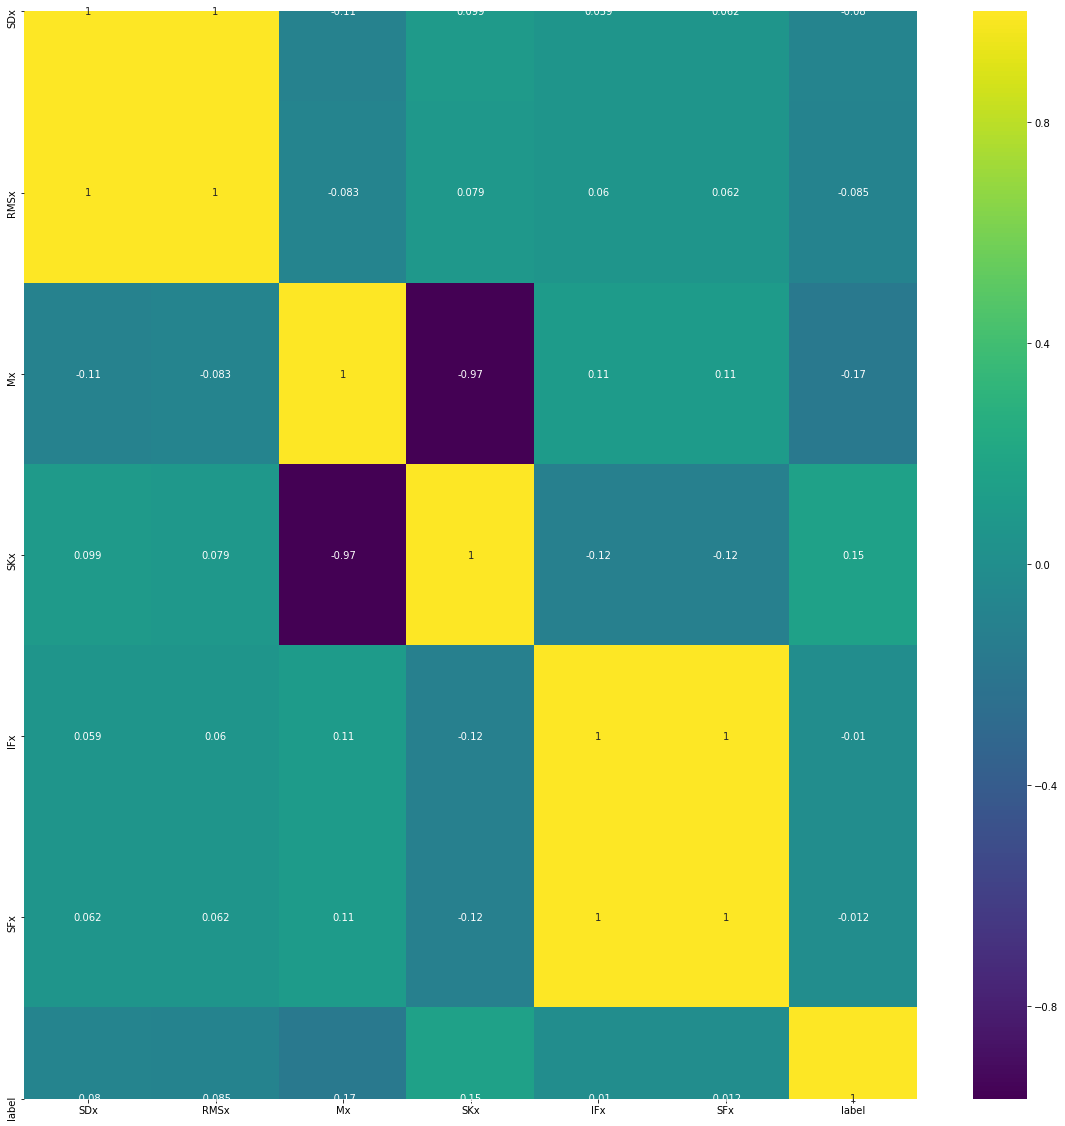

In [412]:
fig, ax = plt.subplots(figsize=(20,20))  
ax = sns.heatmap(Mainx.corr(),annot=True,cmap='viridis')

In [705]:
MainT

,SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,...,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label
0,15.384675,17.019055,5.913776,28.895555,31.963316,23.546730,0.208708,-0.135025,11.054129,0.693698,...,0.128527,0.109430,0.154857,96.042193,-148.452569,1.813331,138.449545,-236.721653,2.130130,0.0
1,15.340108,16.830203,6.019621,48.519732,53.222539,39.938956,0.347932,-0.190979,11.103144,0.413127,...,0.016082,0.013844,0.019240,57.611220,-104.958304,1.805326,139.451728,-278.683227,3.597085,0.0
2,15.752437,17.221180,6.781133,49.823131,54.461446,40.581681,0.346379,0.255981,10.895325,0.402319,...,0.015440,0.013297,0.019462,57.869584,78.305776,1.839761,143.840045,212.755793,3.724687,0.0
3,15.375369,16.867440,6.058979,48.631711,53.338641,40.062701,0.354989,-0.137815,11.126296,0.412175,...,0.016041,0.013796,0.019182,56.465960,-145.447300,1.801569,136.994996,-387.031262,3.600722,0.0
4,15.789461,17.283351,6.884082,49.928519,54.655761,40.683509,0.059703,0.202143,10.868714,0.401470,...,0.015415,0.013203,0.019515,335.742444,99.161686,1.844265,836.283193,270.382314,3.743176,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,15.806085,17.296861,6.889913,49.981285,54.699899,40.684222,0.074468,0.237525,10.865286,0.401046,...,0.015386,0.013189,0.019510,269.174041,84.390276,1.844847,671.180024,230.291214,3.744423,1.0
196,15.992851,17.562509,7.179673,50.589153,55.534805,40.476869,0.424895,-0.023693,10.596940,0.396227,...,0.015058,0.012793,0.019980,47.175908,-846.026490,1.891564,119.062805,-2343.946230,3.819675,1.0
197,16.382910,17.832220,7.716080,51.805264,56.404296,41.243388,0.075029,0.433811,10.515216,0.386926,...,0.014420,0.012489,0.019715,267.161604,46.206292,1.906265,690.472466,130.020471,3.922258,1.0
198,15.495496,16.995491,6.286505,49.000352,53.756717,40.107553,0.130648,0.400774,11.015688,0.409074,...,0.015865,0.013590,0.019421,153.425809,50.015171,1.819659,375.055948,134.132162,3.640948,1.0


## ANN based Classifier, without GA

In [767]:
X = Mainx.drop('label',axis=1).values
y = Mainx['label'].values

In [167]:
XT = MainT.drop('label',axis=1)

In [188]:
Scaled = scaler.fit_transform(MainT['SDx'].values.astype(float).reshape(-1, 1))

In [196]:
df_normalized = pd.DataFrame(Scaled,columns = ['SDx'])

In [197]:
df_normalized['label'] = MainT['label']

In [172]:
import seaborn as sns

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [768]:
X = Mainx.drop('label',axis=1).values
y = Mainx['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [479]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [508]:
X_train

array([[ 1.12769089e+02,  1.23535364e+02,  1.77750772e-01, ...,
         7.87741717e-04,  6.71527371e+02,  8.47416104e+00],
       [ 1.57884926e+01,  1.72563174e+01,  1.26958242e+00, ...,
         1.94018701e+00, -3.89994385e+02,  1.15626742e+00],
       [ 1.62177519e+01,  1.76877243e+01,  1.23597850e+00, ...,
         1.98909194e+00, -3.47122002e+02,  1.20603164e+00],
       ...,
       [ 1.63099094e+01,  1.78846428e+01,  1.22899472e+00, ...,
         1.96880556e+00,  1.82884679e+02,  1.22288651e+00],
       [ 1.11959924e+02,  1.22665072e+02,  1.79035426e-01, ...,
         7.84184879e-04,  1.05537224e+03,  8.38443240e+00],
       [ 1.57319435e+01,  1.70236387e+01,  1.27414598e+00, ...,
         1.94492288e+00,  6.83867017e+01,  1.17474111e+00]])

In [771]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(4,input_dim = 4,  activation='tanh'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='tanh'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [772]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, verbose=2,batch_size = 50)

Train on 159 samples, validate on 40 samples
Epoch 1/400
159/159 - 3s - loss: 4.3788 - accuracy: 0.5220 - val_loss: 4.7838 - val_accuracy: 0.5000
Epoch 2/400
159/159 - 0s - loss: 4.2171 - accuracy: 0.5346 - val_loss: 4.7276 - val_accuracy: 0.5000
Epoch 3/400
159/159 - 0s - loss: 4.3073 - accuracy: 0.4780 - val_loss: 4.6892 - val_accuracy: 0.5000
Epoch 4/400
159/159 - 0s - loss: 4.0471 - accuracy: 0.5094 - val_loss: 4.6584 - val_accuracy: 0.5000
Epoch 5/400
159/159 - 0s - loss: 3.7166 - accuracy: 0.5031 - val_loss: 4.6308 - val_accuracy: 0.5000
Epoch 6/400
159/159 - 0s - loss: 3.8564 - accuracy: 0.4969 - val_loss: 4.6118 - val_accuracy: 0.5000
Epoch 7/400
159/159 - 0s - loss: 3.6134 - accuracy: 0.4906 - val_loss: 4.5961 - val_accuracy: 0.5000
Epoch 8/400
159/159 - 0s - loss: 3.6227 - accuracy: 0.4969 - val_loss: 4.5771 - val_accuracy: 0.5000
Epoch 9/400
159/159 - 0s - loss: 3.0192 - accuracy: 0.4969 - val_loss: 4.5627 - val_accuracy: 0.5000
Epoch 10/400
159/159 - 0s - loss: 3.4678 - acc

Epoch 81/400
159/159 - 0s - loss: 1.1855 - accuracy: 0.5597 - val_loss: 0.6811 - val_accuracy: 0.5500
Epoch 82/400
159/159 - 0s - loss: 1.2770 - accuracy: 0.5220 - val_loss: 0.6802 - val_accuracy: 0.5500
Epoch 83/400
159/159 - 0s - loss: 1.3431 - accuracy: 0.5409 - val_loss: 0.6793 - val_accuracy: 0.5500
Epoch 84/400
159/159 - 0s - loss: 1.0805 - accuracy: 0.4906 - val_loss: 0.6784 - val_accuracy: 0.5500
Epoch 85/400
159/159 - 0s - loss: 1.0673 - accuracy: 0.4843 - val_loss: 0.6776 - val_accuracy: 0.5500
Epoch 86/400
159/159 - 0s - loss: 1.2734 - accuracy: 0.5157 - val_loss: 0.6770 - val_accuracy: 0.5500
Epoch 87/400
159/159 - 0s - loss: 1.2481 - accuracy: 0.5346 - val_loss: 0.6763 - val_accuracy: 0.5500
Epoch 88/400
159/159 - 0s - loss: 1.1547 - accuracy: 0.5346 - val_loss: 0.6757 - val_accuracy: 0.5500
Epoch 89/400
159/159 - 0s - loss: 1.3431 - accuracy: 0.5283 - val_loss: 0.6751 - val_accuracy: 0.5500
Epoch 90/400
159/159 - 0s - loss: 1.0513 - accuracy: 0.5409 - val_loss: 0.6744 - v

Epoch 161/400
159/159 - 0s - loss: 1.1440 - accuracy: 0.4654 - val_loss: 0.6362 - val_accuracy: 0.7000
Epoch 162/400
159/159 - 0s - loss: 0.8065 - accuracy: 0.4969 - val_loss: 0.6363 - val_accuracy: 0.7000
Epoch 163/400
159/159 - 0s - loss: 1.0434 - accuracy: 0.4969 - val_loss: 0.6365 - val_accuracy: 0.7000
Epoch 164/400
159/159 - 0s - loss: 1.1484 - accuracy: 0.4717 - val_loss: 0.6368 - val_accuracy: 0.7000
Epoch 165/400
159/159 - 0s - loss: 0.8879 - accuracy: 0.5723 - val_loss: 0.6369 - val_accuracy: 0.7000
Epoch 166/400
159/159 - 0s - loss: 1.0162 - accuracy: 0.4717 - val_loss: 0.6370 - val_accuracy: 0.7000
Epoch 167/400
159/159 - 0s - loss: 0.9471 - accuracy: 0.5157 - val_loss: 0.6370 - val_accuracy: 0.7000
Epoch 168/400
159/159 - 0s - loss: 1.0696 - accuracy: 0.4780 - val_loss: 0.6370 - val_accuracy: 0.7000
Epoch 169/400
159/159 - 0s - loss: 0.9115 - accuracy: 0.5472 - val_loss: 0.6370 - val_accuracy: 0.7000
Epoch 170/400
159/159 - 0s - loss: 0.8026 - accuracy: 0.5912 - val_loss: 

Epoch 241/400
159/159 - 0s - loss: 1.1379 - accuracy: 0.4717 - val_loss: 0.6363 - val_accuracy: 0.6750
Epoch 242/400
159/159 - 0s - loss: 0.9985 - accuracy: 0.4403 - val_loss: 0.6365 - val_accuracy: 0.6750
Epoch 243/400
159/159 - 0s - loss: 0.9042 - accuracy: 0.5283 - val_loss: 0.6367 - val_accuracy: 0.6750
Epoch 244/400
159/159 - 0s - loss: 0.8828 - accuracy: 0.5597 - val_loss: 0.6369 - val_accuracy: 0.6750
Epoch 245/400
159/159 - 0s - loss: 1.1620 - accuracy: 0.4906 - val_loss: 0.6369 - val_accuracy: 0.6750
Epoch 246/400
159/159 - 0s - loss: 0.9436 - accuracy: 0.5472 - val_loss: 0.6370 - val_accuracy: 0.6750
Epoch 247/400
159/159 - 0s - loss: 0.8376 - accuracy: 0.5409 - val_loss: 0.6372 - val_accuracy: 0.6750
Epoch 248/400
159/159 - 0s - loss: 0.8304 - accuracy: 0.5220 - val_loss: 0.6373 - val_accuracy: 0.6750
Epoch 249/400
159/159 - 0s - loss: 0.8045 - accuracy: 0.4277 - val_loss: 0.6374 - val_accuracy: 0.6750
Epoch 250/400
159/159 - 0s - loss: 0.8718 - accuracy: 0.5409 - val_loss: 

Epoch 321/400
159/159 - 0s - loss: 0.9383 - accuracy: 0.5157 - val_loss: 0.6445 - val_accuracy: 0.6750
Epoch 322/400
159/159 - 0s - loss: 0.9661 - accuracy: 0.5220 - val_loss: 0.6444 - val_accuracy: 0.6750
Epoch 323/400
159/159 - 0s - loss: 0.8440 - accuracy: 0.5220 - val_loss: 0.6443 - val_accuracy: 0.6750
Epoch 324/400
159/159 - 0s - loss: 0.9673 - accuracy: 0.4465 - val_loss: 0.6442 - val_accuracy: 0.6750
Epoch 325/400
159/159 - 0s - loss: 1.0929 - accuracy: 0.5157 - val_loss: 0.6442 - val_accuracy: 0.6750
Epoch 326/400
159/159 - 0s - loss: 0.8534 - accuracy: 0.5912 - val_loss: 0.6442 - val_accuracy: 0.6750
Epoch 327/400
159/159 - 0s - loss: 0.9528 - accuracy: 0.4717 - val_loss: 0.6443 - val_accuracy: 0.6750
Epoch 328/400
159/159 - 0s - loss: 0.7265 - accuracy: 0.5094 - val_loss: 0.6445 - val_accuracy: 0.6750
Epoch 329/400
159/159 - 0s - loss: 1.0496 - accuracy: 0.4717 - val_loss: 0.6446 - val_accuracy: 0.6750
Epoch 330/400
159/159 - 0s - loss: 0.8558 - accuracy: 0.4843 - val_loss: 

In [773]:
model.evaluate(X_train, y_train, verbose=0)

[0.6941785673675297, 0.5345912]

In [774]:
model.evaluate(X_test, y_test, verbose=0)

[0.6448362827301025, 0.675]

In [121]:
from sklearn.metrics import classification_report,confusion_matrix

In [775]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.63      0.85      0.72        20
         1.0       0.77      0.50      0.61        20

    accuracy                           0.68        40
   macro avg       0.70      0.68      0.66        40
weighted avg       0.70      0.68      0.66        40



## Accuracy is too low, let's try something else

In [744]:
losses = pd.DataFrame(model.history.history)


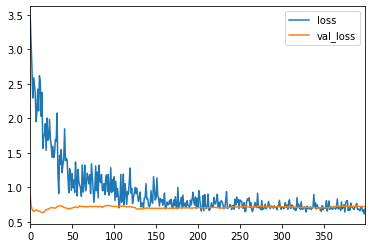

In [776]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [125]:
%matplotlib inline

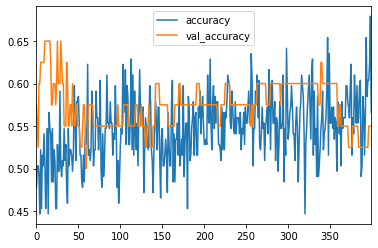

In [777]:
losses[['accuracy','val_accuracy']].plot()

## SVM based classifier

In [671]:
from sklearn import svm
from sklearn.pipeline import Pipeline

SyntaxError: invalid syntax (<ipython-input-671-3c3f7ccb647c>, line 1)

In [778]:
clf = svm.SVC()

In [782]:
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [783]:
preds = clf.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score

In [784]:
accuracy_score(y_test,preds)

0.55

## Random Forest based Classifier, pipeliend with Feature Selection (SVC)

In [664]:
from sklearn.feature_selection import SelectFromModel

In [672]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [788]:
clf2 = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', RandomForestClassifier())
])
clf2.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=True,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=1000,
                                                     multi_class='ovr',
                                                     penalty='l2',
                                                     random_state=None,
                                                     tol=0.0001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
                                 threshold=None)),
                ('classification',
                 RandomForestClassifier(bootstrap=Tru

In [790]:
accuracy_score(y_test,clf2.predict(X_test))

0.525

## All of the accuracies above are still too low. Let's try utilizing Genetic Algorithm for the feature selection

In [816]:
mBroken['dt'] = mBroken['times'].apply(lambda x: float((x- 15840094829302)/10000))

In [817]:
mBroken

,times,x,y,z,dt
0,15840094829302,20.044793,-20.084019,20.044793,0.0000
1,15840094829321,20.044793,20.044793,19.927113,0.0019
2,15840094829337,-20.084019,12.552512,20.044793,0.0035
3,15840094829352,-20.084019,-13.415497,0.392266,0.0050
4,15840094829367,-8.472946,-20.084019,9.414384,0.0065
...,...,...,...,...,...
99995,15840095996852,20.044793,20.044793,11.375714,116.7550
99996,15840095996863,-18.907221,20.044793,9.257478,116.7561
99997,15840095996875,-1.412158,-2.353596,13.101684,116.7573
99998,15840095996886,12.003340,-20.084019,6.197803,116.7584


In [818]:
mHealthy['dt'] = mHealthy['times'].apply(lambda x: float((x-15839399805840)/10000))

In [819]:
mHealthy

,times,x,y,z,dt
0,15839399805840,-15.926000,-10.669635,7.139241,0.0000
1,15839399805860,16.475172,2.432049,9.335931,0.0020
2,15839399805875,-10.355822,-4.079566,12.552512,0.0035
3,15839399805890,8.629852,11.532620,14.984561,0.0050
4,15839399805906,-3.687300,-15.376827,16.161359,0.0066
...,...,...,...,...,...
99995,15839401012566,9.022118,-6.903882,17.573517,120.6726
99996,15839401012577,-11.924886,4.314926,6.903882,120.6737
99997,15839401012588,13.572404,0.706079,6.276256,120.6748
99998,15839401012599,17.102798,0.156906,13.258591,120.6759


In [809]:
mBroken.describe()

,times,x,y,z
count,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,1.584010e+13,0.272592,0.172648,10.835820
std,3.386652e+05,15.810578,17.329448,6.851131
min,1.584009e+13,-20.084019,-20.084019,-20.084019
25%,1.584010e+13,-17.495064,-20.084019,6.197803
50%,1.584010e+13,0.470719,0.470719,11.140354
75%,1.584010e+13,18.514955,20.044793,16.475172
max,1.584010e+13,20.044793,20.044793,20.044793


In [810]:
mHealthy.describe()

,times,x,y,z
count,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,1.583940e+13,0.497681,0.107074,11.405425
std,3.490545e+05,10.734688,8.590663,4.381622
min,1.583940e+13,-20.084019,-20.084019,1.019892
25%,1.583940e+13,-9.806650,-7.766867,7.531507
50%,1.583940e+13,0.313813,0.000000,11.454167
75%,1.583940e+13,10.748088,7.923773,15.376827
max,1.583940e+13,20.044793,20.044793,20.044793


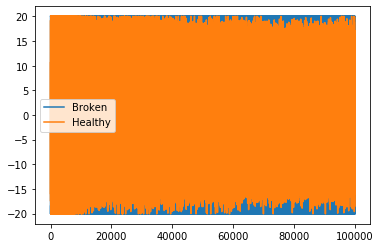

In [815]:
plt.plot(mBroken[['x']], label = 'Broken')
plt.plot(mHealthy[['x']], label = 'Healthy')
plt.legend()

# Proposed Framework: ANN + GA

In [854]:
Main = pd.DataFrame(columns=['SDx','SDy','SDz','RMSx','RMSy','RMSz','Mx','My','Mz','CRx','CRy','CRz','Kx','Ky','Kz','SKx','SKy','SKz','CFx','CFy','CFz','IFx','IFy','IFz','SFx','SFy','SFz','label'])
Main2 = pd.DataFrame(columns=['SDx','SDy','SDz','RMSx','RMSy','RMSz','Mx','My','Mz','CRx','CRy','CRz','Kx','Ky','Kz','SKx','SKy','SKz','CFx','CFy','CFz','IFx','IFy','IFz','SFx','SFy','SFz','label'])

In [855]:
Main

,SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,...,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label


In [856]:
#SAMPEL BROKEN coba 100
for i in range(0,100):
    num = random.randint(0,99899)
    df = mBroken[num:num+100]
    SDx = df.std()['x']
    SDy = df.std()['y']
    SDz = df.std()['z']
    RMSx = RMScalc(df,'x')
    RMSy = RMScalc(df,'y')
    RMSz = RMScalc(df,'z')
    Mx = df['x'].mean()
    My = df['y'].mean()
    Mz = df['z'].mean()
    CRx = float(df['x'].max()/RMSx)
    CRy = float(df['y'].max()/RMSy)
    CRz = float(df['z'].max()/RMSz)
    Kx = df['x'].kurt()
    Ky = df['y'].kurt()
    Kz = df['z'].kurt()
    SKx = df['x'].skew()
    SKy = df['y'].skew()
    SKz = df['z'].skew()
    CFx = float(df['x'].max()/Clearance(df,'x'))
    CFy = float(df['y'].max()/Clearance(df,'y'))
    CFz = float(df['z'].max()/Clearance(df,'z'))
    IFx = float(df['x'].max()/Mx)
    IFy = float(df['y'].max()/My)
    IFz = float(df['z'].max()/Mz)
    SFx = float(RMSx/Mx)
    SFy = float(RMSy/My)
    SFz = float(RMSz/Mz)
    label = 0
    list = [SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,CRy,CRz,Kx,Ky,Kz,SKx,SKy,SKz,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label]
    Main.loc[i] = list

In [858]:
# SAMPEL HEALTHY COBA 100
for i in range(0,100):
    num = random.randint(0,99899)
    df = mHealthy[num:num+100]
    SDx = df.std()['x']
    SDy = df.std()['y']
    SDz = df.std()['z']
    RMSx = RMScalc(df,'x')
    RMSy = RMScalc(df,'y')
    RMSz = RMScalc(df,'z')
    Mx = df['x'].mean()
    My = df['y'].mean()
    Mz = df['z'].mean()
    CRx = float(df['x'].max()/RMSx)
    CRy = float(df['y'].max()/RMSy)
    CRz = float(df['z'].max()/RMSz)
    Kx = df['x'].kurt()
    Ky = df['y'].kurt()
    Kz = df['z'].kurt()
    SKx = df['x'].skew()
    SKy = df['y'].skew()
    SKz = df['z'].skew()
    CFx = float(df['x'].max()/Clearance(df,'x'))
    CFy = float(df['y'].max()/Clearance(df,'y'))
    CFz = float(df['z'].max()/Clearance(df,'z'))
    IFx = float(df['x'].max()/Mx)
    IFy = float(df['y'].max()/My)
    IFz = float(df['z'].max()/Mz)
    SFx = float(RMSx/Mx)
    SFy = float(RMSy/My)
    SFz = float(RMSz/Mz)
    label = 1
    list = [SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,CRy,CRz,Kx,Ky,Kz,SKx,SKy,SKz,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label]
    Main2.loc[i] = list

In [857]:
Main.describe()

,SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,...,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,15.811402,17.291499,6.817507,4.997183,5.461258,4.049627,0.263050,0.017307,10.830484,4.018881,...,154.032717,132.590492,196.277752,22.622373,-1.691185,1.858212,5.623771,-0.437250,0.374672,0.0
std,0.707901,0.592354,0.722814,0.219835,0.187612,0.169821,1.468881,1.508130,0.678128,0.176168,...,12.311673,8.553577,11.104169,197.538830,120.116406,0.120680,49.757905,33.609375,0.016382,0.0
min,14.156146,15.766507,5.628146,4.464315,4.984337,3.553857,-3.165587,-3.259338,8.542377,3.632994,...,129.852564,114.456095,169.865288,-608.333333,-505.940594,1.628063,-151.438988,-140.762168,0.349423,0.0
25%,15.234077,16.862880,6.230125,4.829552,5.318159,3.930048,-0.835821,-0.935064,10.501059,3.873162,...,145.276762,126.770850,188.980491,-18.749175,-25.480135,1.782011,-4.587977,-6.829002,0.362119,0.0
50%,15.748443,17.381063,6.783691,4.983593,5.483542,4.047163,0.131998,-0.107285,10.768486,4.022163,...,154.087055,130.903785,196.536263,6.559003,-7.818260,1.861434,1.642805,-2.138963,0.372082,0.0
75%,16.329629,17.721782,7.323395,5.175310,5.601714,4.142091,1.114134,0.979782,11.248424,4.150445,...,163.117086,138.650757,203.101866,25.264333,17.438336,1.908838,6.305438,4.717384,0.384013,0.0
max,17.506953,18.656233,8.571501,5.517431,5.873372,4.615017,3.714367,4.162727,12.312053,4.490004,...,186.039217,152.778438,241.108590,1548.484848,740.579710,2.346512,395.180086,212.762237,0.433683,0.0


In [859]:
Main2.describe()

,SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,...,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,10.838393,8.488567,4.361653,3.416791,2.675144,3.864135,0.427123,0.132790,11.417577,5.381331,...,210.604090,224.845035,173.805502,68.416488,-209.578590,1.668265,12.227062,-34.944201,0.338452,1.0
std,0.762731,0.951605,0.367012,0.238884,0.299054,0.080230,0.513320,0.459413,0.229855,0.300973,...,12.861978,19.645056,7.288253,742.900130,1165.108853,0.062031,128.702291,182.977890,0.003637,0.0
min,9.286903,7.094987,3.136915,2.923451,2.232394,3.667621,-1.305461,-1.370577,10.831249,4.857283,...,185.387307,184.511325,154.118923,-3137.500000,-10150.000000,1.510044,-527.496149,-1501.729004,0.328341,1.0
25%,10.360127,7.877488,4.152225,3.271819,2.479694,3.806476,0.109344,-0.096890,11.267841,5.141781,...,200.092701,210.143786,169.211765,16.527743,-59.797791,1.628988,3.124677,-10.424921,0.336465,1.0
50%,10.760548,8.380454,4.321755,3.402963,2.638653,3.863757,0.446399,0.102774,11.409057,5.319126,...,208.794423,224.859172,174.159046,31.563306,21.380304,1.672174,5.972405,3.873863,0.338056,1.0
75%,11.160953,8.854329,4.630481,3.517227,2.789127,3.919925,0.786199,0.339506,11.540073,5.595046,...,219.118606,236.581485,178.053730,53.912527,54.251453,1.716931,10.411272,10.012158,0.340896,1.0
max,13.033142,11.747183,5.196352,4.103807,3.698055,4.137137,1.755783,1.330566,12.355594,6.199859,...,243.794565,284.814391,188.859015,6387.500000,725.925926,1.796320,1104.010162,115.560363,0.347533,1.0


In [883]:
w = pd.DataFrame(columns = ["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"])

In [884]:
w[["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"]] = Main[["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"]]

In [885]:
w[["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"]] = scaler.fit_transform(w[["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"]])

In [893]:
w["label"] = "Broken"

In [887]:
w

,SDx,Mx,RMSx,CRx,Kx,SKx,CFx,IFx,SFx,label
0,0.310088,0.305833,0.311940,0.640899,0.555942,0.838475,0.520010,0.273296,0.268786,Broken
1,0.753260,0.846171,0.807853,0.161391,0.320609,0.107072,0.150227,0.285550,0.280708,Broken
2,0.286995,0.190148,0.311949,0.640889,0.796752,0.863149,0.653495,0.277048,0.272326,Broken
3,0.810740,0.571355,0.807218,0.161945,0.196135,0.464430,0.186349,0.294195,0.289750,Broken
4,0.277852,0.610012,0.279117,0.676351,0.688374,0.452582,0.793079,0.291063,0.285488,Broken
...,...,...,...,...,...,...,...,...,...,...
95,0.911435,0.620389,0.913442,0.071213,0.028903,0.461757,0.060625,0.290480,0.286049,Broken
96,0.201581,0.576373,0.198639,0.765492,0.637490,0.516247,0.684246,0.293671,0.287736,Broken
97,0.299534,0.964422,0.408477,0.539534,0.809097,0.088211,0.577318,0.284730,0.279627,Broken
98,0.280659,0.782941,0.320341,0.631907,0.696169,0.298538,0.607254,0.286236,0.281002,Broken


In [888]:
x = pd.DataFrame(columns = ["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"])

In [889]:
x[["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"]] = Main2[["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"]]

In [890]:
x[["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"]] = scaler.fit_transform(x[["SDx", "Mx","RMSx","CRx","Kx","SKx","CFx","IFx","SFx"]])

In [894]:
x["label"] = "Healthy"

In [895]:
x

,SDx,Mx,RMSx,CRx,Kx,SKx,CFx,IFx,SFx,label
0,0.197093,0.014095,0.216952,0.554022,0.633631,0.829613,0.560363,0.327915,0.321775,Healthy
1,0.425478,0.495643,0.424264,0.426541,0.497417,0.548833,0.472293,0.338612,0.333227,Healthy
2,0.201339,0.488467,0.200363,0.709321,0.628788,0.365456,0.709760,0.339548,0.333520,Healthy
3,0.161870,0.441568,0.160494,1.000000,0.459626,0.394694,1.000000,0.373171,0.364539,Healthy
4,0.311521,0.420554,0.309913,0.326025,0.616962,0.516305,0.471495,0.228061,0.211588,Healthy
...,...,...,...,...,...,...,...,...,...,...
95,0.344191,0.462327,0.342687,0.332856,0.507642,0.744694,0.375865,0.346269,0.341890,Healthy
96,0.504817,0.589441,0.505935,0.548167,0.354278,0.531223,0.640684,0.333540,0.327643,Healthy
97,0.433710,0.496156,0.432491,0.398088,0.566593,0.427158,0.504464,0.338505,0.333182,Healthy
98,0.222198,0.626602,0.225699,0.888579,0.578382,0.577339,0.829559,0.332703,0.326509,Healthy


In [896]:
z = w[0:1].append(x[0:1])

In [945]:
z.set_index('label',inplace = True)

In [958]:
q = z.transpose()

In [997]:
z

,SDx,Mx,RMSx,CRx,Kx,SKx,CFx,IFx,SFx
label,,,,,,,,,
Broken,0.310088,0.305833,0.311940,0.640899,0.555942,0.838475,0.520010,0.273296,0.268786
Healthy,0.197093,0.014095,0.216952,0.554022,0.633631,0.829613,0.560363,0.327915,0.321775


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

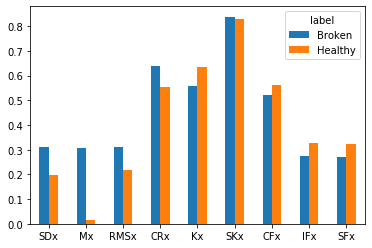

In [963]:
q.plot.bar()
plt.xticks(rotation=0)

In [1051]:
r = z.T.rename_axis('stats').reset_index()

In [1048]:
q

label,Broken,Healthy
SDx,0.310088,0.197093
Mx,0.305833,0.014095
RMSx,0.311940,0.216952
CRx,0.640899,0.554022
Kx,0.555942,0.633631
SKx,0.838475,0.829613
CFx,0.520010,0.560363
IFx,0.273296,0.327915
SFx,0.268786,0.321775


In [1052]:
r

label,stats,Broken,Healthy
0,SDx,0.310088,0.197093
1,Mx,0.305833,0.014095
2,RMSx,0.311940,0.216952
3,CRx,0.640899,0.554022
4,Kx,0.555942,0.633631
5,SKx,0.838475,0.829613
6,CFx,0.520010,0.560363
7,IFx,0.273296,0.327915
8,SFx,0.268786,0.321775


In [1053]:
n = r.melt(id_vars='stats', var_name='key', value_name='value')

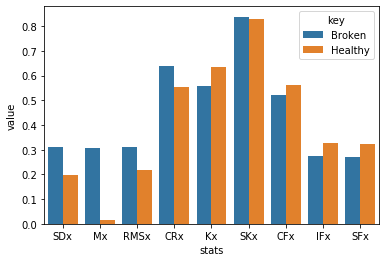

In [1056]:
sns.barplot(x = 'stats', y = 'value', hue= 'key', data = n)

In [1059]:
Main = Main.append(Main2)

In [1063]:
Main[101:121]

,SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,...,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label
1,10.880847,7.997454,4.032670,3.424234,2.516970,3.895355,0.211824,0.178089,11.646378,5.429947,...,212.972664,231.563276,164.371439,87.777778,82.819383,1.589761,16.165494,14.133234,0.334469,1.0
2,10.041169,8.914152,5.135198,3.159950,2.806964,3.958122,0.189857,0.350686,11.426316,5.809600,...,226.842471,200.378212,186.141177,96.694215,39.373602,1.754266,16.643867,8.004214,0.346404,1.0
3,9.893308,8.149374,4.633447,3.112891,2.564665,3.919706,0.046287,-0.163967,11.505946,6.199859,...,243.794565,237.087211,174.189319,416.949153,-91.866029,1.663712,67.251388,-15.641331,0.340668,1.0
4,10.453934,8.973586,4.735301,3.289258,2.823635,3.933575,-0.018044,-0.095713,11.512223,5.294996,...,212.926060,228.490273,175.267239,-965.217391,-172.131148,1.669620,-182.288591,-29.501092,0.341687,1.0
5,11.356488,8.768261,4.464753,3.573398,2.792706,3.909998,0.107873,-1.370577,11.538897,5.609448,...,225.264042,184.511325,170.211937,185.818182,-9.559244,1.631765,33.125930,-2.037613,0.338854,1.0
6,10.481273,7.397652,4.283762,3.298236,2.328017,3.803230,0.158475,-0.136509,11.246266,5.351942,...,205.073583,253.199812,173.284263,111.386139,-104.597701,1.667248,20.812284,-17.054001,0.338177,1.0
7,10.334809,7.165055,3.944684,3.252262,2.254433,3.843899,0.178481,-0.007061,11.504377,6.163340,...,238.451117,203.816735,173.687244,112.307692,-1677.777778,1.684397,18.221889,-319.289141,0.334125,1.0
8,11.350972,7.489294,4.615716,3.576254,2.356487,3.777727,0.582907,-0.040796,11.028166,5.155256,...,196.802468,224.398873,181.696995,31.628533,-321.153846,1.728676,6.135202,-57.763162,0.342553,1.0
9,11.343077,8.200894,4.833079,3.569023,2.580441,3.957467,0.022751,0.068254,11.553803,5.429480,...,216.254299,284.814391,177.832116,851.724138,270.114943,1.690772,156.870290,37.806291,0.342525,1.0
10,10.344162,8.047679,4.438727,3.264043,2.532260,3.928736,0.779825,-0.076884,11.612250,5.263793,...,205.016327,226.385676,179.785364,22.032193,-191.836735,1.726176,4.185611,-32.936051,0.338327,1.0


In [1065]:
X = Main.drop('label',axis=1).values
y = Main['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [1072]:
modelF = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# input layer
modelF.add(Dense(27,input_dim = 27,  activation='tanh'))
model.add(Dropout(0.2))

# hidden layer
modelF.add(Dense(13, activation='relu'))
modelF.add(Dropout(0.2))

# hidden layer
modelF.add(Dense(13, activation='relu'))
modelF.add(Dropout(0.2))

# output layer
modelF.add(Dense(units=1,activation='tanh'))

# Compile model
modelF.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [1073]:
modelF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, verbose=2,batch_size = 50)

Train on 160 samples, validate on 40 samples
Epoch 1/400
160/160 - 3s - loss: 2.6767 - accuracy: 0.5688 - val_loss: 1.6190 - val_accuracy: 0.5000
Epoch 2/400
160/160 - 0s - loss: 2.1575 - accuracy: 0.6000 - val_loss: 1.5008 - val_accuracy: 0.5250
Epoch 3/400
160/160 - 0s - loss: 1.5232 - accuracy: 0.6375 - val_loss: 1.0847 - val_accuracy: 0.5750
Epoch 4/400
160/160 - 0s - loss: 1.8494 - accuracy: 0.6438 - val_loss: 1.0301 - val_accuracy: 0.5750
Epoch 5/400
160/160 - 0s - loss: 1.6511 - accuracy: 0.6313 - val_loss: 0.9849 - val_accuracy: 0.6000
Epoch 6/400
160/160 - 0s - loss: 1.7803 - accuracy: 0.5938 - val_loss: 0.9478 - val_accuracy: 0.7500
Epoch 7/400
160/160 - 0s - loss: 1.4973 - accuracy: 0.7125 - val_loss: 0.9249 - val_accuracy: 0.7750
Epoch 8/400
160/160 - 0s - loss: 1.1641 - accuracy: 0.7188 - val_loss: 0.9078 - val_accuracy: 0.8000
Epoch 9/400
160/160 - 0s - loss: 1.6300 - accuracy: 0.6812 - val_loss: 0.8734 - val_accuracy: 0.8000
Epoch 10/400
160/160 - 0s - loss: 1.0173 - acc

Epoch 81/400
160/160 - 0s - loss: 0.5391 - accuracy: 0.8313 - val_loss: 0.3312 - val_accuracy: 0.8250
Epoch 82/400
160/160 - 0s - loss: 0.4530 - accuracy: 0.8813 - val_loss: 0.3294 - val_accuracy: 0.8250
Epoch 83/400
160/160 - 0s - loss: 0.3585 - accuracy: 0.8313 - val_loss: 0.3306 - val_accuracy: 0.8000
Epoch 84/400
160/160 - 0s - loss: 0.3795 - accuracy: 0.8813 - val_loss: 0.3293 - val_accuracy: 0.8000
Epoch 85/400
160/160 - 0s - loss: 0.2782 - accuracy: 0.8750 - val_loss: 0.3287 - val_accuracy: 0.8000
Epoch 86/400
160/160 - 0s - loss: 0.4622 - accuracy: 0.8813 - val_loss: 0.3277 - val_accuracy: 0.8250
Epoch 87/400
160/160 - 0s - loss: 0.3245 - accuracy: 0.8750 - val_loss: 0.3236 - val_accuracy: 0.8000
Epoch 88/400
160/160 - 0s - loss: 0.2789 - accuracy: 0.8875 - val_loss: 0.3251 - val_accuracy: 0.8250
Epoch 89/400
160/160 - 0s - loss: 0.3297 - accuracy: 0.8750 - val_loss: 0.3270 - val_accuracy: 0.8250
Epoch 90/400
160/160 - 0s - loss: 0.3102 - accuracy: 0.8813 - val_loss: 0.3359 - v

Epoch 161/400
160/160 - 0s - loss: 0.2147 - accuracy: 0.9187 - val_loss: 0.2635 - val_accuracy: 0.8750
Epoch 162/400
160/160 - 0s - loss: 0.1891 - accuracy: 0.9187 - val_loss: 0.2639 - val_accuracy: 0.8750
Epoch 163/400
160/160 - 0s - loss: 0.1700 - accuracy: 0.9563 - val_loss: 0.2645 - val_accuracy: 0.8750
Epoch 164/400
160/160 - 0s - loss: 0.1610 - accuracy: 0.9375 - val_loss: 0.2650 - val_accuracy: 0.8750
Epoch 165/400
160/160 - 0s - loss: 0.2051 - accuracy: 0.9250 - val_loss: 0.2651 - val_accuracy: 0.8750
Epoch 166/400
160/160 - 0s - loss: 0.1846 - accuracy: 0.9187 - val_loss: 0.2656 - val_accuracy: 0.9000
Epoch 167/400
160/160 - 0s - loss: 0.1509 - accuracy: 0.9438 - val_loss: 0.2670 - val_accuracy: 0.9000
Epoch 168/400
160/160 - 0s - loss: 0.2506 - accuracy: 0.9250 - val_loss: 0.2686 - val_accuracy: 0.9000
Epoch 169/400
160/160 - 0s - loss: 0.1628 - accuracy: 0.9187 - val_loss: 0.2704 - val_accuracy: 0.9000
Epoch 170/400
160/160 - 0s - loss: 0.2435 - accuracy: 0.9375 - val_loss: 

Epoch 241/400
160/160 - 0s - loss: 0.1030 - accuracy: 0.9625 - val_loss: 0.1967 - val_accuracy: 0.9250
Epoch 242/400
160/160 - 0s - loss: 0.1405 - accuracy: 0.9500 - val_loss: 0.1957 - val_accuracy: 0.9250
Epoch 243/400
160/160 - 0s - loss: 0.0946 - accuracy: 0.9563 - val_loss: 0.1947 - val_accuracy: 0.9250
Epoch 244/400
160/160 - 0s - loss: 0.0924 - accuracy: 0.9625 - val_loss: 0.1936 - val_accuracy: 0.9250
Epoch 245/400
160/160 - 0s - loss: 0.0983 - accuracy: 0.9688 - val_loss: 0.1933 - val_accuracy: 0.9250
Epoch 246/400
160/160 - 0s - loss: 0.1154 - accuracy: 0.9500 - val_loss: 0.1938 - val_accuracy: 0.9250
Epoch 247/400
160/160 - 0s - loss: 0.1071 - accuracy: 0.9688 - val_loss: 0.1944 - val_accuracy: 0.9250
Epoch 248/400
160/160 - 0s - loss: 0.0848 - accuracy: 0.9688 - val_loss: 0.1946 - val_accuracy: 0.9250
Epoch 249/400
160/160 - 0s - loss: 0.0825 - accuracy: 0.9750 - val_loss: 0.1946 - val_accuracy: 0.9250
Epoch 250/400
160/160 - 0s - loss: 0.0932 - accuracy: 0.9750 - val_loss: 

Epoch 321/400
160/160 - 0s - loss: 0.0609 - accuracy: 0.9812 - val_loss: 0.1700 - val_accuracy: 0.9250
Epoch 322/400
160/160 - 0s - loss: 0.0483 - accuracy: 0.9937 - val_loss: 0.1704 - val_accuracy: 0.9250
Epoch 323/400
160/160 - 0s - loss: 0.0610 - accuracy: 1.0000 - val_loss: 0.1720 - val_accuracy: 0.9250
Epoch 324/400
160/160 - 0s - loss: 0.0443 - accuracy: 0.9875 - val_loss: 0.1740 - val_accuracy: 0.9250
Epoch 325/400
160/160 - 0s - loss: 0.0642 - accuracy: 0.9812 - val_loss: 0.1749 - val_accuracy: 0.9250
Epoch 326/400
160/160 - 0s - loss: 0.0493 - accuracy: 0.9875 - val_loss: 0.1762 - val_accuracy: 0.9250
Epoch 327/400
160/160 - 0s - loss: 0.0511 - accuracy: 0.9875 - val_loss: 0.1774 - val_accuracy: 0.9250
Epoch 328/400
160/160 - 0s - loss: 0.0463 - accuracy: 0.9937 - val_loss: 0.1783 - val_accuracy: 0.9250
Epoch 329/400
160/160 - 0s - loss: 0.0658 - accuracy: 0.9750 - val_loss: 0.1790 - val_accuracy: 0.9250
Epoch 330/400
160/160 - 0s - loss: 0.0649 - accuracy: 0.9937 - val_loss: 

In [1075]:
modelF.evaluate(X_train, y_train, verbose=0)

[0.015137292072176933, 1.0]

In [1076]:
modelF.evaluate(X_test, y_test, verbose=0)

[0.18210986107587815, 0.95]

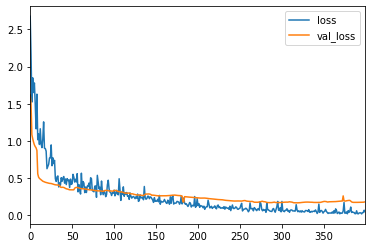

In [1077]:
losses = pd.DataFrame(modelF.history.history)

losses[['loss','val_loss']].plot()

Text(0, 0.5, 'Loss')

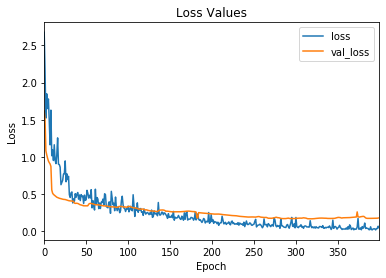

In [1161]:
losses1 = pd.DataFrame(modelF.history.history)
losses1[['loss','val_loss']].plot(title = 'Loss Values')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

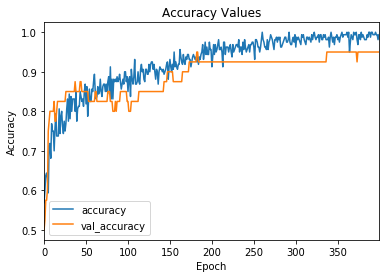

In [1163]:
losses1[['accuracy','val_accuracy']].plot(title = 'Accuracy Values')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

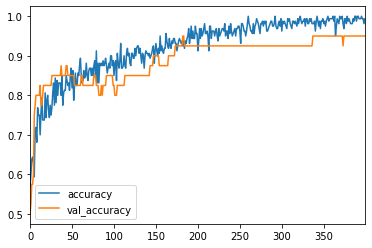

In [1078]:
losses[['accuracy','val_accuracy']].plot()

In [1079]:
predictions = modelF.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        20
         1.0       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



## Genetic Algorithm

In [1102]:
def modelGA(train_data,train_labels,test_data,test_labels):
    inputSize = train_data[1].size
    modelG = Sequential()
    # input layer
    modelG.add(Dense(inputSize,input_dim = inputSize,  activation='tanh'))
    #model.add(Dropout(0.2))

    # hidden layer
    modelG.add(Dense(13, activation='relu'))
    modelG.add(Dropout(0.2))

    # hidden layer
    modelG.add(Dense(13, activation='relu'))
    modelG.add(Dropout(0.2))

    # output layer
    modelG.add(Dense(units=1,activation='tanh'))

    # Compile model
    modelG.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
    modelG.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=150, verbose=2,batch_size = 50)
    acc = modelG.evaluate(test_data, test_labels, verbose=0)[1]
    return acc
    


def reduce_features(solution, features):
    selected_elements_indices = np.where(solution == 1)[0]
    reduced_features = features[:, selected_elements_indices]
    return reduced_features


def classification_accuracy(labels, predictions):
    correct = np.where(labels == predictions)[0]
    accuracy = correct.shape[0]/labels.shape[0]
    return accuracy


def cal_pop_fitness(pop, features, labels, train_indices, test_indices):
    accuracies = np.zeros(pop.shape[0])
    idx = 0

    for curr_solution in pop:
        reduced_features = reduce_features(curr_solution, features)
        train_data = reduced_features[train_indices, :]
        test_data = reduced_features[test_indices, :]

        train_labels = labels[train_indices]
        test_labels = labels[test_indices]

        #SV_classifier = sklearn.svm.SVC(gamma='scale')
        #SV_classifier.fit(X=train_data, y=train_labels)
        
        #predictions = SV_classifier.predict(test_data)
        accuracy = modelGA(train_data,train_labels,test_data,test_labels)
        #accuracies[idx] = classification_accuracy(test_labels, predictions)
        accuracies[idx] = accuracy
        idx = idx + 1
    return accuracies

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutation(offspring_crossover, num_mutations=2):
    mutation_idx = np.random.randint(low=0, high=offspring_crossover.shape[1], size=num_mutations)
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        offspring_crossover[idx, mutation_idx] = 1 - offspring_crossover[idx, mutation_idx]
    return offspring_crossover

In [1103]:
data_inputs = X
data_outputs = y
num_samples = data_inputs.shape[0]
num_feature_elements = data_inputs.shape[1]
print("num samples: ",num_samples)
print("num_feature_elements: ", num_feature_elements)


train_indices = np.arange(1, num_samples, 4)
test_indices = np.arange(0, num_samples, 4)
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])

"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""
sol_per_pop = 5 # Population size.
num_parents_mating = 3 # Number of parents inside the mating pool.
num_mutations = 2 # Number of elements to mutate.

# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)

# Creating the initial population.
new_population = np.random.randint(low=0, high=2, size=pop_shape)
print("shape = ",new_population.shape[1])


best_outputs = []
num_generations = 20
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

    best_outputs.append(np.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))[0]
best_match_idx = best_match_idx[0]

best_solution = new_population[best_match_idx, :]
best_solution_indices = np.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)

matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

num samples:  200
num_feature_elements:  27
Number of training samples:  50
Number of test samples:  50
shape =  27
Generation :  0
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 3s - loss: 1.8824 - accuracy: 0.6200 - val_loss: 0.9696 - val_accuracy: 0.6000
Epoch 2/150
50/50 - 0s - loss: 2.5045 - accuracy: 0.5600 - val_loss: 0.8870 - val_accuracy: 0.6000
Epoch 3/150
50/50 - 0s - loss: 3.7009 - accuracy: 0.4200 - val_loss: 0.8352 - val_accuracy: 0.6000
Epoch 4/150
50/50 - 0s - loss: 1.8313 - accuracy: 0.6200 - val_loss: 0.8001 - val_accuracy: 0.6000
Epoch 5/150
50/50 - 0s - loss: 3.0069 - accuracy: 0.6000 - val_loss: 0.7736 - val_accuracy: 0.5800
Epoch 6/150
50/50 - 0s - loss: 2.4473 - accuracy: 0.6200 - val_loss: 0.7524 - val_accuracy: 0.5800
Epoch 7/150
50/50 - 0s - loss: 1.8823 - accuracy: 0.5600 - val_loss: 0.7353 - val_accuracy: 0.5800
Epoch 8/150
50/50 - 0s - loss: 2.0948 - accuracy: 0.4800 - val_loss: 0.7211 - val_accuracy: 0.5800
Epoch 9/150
50/50 - 0s - loss: 1

Epoch 82/150
50/50 - 0s - loss: 0.8045 - accuracy: 0.6000 - val_loss: 0.6753 - val_accuracy: 0.6400
Epoch 83/150
50/50 - 0s - loss: 0.6478 - accuracy: 0.6000 - val_loss: 0.6746 - val_accuracy: 0.6400
Epoch 84/150
50/50 - 0s - loss: 0.7098 - accuracy: 0.5400 - val_loss: 0.6739 - val_accuracy: 0.6400
Epoch 85/150
50/50 - 0s - loss: 0.6793 - accuracy: 0.5600 - val_loss: 0.6733 - val_accuracy: 0.6400
Epoch 86/150
50/50 - 0s - loss: 1.1537 - accuracy: 0.5400 - val_loss: 0.6728 - val_accuracy: 0.6400
Epoch 87/150
50/50 - 0s - loss: 1.3645 - accuracy: 0.5800 - val_loss: 0.6723 - val_accuracy: 0.6400
Epoch 88/150
50/50 - 0s - loss: 0.6647 - accuracy: 0.5800 - val_loss: 0.6718 - val_accuracy: 0.6400
Epoch 89/150
50/50 - 0s - loss: 0.7052 - accuracy: 0.5800 - val_loss: 0.6714 - val_accuracy: 0.6400
Epoch 90/150
50/50 - 0s - loss: 0.9820 - accuracy: 0.5400 - val_loss: 0.6709 - val_accuracy: 0.6400
Epoch 91/150
50/50 - 0s - loss: 0.7573 - accuracy: 0.5400 - val_loss: 0.6704 - val_accuracy: 0.6400


50/50 - 0s - loss: 1.1362 - accuracy: 0.5200 - val_loss: 0.9271 - val_accuracy: 0.4200
Epoch 14/150
50/50 - 0s - loss: 1.5329 - accuracy: 0.4600 - val_loss: 0.9070 - val_accuracy: 0.4200
Epoch 15/150
50/50 - 0s - loss: 1.4270 - accuracy: 0.5600 - val_loss: 0.8885 - val_accuracy: 0.4200
Epoch 16/150
50/50 - 0s - loss: 1.0614 - accuracy: 0.4600 - val_loss: 0.8719 - val_accuracy: 0.4400
Epoch 17/150
50/50 - 0s - loss: 0.9255 - accuracy: 0.5200 - val_loss: 0.8608 - val_accuracy: 0.4400
Epoch 18/150
50/50 - 0s - loss: 1.1260 - accuracy: 0.5400 - val_loss: 0.8512 - val_accuracy: 0.4400
Epoch 19/150
50/50 - 0s - loss: 0.9375 - accuracy: 0.4800 - val_loss: 0.8427 - val_accuracy: 0.4400
Epoch 20/150
50/50 - 0s - loss: 0.7316 - accuracy: 0.4800 - val_loss: 0.8343 - val_accuracy: 0.4400
Epoch 21/150
50/50 - 0s - loss: 2.1514 - accuracy: 0.4000 - val_loss: 0.8266 - val_accuracy: 0.4400
Epoch 22/150
50/50 - 0s - loss: 1.2808 - accuracy: 0.5800 - val_loss: 0.8191 - val_accuracy: 0.4400
Epoch 23/150


50/50 - 0s - loss: 0.6467 - accuracy: 0.6800 - val_loss: 0.6031 - val_accuracy: 0.6800
Epoch 96/150
50/50 - 0s - loss: 0.6666 - accuracy: 0.5200 - val_loss: 0.6013 - val_accuracy: 0.6800
Epoch 97/150
50/50 - 0s - loss: 0.6214 - accuracy: 0.6000 - val_loss: 0.5994 - val_accuracy: 0.6800
Epoch 98/150
50/50 - 0s - loss: 0.9473 - accuracy: 0.6200 - val_loss: 0.5977 - val_accuracy: 0.6800
Epoch 99/150
50/50 - 0s - loss: 0.7509 - accuracy: 0.5800 - val_loss: 0.5961 - val_accuracy: 0.6800
Epoch 100/150
50/50 - 0s - loss: 0.6737 - accuracy: 0.6400 - val_loss: 0.5947 - val_accuracy: 0.6800
Epoch 101/150
50/50 - 0s - loss: 0.6782 - accuracy: 0.5000 - val_loss: 0.5934 - val_accuracy: 0.6800
Epoch 102/150
50/50 - 0s - loss: 0.5704 - accuracy: 0.7400 - val_loss: 0.5921 - val_accuracy: 0.6800
Epoch 103/150
50/50 - 0s - loss: 0.5787 - accuracy: 0.7000 - val_loss: 0.5907 - val_accuracy: 0.6800
Epoch 104/150
50/50 - 0s - loss: 0.7648 - accuracy: 0.5600 - val_loss: 0.5893 - val_accuracy: 0.6800
Epoch 10

Epoch 27/150
50/50 - 0s - loss: 7.4930 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 28/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 29/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 30/150
50/50 - 0s - loss: 7.7127 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 31/150
50/50 - 0s - loss: 7.4305 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 32/150
50/50 - 0s - loss: 6.9942 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 33/150
50/50 - 0s - loss: 7.4432 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 34/150
50/50 - 0s - loss: 7.1612 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 35/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 36/150
50/50 - 0s - loss: 7.7129 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


Epoch 109/150
50/50 - 0s - loss: 6.9123 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 110/150
50/50 - 0s - loss: 5.3495 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 111/150
50/50 - 0s - loss: 6.3944 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 112/150
50/50 - 0s - loss: 5.9543 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 113/150
50/50 - 0s - loss: 6.6246 - accuracy: 0.5200 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 114/150
50/50 - 0s - loss: 7.1637 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 115/150
50/50 - 0s - loss: 6.9432 - accuracy: 0.5000 - val_loss: 7.7130 - val_accuracy: 0.5000
Epoch 116/150
50/50 - 0s - loss: 6.1365 - accuracy: 0.5000 - val_loss: 7.7139 - val_accuracy: 0.5000
Epoch 117/150
50/50 - 0s - loss: 6.6304 - accuracy: 0.5000 - val_loss: 7.7148 - val_accuracy: 0.5000
Epoch 118/150
50/50 - 0s - loss: 7.0764 - accuracy: 0.4800 - val_loss: 7.7166 - val_accurac

Epoch 41/150
50/50 - 0s - loss: 5.9812 - accuracy: 0.5800 - val_loss: 6.0168 - val_accuracy: 0.5200
Epoch 42/150
50/50 - 0s - loss: 5.2516 - accuracy: 0.5400 - val_loss: 6.0131 - val_accuracy: 0.5200
Epoch 43/150
50/50 - 0s - loss: 6.2728 - accuracy: 0.5200 - val_loss: 6.0100 - val_accuracy: 0.5200
Epoch 44/150
50/50 - 0s - loss: 5.9952 - accuracy: 0.5200 - val_loss: 6.0072 - val_accuracy: 0.5200
Epoch 45/150
50/50 - 0s - loss: 5.9554 - accuracy: 0.5600 - val_loss: 6.0047 - val_accuracy: 0.5200
Epoch 46/150
50/50 - 0s - loss: 6.0431 - accuracy: 0.5200 - val_loss: 6.0025 - val_accuracy: 0.5200
Epoch 47/150
50/50 - 0s - loss: 5.7401 - accuracy: 0.5400 - val_loss: 6.0005 - val_accuracy: 0.5200
Epoch 48/150
50/50 - 0s - loss: 5.9536 - accuracy: 0.6000 - val_loss: 5.9988 - val_accuracy: 0.5200
Epoch 49/150
50/50 - 0s - loss: 5.4852 - accuracy: 0.5400 - val_loss: 5.9972 - val_accuracy: 0.5200
Epoch 50/150
50/50 - 0s - loss: 6.4201 - accuracy: 0.4800 - val_loss: 5.9958 - val_accuracy: 0.5200


Epoch 123/150
50/50 - 0s - loss: 5.4695 - accuracy: 0.5400 - val_loss: 5.9499 - val_accuracy: 0.5600
Epoch 124/150
50/50 - 0s - loss: 5.4149 - accuracy: 0.5800 - val_loss: 5.9491 - val_accuracy: 0.5600
Epoch 125/150
50/50 - 0s - loss: 6.0750 - accuracy: 0.5200 - val_loss: 5.9484 - val_accuracy: 0.5600
Epoch 126/150
50/50 - 0s - loss: 5.1918 - accuracy: 0.5400 - val_loss: 5.9477 - val_accuracy: 0.5600
Epoch 127/150
50/50 - 0s - loss: 5.4686 - accuracy: 0.5000 - val_loss: 5.9470 - val_accuracy: 0.5600
Epoch 128/150
50/50 - 0s - loss: 5.1541 - accuracy: 0.5400 - val_loss: 5.9464 - val_accuracy: 0.5600
Epoch 129/150
50/50 - 0s - loss: 6.0855 - accuracy: 0.5400 - val_loss: 5.9458 - val_accuracy: 0.5600
Epoch 130/150
50/50 - 0s - loss: 5.1673 - accuracy: 0.5200 - val_loss: 5.9452 - val_accuracy: 0.5600
Epoch 131/150
50/50 - 0s - loss: 4.6961 - accuracy: 0.6000 - val_loss: 5.9446 - val_accuracy: 0.5600
Epoch 132/150
50/50 - 0s - loss: 4.7239 - accuracy: 0.6000 - val_loss: 5.9440 - val_accurac

Epoch 55/150
50/50 - 0s - loss: 2.5137 - accuracy: 0.5800 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 56/150
50/50 - 0s - loss: 1.4964 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 57/150
50/50 - 0s - loss: 1.8326 - accuracy: 0.4800 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 58/150
50/50 - 0s - loss: 2.7989 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 59/150
50/50 - 0s - loss: 1.8271 - accuracy: 0.5000 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 60/150
50/50 - 0s - loss: 1.9672 - accuracy: 0.3800 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 61/150
50/50 - 0s - loss: 1.4865 - accuracy: 0.4800 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 62/150
50/50 - 0s - loss: 2.1464 - accuracy: 0.3400 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 63/150
50/50 - 0s - loss: 2.6606 - accuracy: 0.4400 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 64/150
50/50 - 0s - loss: 1.6839 - accuracy: 0.5000 - val_loss: 0.6982 - val_accuracy: 0.5000


Epoch 137/150
50/50 - 0s - loss: 1.5344 - accuracy: 0.4600 - val_loss: 0.7602 - val_accuracy: 0.5000
Epoch 138/150
50/50 - 0s - loss: 1.1227 - accuracy: 0.5400 - val_loss: 0.7599 - val_accuracy: 0.5000
Epoch 139/150
50/50 - 0s - loss: 1.3657 - accuracy: 0.5000 - val_loss: 0.7593 - val_accuracy: 0.5000
Epoch 140/150
50/50 - 0s - loss: 1.3773 - accuracy: 0.6000 - val_loss: 0.7584 - val_accuracy: 0.5000
Epoch 141/150
50/50 - 0s - loss: 0.8801 - accuracy: 0.4600 - val_loss: 0.7580 - val_accuracy: 0.5000
Epoch 142/150
50/50 - 0s - loss: 0.8016 - accuracy: 0.5400 - val_loss: 0.7572 - val_accuracy: 0.5000
Epoch 143/150
50/50 - 0s - loss: 1.1520 - accuracy: 0.5000 - val_loss: 0.7563 - val_accuracy: 0.5000
Epoch 144/150
50/50 - 0s - loss: 1.2403 - accuracy: 0.5000 - val_loss: 0.7555 - val_accuracy: 0.5000
Epoch 145/150
50/50 - 0s - loss: 1.5295 - accuracy: 0.3800 - val_loss: 0.7546 - val_accuracy: 0.5000
Epoch 146/150
50/50 - 0s - loss: 1.1102 - accuracy: 0.5800 - val_loss: 0.7538 - val_accurac

Epoch 68/150
50/50 - 0s - loss: 0.4492 - accuracy: 0.7400 - val_loss: 0.5760 - val_accuracy: 0.7600
Epoch 69/150
50/50 - 0s - loss: 0.4213 - accuracy: 0.7800 - val_loss: 0.5745 - val_accuracy: 0.7600
Epoch 70/150
50/50 - 0s - loss: 0.7494 - accuracy: 0.7800 - val_loss: 0.5727 - val_accuracy: 0.7600
Epoch 71/150
50/50 - 0s - loss: 0.7256 - accuracy: 0.8000 - val_loss: 0.5716 - val_accuracy: 0.7600
Epoch 72/150
50/50 - 0s - loss: 0.6884 - accuracy: 0.8800 - val_loss: 0.5706 - val_accuracy: 0.7600
Epoch 73/150
50/50 - 0s - loss: 0.7943 - accuracy: 0.7200 - val_loss: 0.5693 - val_accuracy: 0.7600
Epoch 74/150
50/50 - 0s - loss: 0.4068 - accuracy: 0.7400 - val_loss: 0.5679 - val_accuracy: 0.7600
Epoch 75/150
50/50 - 0s - loss: 0.5220 - accuracy: 0.8200 - val_loss: 0.5669 - val_accuracy: 0.7600
Epoch 76/150
50/50 - 0s - loss: 0.7986 - accuracy: 0.7800 - val_loss: 0.5659 - val_accuracy: 0.7600
Epoch 77/150
50/50 - 0s - loss: 0.5437 - accuracy: 0.9000 - val_loss: 0.5649 - val_accuracy: 0.7600


Epoch 150/150
50/50 - 0s - loss: 0.2665 - accuracy: 0.8600 - val_loss: 0.7756 - val_accuracy: 0.8000
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 6.9207 - accuracy: 0.5000 - val_loss: 7.5197 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 7.1728 - accuracy: 0.5000 - val_loss: 7.2318 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 6.9415 - accuracy: 0.5000 - val_loss: 7.2075 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 6.4914 - accuracy: 0.5000 - val_loss: 7.1956 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 6.9035 - accuracy: 0.5000 - val_loss: 7.1870 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 6.8624 - accuracy: 0.5000 - val_loss: 7.1802 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 6.9469 - accuracy: 0.5000 - val_loss: 7.1743 - val_accuracy: 0.5000
Epoch 8/150
50/50 - 0s - loss: 6.1069 - accuracy: 0.5000 - val_loss: 7.1692 - val_accuracy: 0.5000
Epoch 9/150
50/50 - 0s - loss: 6.8583 - accuracy: 0.5000 - val_

Epoch 82/150
50/50 - 0s - loss: 5.6880 - accuracy: 0.6000 - val_loss: 7.1086 - val_accuracy: 0.5400
Epoch 83/150
50/50 - 0s - loss: 5.9323 - accuracy: 0.5800 - val_loss: 7.1085 - val_accuracy: 0.5400
Epoch 84/150
50/50 - 0s - loss: 5.6798 - accuracy: 0.5800 - val_loss: 7.1084 - val_accuracy: 0.5400
Epoch 85/150
50/50 - 0s - loss: 5.7667 - accuracy: 0.5600 - val_loss: 7.1083 - val_accuracy: 0.5400
Epoch 86/150
50/50 - 0s - loss: 5.7467 - accuracy: 0.5400 - val_loss: 7.1081 - val_accuracy: 0.5400
Epoch 87/150
50/50 - 0s - loss: 6.0082 - accuracy: 0.5800 - val_loss: 7.1080 - val_accuracy: 0.5400
Epoch 88/150
50/50 - 0s - loss: 6.5759 - accuracy: 0.5400 - val_loss: 7.1080 - val_accuracy: 0.5400
Epoch 89/150
50/50 - 0s - loss: 5.9592 - accuracy: 0.5800 - val_loss: 7.1079 - val_accuracy: 0.5400
Epoch 90/150
50/50 - 0s - loss: 5.4962 - accuracy: 0.5400 - val_loss: 7.1078 - val_accuracy: 0.5400
Epoch 91/150
50/50 - 0s - loss: 5.6771 - accuracy: 0.5600 - val_loss: 7.1077 - val_accuracy: 0.5400


50/50 - 0s - loss: 1.0823 - accuracy: 0.5400 - val_loss: 0.9386 - val_accuracy: 0.4600
Epoch 14/150
50/50 - 0s - loss: 2.2379 - accuracy: 0.5000 - val_loss: 0.9166 - val_accuracy: 0.4800
Epoch 15/150
50/50 - 0s - loss: 1.6129 - accuracy: 0.6400 - val_loss: 0.8994 - val_accuracy: 0.5000
Epoch 16/150
50/50 - 0s - loss: 1.9097 - accuracy: 0.5400 - val_loss: 0.8865 - val_accuracy: 0.5000
Epoch 17/150
50/50 - 0s - loss: 1.9254 - accuracy: 0.5000 - val_loss: 0.8757 - val_accuracy: 0.5000
Epoch 18/150
50/50 - 0s - loss: 1.0293 - accuracy: 0.5800 - val_loss: 0.8664 - val_accuracy: 0.5000
Epoch 19/150
50/50 - 0s - loss: 1.5844 - accuracy: 0.6200 - val_loss: 0.8575 - val_accuracy: 0.5000
Epoch 20/150
50/50 - 0s - loss: 1.4517 - accuracy: 0.6000 - val_loss: 0.8500 - val_accuracy: 0.5000
Epoch 21/150
50/50 - 0s - loss: 1.6144 - accuracy: 0.5800 - val_loss: 0.8450 - val_accuracy: 0.5000
Epoch 22/150
50/50 - 0s - loss: 2.2658 - accuracy: 0.4400 - val_loss: 0.8400 - val_accuracy: 0.5000
Epoch 23/150


50/50 - 0s - loss: 0.5988 - accuracy: 0.7000 - val_loss: 0.7060 - val_accuracy: 0.6000
Epoch 96/150
50/50 - 0s - loss: 0.6266 - accuracy: 0.7000 - val_loss: 0.7033 - val_accuracy: 0.6000
Epoch 97/150
50/50 - 0s - loss: 0.5369 - accuracy: 0.7400 - val_loss: 0.7009 - val_accuracy: 0.6000
Epoch 98/150
50/50 - 0s - loss: 0.9015 - accuracy: 0.6600 - val_loss: 0.6992 - val_accuracy: 0.6000
Epoch 99/150
50/50 - 0s - loss: 1.0487 - accuracy: 0.6200 - val_loss: 0.6981 - val_accuracy: 0.6000
Epoch 100/150
50/50 - 0s - loss: 0.6829 - accuracy: 0.5600 - val_loss: 0.6978 - val_accuracy: 0.6000
Epoch 101/150
50/50 - 0s - loss: 0.5659 - accuracy: 0.6600 - val_loss: 0.6980 - val_accuracy: 0.6000
Epoch 102/150
50/50 - 0s - loss: 0.5942 - accuracy: 0.7400 - val_loss: 0.6987 - val_accuracy: 0.6000
Epoch 103/150
50/50 - 0s - loss: 0.6036 - accuracy: 0.7000 - val_loss: 0.6997 - val_accuracy: 0.6000
Epoch 104/150
50/50 - 0s - loss: 0.9193 - accuracy: 0.6200 - val_loss: 0.7018 - val_accuracy: 0.5800
Epoch 10

Epoch 27/150
50/50 - 0s - loss: 2.2564 - accuracy: 0.6200 - val_loss: 1.0744 - val_accuracy: 0.5200
Epoch 28/150
50/50 - 0s - loss: 2.5699 - accuracy: 0.6400 - val_loss: 1.0155 - val_accuracy: 0.5200
Epoch 29/150
50/50 - 0s - loss: 2.0925 - accuracy: 0.6800 - val_loss: 0.9715 - val_accuracy: 0.5200
Epoch 30/150
50/50 - 0s - loss: 2.4618 - accuracy: 0.5600 - val_loss: 0.9367 - val_accuracy: 0.5200
Epoch 31/150
50/50 - 0s - loss: 2.7916 - accuracy: 0.5800 - val_loss: 0.9018 - val_accuracy: 0.5200
Epoch 32/150
50/50 - 0s - loss: 3.5513 - accuracy: 0.5200 - val_loss: 0.8751 - val_accuracy: 0.5200
Epoch 33/150
50/50 - 0s - loss: 3.4037 - accuracy: 0.5800 - val_loss: 0.8526 - val_accuracy: 0.5200
Epoch 34/150
50/50 - 0s - loss: 1.9479 - accuracy: 0.5600 - val_loss: 0.8337 - val_accuracy: 0.5200
Epoch 35/150
50/50 - 0s - loss: 1.6376 - accuracy: 0.5200 - val_loss: 0.8171 - val_accuracy: 0.5200
Epoch 36/150
50/50 - 0s - loss: 2.2233 - accuracy: 0.5600 - val_loss: 0.8029 - val_accuracy: 0.5200


Epoch 109/150
50/50 - 0s - loss: 0.8454 - accuracy: 0.5400 - val_loss: 0.6827 - val_accuracy: 0.6600
Epoch 110/150
50/50 - 0s - loss: 1.2873 - accuracy: 0.5400 - val_loss: 0.6825 - val_accuracy: 0.6600
Epoch 111/150
50/50 - 0s - loss: 0.7803 - accuracy: 0.4400 - val_loss: 0.6824 - val_accuracy: 0.6600
Epoch 112/150
50/50 - 0s - loss: 0.9412 - accuracy: 0.6200 - val_loss: 0.6822 - val_accuracy: 0.6600
Epoch 113/150
50/50 - 0s - loss: 0.9953 - accuracy: 0.5200 - val_loss: 0.6820 - val_accuracy: 0.6600
Epoch 114/150
50/50 - 0s - loss: 0.7304 - accuracy: 0.6000 - val_loss: 0.6818 - val_accuracy: 0.6600
Epoch 115/150
50/50 - 0s - loss: 0.8655 - accuracy: 0.4400 - val_loss: 0.6818 - val_accuracy: 0.6600
Epoch 116/150
50/50 - 0s - loss: 0.9183 - accuracy: 0.6200 - val_loss: 0.6818 - val_accuracy: 0.6600
Epoch 117/150
50/50 - 0s - loss: 1.2110 - accuracy: 0.5000 - val_loss: 0.6818 - val_accuracy: 0.6600
Epoch 118/150
50/50 - 0s - loss: 0.7893 - accuracy: 0.4200 - val_loss: 0.6818 - val_accurac

Epoch 41/150
50/50 - 0s - loss: 2.3796 - accuracy: 0.5600 - val_loss: 2.5484 - val_accuracy: 0.5600
Epoch 42/150
50/50 - 0s - loss: 2.9592 - accuracy: 0.6000 - val_loss: 2.2202 - val_accuracy: 0.5600
Epoch 43/150
50/50 - 0s - loss: 3.5776 - accuracy: 0.5000 - val_loss: 1.9653 - val_accuracy: 0.5600
Epoch 44/150
50/50 - 0s - loss: 3.0775 - accuracy: 0.5000 - val_loss: 1.8907 - val_accuracy: 0.5600
Epoch 45/150
50/50 - 0s - loss: 2.2003 - accuracy: 0.5800 - val_loss: 1.8441 - val_accuracy: 0.5600
Epoch 46/150
50/50 - 0s - loss: 3.6734 - accuracy: 0.5200 - val_loss: 1.8137 - val_accuracy: 0.5600
Epoch 47/150
50/50 - 0s - loss: 2.4751 - accuracy: 0.5600 - val_loss: 1.7929 - val_accuracy: 0.5600
Epoch 48/150
50/50 - 0s - loss: 2.6776 - accuracy: 0.5800 - val_loss: 1.7546 - val_accuracy: 0.5600
Epoch 49/150
50/50 - 0s - loss: 3.4460 - accuracy: 0.5200 - val_loss: 1.7152 - val_accuracy: 0.5600
Epoch 50/150
50/50 - 0s - loss: 2.9068 - accuracy: 0.5200 - val_loss: 1.6963 - val_accuracy: 0.5400


Epoch 123/150
50/50 - 0s - loss: 1.4431 - accuracy: 0.5800 - val_loss: 0.6828 - val_accuracy: 0.6200
Epoch 124/150
50/50 - 0s - loss: 0.6434 - accuracy: 0.7200 - val_loss: 0.6799 - val_accuracy: 0.6000
Epoch 125/150
50/50 - 0s - loss: 1.0703 - accuracy: 0.7800 - val_loss: 0.6776 - val_accuracy: 0.6000
Epoch 126/150
50/50 - 0s - loss: 0.6629 - accuracy: 0.6400 - val_loss: 0.6739 - val_accuracy: 0.6000
Epoch 127/150
50/50 - 0s - loss: 0.5587 - accuracy: 0.6600 - val_loss: 0.6705 - val_accuracy: 0.6000
Epoch 128/150
50/50 - 0s - loss: 1.2966 - accuracy: 0.5800 - val_loss: 0.6669 - val_accuracy: 0.6400
Epoch 129/150
50/50 - 0s - loss: 0.6123 - accuracy: 0.6400 - val_loss: 0.6640 - val_accuracy: 0.6600
Epoch 130/150
50/50 - 0s - loss: 1.7041 - accuracy: 0.6200 - val_loss: 0.6618 - val_accuracy: 0.6600
Epoch 131/150
50/50 - 0s - loss: 1.3763 - accuracy: 0.5800 - val_loss: 0.6589 - val_accuracy: 0.6600
Epoch 132/150
50/50 - 0s - loss: 0.8124 - accuracy: 0.7600 - val_loss: 0.6563 - val_accurac

Epoch 54/150
50/50 - 0s - loss: 1.2397 - accuracy: 0.5600 - val_loss: 0.5914 - val_accuracy: 0.6600
Epoch 55/150
50/50 - 0s - loss: 1.5562 - accuracy: 0.6600 - val_loss: 0.5885 - val_accuracy: 0.6600
Epoch 56/150
50/50 - 0s - loss: 1.4770 - accuracy: 0.6400 - val_loss: 0.5861 - val_accuracy: 0.6600
Epoch 57/150
50/50 - 0s - loss: 1.4709 - accuracy: 0.5600 - val_loss: 0.5824 - val_accuracy: 0.7200
Epoch 58/150
50/50 - 0s - loss: 0.9210 - accuracy: 0.6400 - val_loss: 0.5784 - val_accuracy: 0.7000
Epoch 59/150
50/50 - 0s - loss: 1.3933 - accuracy: 0.5000 - val_loss: 0.5753 - val_accuracy: 0.7000
Epoch 60/150
50/50 - 0s - loss: 1.5743 - accuracy: 0.5000 - val_loss: 0.5726 - val_accuracy: 0.7200
Epoch 61/150
50/50 - 0s - loss: 1.8751 - accuracy: 0.5400 - val_loss: 0.5698 - val_accuracy: 0.7200
Epoch 62/150
50/50 - 0s - loss: 1.5819 - accuracy: 0.6400 - val_loss: 0.5671 - val_accuracy: 0.7000
Epoch 63/150
50/50 - 0s - loss: 1.3278 - accuracy: 0.5400 - val_loss: 0.5656 - val_accuracy: 0.7000


Epoch 136/150
50/50 - 0s - loss: 0.6421 - accuracy: 0.6400 - val_loss: 0.4159 - val_accuracy: 0.8400
Epoch 137/150
50/50 - 0s - loss: 0.8662 - accuracy: 0.6600 - val_loss: 0.4152 - val_accuracy: 0.8400
Epoch 138/150
50/50 - 0s - loss: 0.3989 - accuracy: 0.8000 - val_loss: 0.4144 - val_accuracy: 0.8400
Epoch 139/150
50/50 - 0s - loss: 0.9323 - accuracy: 0.6800 - val_loss: 0.4145 - val_accuracy: 0.8400
Epoch 140/150
50/50 - 0s - loss: 1.6086 - accuracy: 0.6400 - val_loss: 0.4153 - val_accuracy: 0.8400
Epoch 141/150
50/50 - 0s - loss: 0.9735 - accuracy: 0.6400 - val_loss: 0.4166 - val_accuracy: 0.8400
Epoch 142/150
50/50 - 0s - loss: 0.9314 - accuracy: 0.6600 - val_loss: 0.4201 - val_accuracy: 0.8400
Epoch 143/150
50/50 - 0s - loss: 0.7135 - accuracy: 0.6200 - val_loss: 0.4223 - val_accuracy: 0.8400
Epoch 144/150
50/50 - 0s - loss: 0.7740 - accuracy: 0.7600 - val_loss: 0.4239 - val_accuracy: 0.8400
Epoch 145/150
50/50 - 0s - loss: 1.3405 - accuracy: 0.7200 - val_loss: 0.4246 - val_accurac

Epoch 68/150
50/50 - 0s - loss: 3.6610 - accuracy: 0.4800 - val_loss: 1.0694 - val_accuracy: 0.5400
Epoch 69/150
50/50 - 0s - loss: 2.7706 - accuracy: 0.5600 - val_loss: 1.0403 - val_accuracy: 0.5400
Epoch 70/150
50/50 - 0s - loss: 2.9077 - accuracy: 0.5400 - val_loss: 1.0093 - val_accuracy: 0.5600
Epoch 71/150
50/50 - 0s - loss: 2.7880 - accuracy: 0.5400 - val_loss: 0.9831 - val_accuracy: 0.5800
Epoch 72/150
50/50 - 0s - loss: 1.7473 - accuracy: 0.6200 - val_loss: 0.9609 - val_accuracy: 0.5800
Epoch 73/150
50/50 - 0s - loss: 2.8988 - accuracy: 0.6200 - val_loss: 0.9418 - val_accuracy: 0.5800
Epoch 74/150
50/50 - 0s - loss: 2.5426 - accuracy: 0.4800 - val_loss: 0.9242 - val_accuracy: 0.5800
Epoch 75/150
50/50 - 0s - loss: 2.6698 - accuracy: 0.6400 - val_loss: 0.9089 - val_accuracy: 0.5800
Epoch 76/150
50/50 - 0s - loss: 3.0035 - accuracy: 0.5000 - val_loss: 0.8953 - val_accuracy: 0.5800
Epoch 77/150
50/50 - 0s - loss: 2.7483 - accuracy: 0.5200 - val_loss: 0.8829 - val_accuracy: 0.5800


Epoch 150/150
50/50 - 0s - loss: 3.0111 - accuracy: 0.4600 - val_loss: 0.6900 - val_accuracy: 0.5800
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 5.6271 - accuracy: 0.5000 - val_loss: 6.8699 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 4.3601 - accuracy: 0.4600 - val_loss: 6.8598 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 4.8537 - accuracy: 0.5200 - val_loss: 5.4436 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 5.6542 - accuracy: 0.4800 - val_loss: 5.2609 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 3.8202 - accuracy: 0.5400 - val_loss: 5.1789 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 3.9954 - accuracy: 0.5000 - val_loss: 5.1234 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 3.7979 - accuracy: 0.5200 - val_loss: 3.3101 - val_accuracy: 0.5000
Epoch 8/150
50/50 - 0s - loss: 3.5302 - accuracy: 0.5400 - val_loss: 3.1367 - val_accuracy: 0.5000
Epoch 9/150
50/50 - 0s - loss: 3.5700 - accuracy: 0.5000 - val_

Epoch 82/150
50/50 - 0s - loss: 1.0946 - accuracy: 0.4600 - val_loss: 1.0217 - val_accuracy: 0.5800
Epoch 83/150
50/50 - 0s - loss: 1.1364 - accuracy: 0.4800 - val_loss: 1.0205 - val_accuracy: 0.5800
Epoch 84/150
50/50 - 0s - loss: 1.1002 - accuracy: 0.3800 - val_loss: 1.0194 - val_accuracy: 0.5800
Epoch 85/150
50/50 - 0s - loss: 1.9953 - accuracy: 0.4200 - val_loss: 1.0184 - val_accuracy: 0.5800
Epoch 86/150
50/50 - 0s - loss: 0.9730 - accuracy: 0.4600 - val_loss: 1.0174 - val_accuracy: 0.5000
Epoch 87/150
50/50 - 0s - loss: 1.7503 - accuracy: 0.4000 - val_loss: 1.0165 - val_accuracy: 0.5000
Epoch 88/150
50/50 - 0s - loss: 0.7429 - accuracy: 0.5000 - val_loss: 1.0157 - val_accuracy: 0.5000
Epoch 89/150
50/50 - 0s - loss: 0.8423 - accuracy: 0.4600 - val_loss: 1.0150 - val_accuracy: 0.5000
Epoch 90/150
50/50 - 0s - loss: 1.5217 - accuracy: 0.3600 - val_loss: 1.0145 - val_accuracy: 0.5000
Epoch 91/150
50/50 - 0s - loss: 0.8840 - accuracy: 0.5200 - val_loss: 1.0140 - val_accuracy: 0.5000


50/50 - 0s - loss: 1.3769 - accuracy: 0.5800 - val_loss: 0.7115 - val_accuracy: 0.6200
Epoch 14/150
50/50 - 0s - loss: 0.8617 - accuracy: 0.4600 - val_loss: 0.7108 - val_accuracy: 0.6000
Epoch 15/150
50/50 - 0s - loss: 1.2681 - accuracy: 0.5800 - val_loss: 0.7108 - val_accuracy: 0.6200
Epoch 16/150
50/50 - 0s - loss: 1.4089 - accuracy: 0.5400 - val_loss: 0.7111 - val_accuracy: 0.6000
Epoch 17/150
50/50 - 0s - loss: 1.1699 - accuracy: 0.4000 - val_loss: 0.7116 - val_accuracy: 0.6000
Epoch 18/150
50/50 - 0s - loss: 1.3089 - accuracy: 0.4600 - val_loss: 0.7126 - val_accuracy: 0.6000
Epoch 19/150
50/50 - 0s - loss: 1.2520 - accuracy: 0.5400 - val_loss: 0.7140 - val_accuracy: 0.6000
Epoch 20/150
50/50 - 0s - loss: 1.0068 - accuracy: 0.5200 - val_loss: 0.7147 - val_accuracy: 0.6000
Epoch 21/150
50/50 - 0s - loss: 1.1414 - accuracy: 0.4600 - val_loss: 0.7150 - val_accuracy: 0.6000
Epoch 22/150
50/50 - 0s - loss: 0.8387 - accuracy: 0.4400 - val_loss: 0.7152 - val_accuracy: 0.6000
Epoch 23/150


50/50 - 0s - loss: 0.7968 - accuracy: 0.8000 - val_loss: 0.7863 - val_accuracy: 0.5600
Epoch 96/150
50/50 - 0s - loss: 0.6925 - accuracy: 0.6200 - val_loss: 0.7892 - val_accuracy: 0.5600
Epoch 97/150
50/50 - 0s - loss: 0.6000 - accuracy: 0.7200 - val_loss: 0.7924 - val_accuracy: 0.5800
Epoch 98/150
50/50 - 0s - loss: 0.5498 - accuracy: 0.7000 - val_loss: 0.7961 - val_accuracy: 0.5800
Epoch 99/150
50/50 - 0s - loss: 0.5264 - accuracy: 0.8200 - val_loss: 0.7994 - val_accuracy: 0.5800
Epoch 100/150
50/50 - 0s - loss: 0.5844 - accuracy: 0.7200 - val_loss: 0.8027 - val_accuracy: 0.5800
Epoch 101/150
50/50 - 0s - loss: 0.5268 - accuracy: 0.7200 - val_loss: 0.8054 - val_accuracy: 0.5800
Epoch 102/150
50/50 - 0s - loss: 0.8294 - accuracy: 0.6800 - val_loss: 0.8073 - val_accuracy: 0.5800
Epoch 103/150
50/50 - 0s - loss: 0.8768 - accuracy: 0.7200 - val_loss: 0.8094 - val_accuracy: 0.5800
Epoch 104/150
50/50 - 0s - loss: 0.6942 - accuracy: 0.6800 - val_loss: 0.8110 - val_accuracy: 0.5600
Epoch 10

Epoch 27/150
50/50 - 0s - loss: 2.4083 - accuracy: 0.4400 - val_loss: 1.5406 - val_accuracy: 0.5400
Epoch 28/150
50/50 - 0s - loss: 2.7444 - accuracy: 0.5200 - val_loss: 1.5380 - val_accuracy: 0.5600
Epoch 29/150
50/50 - 0s - loss: 2.2134 - accuracy: 0.5400 - val_loss: 1.5345 - val_accuracy: 0.5600
Epoch 30/150
50/50 - 0s - loss: 2.4342 - accuracy: 0.5200 - val_loss: 1.5316 - val_accuracy: 0.5800
Epoch 31/150
50/50 - 0s - loss: 2.4264 - accuracy: 0.5400 - val_loss: 1.5278 - val_accuracy: 0.5800
Epoch 32/150
50/50 - 0s - loss: 1.5959 - accuracy: 0.5800 - val_loss: 1.2840 - val_accuracy: 0.5800
Epoch 33/150
50/50 - 0s - loss: 1.0048 - accuracy: 0.6600 - val_loss: 1.2696 - val_accuracy: 0.5800
Epoch 34/150
50/50 - 0s - loss: 1.3823 - accuracy: 0.5600 - val_loss: 1.2619 - val_accuracy: 0.5800
Epoch 35/150
50/50 - 0s - loss: 1.9915 - accuracy: 0.4000 - val_loss: 1.2518 - val_accuracy: 0.5800
Epoch 36/150
50/50 - 0s - loss: 1.2934 - accuracy: 0.6000 - val_loss: 1.2456 - val_accuracy: 0.6800


Epoch 109/150
50/50 - 0s - loss: 0.7348 - accuracy: 0.8200 - val_loss: 0.8425 - val_accuracy: 0.7400
Epoch 110/150
50/50 - 0s - loss: 1.0766 - accuracy: 0.7400 - val_loss: 0.8396 - val_accuracy: 0.7400
Epoch 111/150
50/50 - 0s - loss: 0.5080 - accuracy: 0.7000 - val_loss: 0.8370 - val_accuracy: 0.7400
Epoch 112/150
50/50 - 0s - loss: 0.8369 - accuracy: 0.7000 - val_loss: 0.8349 - val_accuracy: 0.7400
Epoch 113/150
50/50 - 0s - loss: 0.5999 - accuracy: 0.7600 - val_loss: 0.8327 - val_accuracy: 0.7400
Epoch 114/150
50/50 - 0s - loss: 1.0755 - accuracy: 0.8200 - val_loss: 0.8305 - val_accuracy: 0.7400
Epoch 115/150
50/50 - 0s - loss: 0.5720 - accuracy: 0.6800 - val_loss: 0.8286 - val_accuracy: 0.7400
Epoch 116/150
50/50 - 0s - loss: 1.0432 - accuracy: 0.7200 - val_loss: 0.8268 - val_accuracy: 0.7400
Epoch 117/150
50/50 - 0s - loss: 0.9417 - accuracy: 0.6400 - val_loss: 0.8254 - val_accuracy: 0.7400
Epoch 118/150
50/50 - 0s - loss: 0.4125 - accuracy: 0.8600 - val_loss: 0.8242 - val_accurac

Epoch 40/150
50/50 - 0s - loss: 0.6574 - accuracy: 0.6200 - val_loss: 1.0395 - val_accuracy: 0.5000
Epoch 41/150
50/50 - 0s - loss: 1.2941 - accuracy: 0.5000 - val_loss: 1.0320 - val_accuracy: 0.5000
Epoch 42/150
50/50 - 0s - loss: 0.9448 - accuracy: 0.5200 - val_loss: 1.0250 - val_accuracy: 0.5000
Epoch 43/150
50/50 - 0s - loss: 1.2452 - accuracy: 0.5600 - val_loss: 1.0165 - val_accuracy: 0.5000
Epoch 44/150
50/50 - 0s - loss: 1.0324 - accuracy: 0.6000 - val_loss: 1.0079 - val_accuracy: 0.5000
Epoch 45/150
50/50 - 0s - loss: 1.1648 - accuracy: 0.5800 - val_loss: 1.0007 - val_accuracy: 0.5000
Epoch 46/150
50/50 - 0s - loss: 0.9966 - accuracy: 0.5800 - val_loss: 0.9951 - val_accuracy: 0.5000
Epoch 47/150
50/50 - 0s - loss: 1.2966 - accuracy: 0.5600 - val_loss: 0.9900 - val_accuracy: 0.5000
Epoch 48/150
50/50 - 0s - loss: 1.3473 - accuracy: 0.5800 - val_loss: 0.9879 - val_accuracy: 0.5000
Epoch 49/150
50/50 - 0s - loss: 1.3810 - accuracy: 0.5800 - val_loss: 0.9845 - val_accuracy: 0.5000


Epoch 122/150
50/50 - 0s - loss: 1.3678 - accuracy: 0.6200 - val_loss: 0.4633 - val_accuracy: 0.6200
Epoch 123/150
50/50 - 0s - loss: 1.1249 - accuracy: 0.6600 - val_loss: 0.4604 - val_accuracy: 0.6200
Epoch 124/150
50/50 - 0s - loss: 0.8101 - accuracy: 0.6600 - val_loss: 0.4576 - val_accuracy: 0.6200
Epoch 125/150
50/50 - 0s - loss: 0.8802 - accuracy: 0.8000 - val_loss: 0.4549 - val_accuracy: 0.6200
Epoch 126/150
50/50 - 0s - loss: 0.8216 - accuracy: 0.6800 - val_loss: 0.4524 - val_accuracy: 0.6200
Epoch 127/150
50/50 - 0s - loss: 0.4967 - accuracy: 0.7600 - val_loss: 0.4496 - val_accuracy: 0.6200
Epoch 128/150
50/50 - 0s - loss: 0.5454 - accuracy: 0.7200 - val_loss: 0.4467 - val_accuracy: 0.6200
Epoch 129/150
50/50 - 0s - loss: 0.5495 - accuracy: 0.6600 - val_loss: 0.4437 - val_accuracy: 0.6200
Epoch 130/150
50/50 - 0s - loss: 0.4439 - accuracy: 0.7200 - val_loss: 0.4408 - val_accuracy: 0.6200
Epoch 131/150
50/50 - 0s - loss: 0.7019 - accuracy: 0.6800 - val_loss: 0.4378 - val_accurac

Epoch 54/150
50/50 - 0s - loss: 0.7611 - accuracy: 0.6600 - val_loss: 0.7514 - val_accuracy: 0.5200
Epoch 55/150
50/50 - 0s - loss: 0.6483 - accuracy: 0.6200 - val_loss: 0.7460 - val_accuracy: 0.5200
Epoch 56/150
50/50 - 0s - loss: 1.1725 - accuracy: 0.6800 - val_loss: 0.7402 - val_accuracy: 0.5200
Epoch 57/150
50/50 - 0s - loss: 1.0231 - accuracy: 0.6600 - val_loss: 0.7344 - val_accuracy: 0.5200
Epoch 58/150
50/50 - 0s - loss: 1.4545 - accuracy: 0.7200 - val_loss: 0.7280 - val_accuracy: 0.5400
Epoch 59/150
50/50 - 0s - loss: 1.2148 - accuracy: 0.6800 - val_loss: 0.7194 - val_accuracy: 0.5400
Epoch 60/150
50/50 - 0s - loss: 1.1530 - accuracy: 0.7000 - val_loss: 0.7110 - val_accuracy: 0.5400
Epoch 61/150
50/50 - 0s - loss: 0.5941 - accuracy: 0.7400 - val_loss: 0.7017 - val_accuracy: 0.5400
Epoch 62/150
50/50 - 0s - loss: 0.9674 - accuracy: 0.6200 - val_loss: 0.6940 - val_accuracy: 0.5400
Epoch 63/150
50/50 - 0s - loss: 1.0207 - accuracy: 0.6200 - val_loss: 0.6869 - val_accuracy: 0.5400


Epoch 136/150
50/50 - 0s - loss: 0.5616 - accuracy: 0.7400 - val_loss: 0.6001 - val_accuracy: 0.7400
Epoch 137/150
50/50 - 0s - loss: 0.5406 - accuracy: 0.7400 - val_loss: 0.5984 - val_accuracy: 0.7400
Epoch 138/150
50/50 - 0s - loss: 1.1468 - accuracy: 0.7000 - val_loss: 0.5968 - val_accuracy: 0.7400
Epoch 139/150
50/50 - 0s - loss: 1.4482 - accuracy: 0.7200 - val_loss: 0.5953 - val_accuracy: 0.7400
Epoch 140/150
50/50 - 0s - loss: 0.9292 - accuracy: 0.6800 - val_loss: 0.5939 - val_accuracy: 0.7400
Epoch 141/150
50/50 - 0s - loss: 0.5951 - accuracy: 0.7000 - val_loss: 0.5927 - val_accuracy: 0.7400
Epoch 142/150
50/50 - 0s - loss: 0.5595 - accuracy: 0.7200 - val_loss: 0.5916 - val_accuracy: 0.7400
Epoch 143/150
50/50 - 0s - loss: 0.8398 - accuracy: 0.7200 - val_loss: 0.5908 - val_accuracy: 0.7400
Epoch 144/150
50/50 - 0s - loss: 0.5674 - accuracy: 0.7400 - val_loss: 0.5901 - val_accuracy: 0.7400
Epoch 145/150
50/50 - 0s - loss: 0.6230 - accuracy: 0.7600 - val_loss: 0.5892 - val_accurac

Epoch 68/150
50/50 - 0s - loss: 1.6213 - accuracy: 0.3800 - val_loss: 0.8644 - val_accuracy: 0.3600
Epoch 69/150
50/50 - 0s - loss: 2.2602 - accuracy: 0.4200 - val_loss: 0.8584 - val_accuracy: 0.4000
Epoch 70/150
50/50 - 0s - loss: 2.4115 - accuracy: 0.3400 - val_loss: 0.8545 - val_accuracy: 0.4000
Epoch 71/150
50/50 - 0s - loss: 1.4719 - accuracy: 0.5200 - val_loss: 0.8519 - val_accuracy: 0.4000
Epoch 72/150
50/50 - 0s - loss: 1.5103 - accuracy: 0.4200 - val_loss: 0.8500 - val_accuracy: 0.4000
Epoch 73/150
50/50 - 0s - loss: 1.8377 - accuracy: 0.4000 - val_loss: 0.8485 - val_accuracy: 0.4000
Epoch 74/150
50/50 - 0s - loss: 1.0724 - accuracy: 0.4800 - val_loss: 0.8472 - val_accuracy: 0.4000
Epoch 75/150
50/50 - 0s - loss: 1.0825 - accuracy: 0.4800 - val_loss: 0.8462 - val_accuracy: 0.4000
Epoch 76/150
50/50 - 0s - loss: 1.6441 - accuracy: 0.3600 - val_loss: 0.8450 - val_accuracy: 0.4000
Epoch 77/150
50/50 - 0s - loss: 1.5469 - accuracy: 0.3200 - val_loss: 0.8440 - val_accuracy: 0.4200


Epoch 150/150
50/50 - 0s - loss: 1.3764 - accuracy: 0.4200 - val_loss: 0.7690 - val_accuracy: 0.5600
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 3.3049 - accuracy: 0.5600 - val_loss: 3.6921 - val_accuracy: 0.5200
Epoch 2/150
50/50 - 0s - loss: 3.6847 - accuracy: 0.5200 - val_loss: 3.4989 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 2.9423 - accuracy: 0.6200 - val_loss: 3.4134 - val_accuracy: 0.4800
Epoch 4/150
50/50 - 0s - loss: 3.6361 - accuracy: 0.5600 - val_loss: 3.3546 - val_accuracy: 0.4800
Epoch 5/150
50/50 - 0s - loss: 2.5967 - accuracy: 0.6000 - val_loss: 3.3111 - val_accuracy: 0.4800
Epoch 6/150
50/50 - 0s - loss: 2.7721 - accuracy: 0.5400 - val_loss: 3.2880 - val_accuracy: 0.4800
Epoch 7/150
50/50 - 0s - loss: 2.2321 - accuracy: 0.5000 - val_loss: 3.2691 - val_accuracy: 0.4800
Epoch 8/150
50/50 - 0s - loss: 1.9051 - accuracy: 0.5600 - val_loss: 3.2512 - val_accuracy: 0.4800
Epoch 9/150
50/50 - 0s - loss: 1.3576 - accuracy: 0.6000 - val_

Epoch 82/150
50/50 - 0s - loss: 1.1375 - accuracy: 0.6800 - val_loss: 0.5934 - val_accuracy: 0.7200
Epoch 83/150
50/50 - 0s - loss: 1.8270 - accuracy: 0.6600 - val_loss: 0.5926 - val_accuracy: 0.7200
Epoch 84/150
50/50 - 0s - loss: 1.6094 - accuracy: 0.5800 - val_loss: 0.5919 - val_accuracy: 0.7200
Epoch 85/150
50/50 - 0s - loss: 1.4897 - accuracy: 0.7000 - val_loss: 0.5911 - val_accuracy: 0.7200
Epoch 86/150
50/50 - 0s - loss: 0.5531 - accuracy: 0.7000 - val_loss: 0.5907 - val_accuracy: 0.7200
Epoch 87/150
50/50 - 0s - loss: 0.9366 - accuracy: 0.6800 - val_loss: 0.5904 - val_accuracy: 0.7200
Epoch 88/150
50/50 - 0s - loss: 0.9699 - accuracy: 0.7000 - val_loss: 0.5901 - val_accuracy: 0.7200
Epoch 89/150
50/50 - 0s - loss: 1.1293 - accuracy: 0.7400 - val_loss: 0.5897 - val_accuracy: 0.7200
Epoch 90/150
50/50 - 0s - loss: 0.8169 - accuracy: 0.6800 - val_loss: 0.5893 - val_accuracy: 0.7200
Epoch 91/150
50/50 - 0s - loss: 1.1625 - accuracy: 0.6000 - val_loss: 0.5888 - val_accuracy: 0.7200


50/50 - 0s - loss: 5.2633 - accuracy: 0.4800 - val_loss: 6.1365 - val_accuracy: 0.5000
Epoch 14/150
50/50 - 0s - loss: 5.2262 - accuracy: 0.5200 - val_loss: 6.1348 - val_accuracy: 0.5000
Epoch 15/150
50/50 - 0s - loss: 4.4472 - accuracy: 0.5000 - val_loss: 6.1332 - val_accuracy: 0.5000
Epoch 16/150
50/50 - 0s - loss: 4.2939 - accuracy: 0.4600 - val_loss: 5.9256 - val_accuracy: 0.5000
Epoch 17/150
50/50 - 0s - loss: 5.5267 - accuracy: 0.4800 - val_loss: 5.9079 - val_accuracy: 0.5000
Epoch 18/150
50/50 - 0s - loss: 4.7711 - accuracy: 0.4600 - val_loss: 5.8991 - val_accuracy: 0.5000
Epoch 19/150
50/50 - 0s - loss: 5.2802 - accuracy: 0.5000 - val_loss: 5.8937 - val_accuracy: 0.5000
Epoch 20/150
50/50 - 0s - loss: 4.1690 - accuracy: 0.5400 - val_loss: 5.8898 - val_accuracy: 0.5000
Epoch 21/150
50/50 - 0s - loss: 5.2485 - accuracy: 0.5400 - val_loss: 5.8870 - val_accuracy: 0.5000
Epoch 22/150
50/50 - 0s - loss: 5.8779 - accuracy: 0.4800 - val_loss: 5.8849 - val_accuracy: 0.5000
Epoch 23/150


50/50 - 0s - loss: 0.9739 - accuracy: 0.5800 - val_loss: 1.3683 - val_accuracy: 0.2200
Epoch 96/150
50/50 - 0s - loss: 1.6591 - accuracy: 0.4800 - val_loss: 1.3652 - val_accuracy: 0.2200
Epoch 97/150
50/50 - 0s - loss: 0.8659 - accuracy: 0.5600 - val_loss: 1.3587 - val_accuracy: 0.2200
Epoch 98/150
50/50 - 0s - loss: 2.4084 - accuracy: 0.5600 - val_loss: 1.3533 - val_accuracy: 0.2200
Epoch 99/150
50/50 - 0s - loss: 1.5045 - accuracy: 0.5200 - val_loss: 1.3469 - val_accuracy: 0.2200
Epoch 100/150
50/50 - 0s - loss: 1.6961 - accuracy: 0.4800 - val_loss: 1.3415 - val_accuracy: 0.2200
Epoch 101/150
50/50 - 0s - loss: 1.3298 - accuracy: 0.6200 - val_loss: 1.3371 - val_accuracy: 0.2200
Epoch 102/150
50/50 - 0s - loss: 1.0925 - accuracy: 0.7200 - val_loss: 1.3333 - val_accuracy: 0.2400
Epoch 103/150
50/50 - 0s - loss: 1.2125 - accuracy: 0.6000 - val_loss: 1.3294 - val_accuracy: 0.4000
Epoch 104/150
50/50 - 0s - loss: 0.8517 - accuracy: 0.4800 - val_loss: 1.3249 - val_accuracy: 0.4000
Epoch 10

Epoch 26/150
50/50 - 0s - loss: 7.2209 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 27/150
50/50 - 0s - loss: 7.1827 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 28/150
50/50 - 0s - loss: 7.1755 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 29/150
50/50 - 0s - loss: 7.1724 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 30/150
50/50 - 0s - loss: 6.6033 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 31/150
50/50 - 0s - loss: 7.2056 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 32/150
50/50 - 0s - loss: 6.4650 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 33/150
50/50 - 0s - loss: 7.1891 - accuracy: 0.5200 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 34/150
50/50 - 0s - loss: 6.9069 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 35/150
50/50 - 0s - loss: 6.8591 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


Epoch 108/150
50/50 - 0s - loss: 2.0793 - accuracy: 0.6000 - val_loss: 0.7642 - val_accuracy: 0.6800
Epoch 109/150
50/50 - 0s - loss: 1.8890 - accuracy: 0.6200 - val_loss: 0.7593 - val_accuracy: 0.6800
Epoch 110/150
50/50 - 0s - loss: 1.4590 - accuracy: 0.6400 - val_loss: 0.7549 - val_accuracy: 0.7000
Epoch 111/150
50/50 - 0s - loss: 2.2000 - accuracy: 0.7000 - val_loss: 0.7511 - val_accuracy: 0.7000
Epoch 112/150
50/50 - 0s - loss: 1.2001 - accuracy: 0.6400 - val_loss: 0.7476 - val_accuracy: 0.7200
Epoch 113/150
50/50 - 0s - loss: 1.3918 - accuracy: 0.7400 - val_loss: 0.7447 - val_accuracy: 0.8000
Epoch 114/150
50/50 - 0s - loss: 1.7134 - accuracy: 0.6600 - val_loss: 0.7420 - val_accuracy: 0.8200
Epoch 115/150
50/50 - 0s - loss: 1.4630 - accuracy: 0.6400 - val_loss: 0.7397 - val_accuracy: 0.8200
Epoch 116/150
50/50 - 0s - loss: 2.0782 - accuracy: 0.5600 - val_loss: 0.7377 - val_accuracy: 0.8200
Epoch 117/150
50/50 - 0s - loss: 1.1871 - accuracy: 0.7200 - val_loss: 0.7346 - val_accurac

Epoch 40/150
50/50 - 0s - loss: 2.6252 - accuracy: 0.4800 - val_loss: 1.7344 - val_accuracy: 0.5200
Epoch 41/150
50/50 - 0s - loss: 3.4749 - accuracy: 0.5000 - val_loss: 1.7256 - val_accuracy: 0.5200
Epoch 42/150
50/50 - 0s - loss: 1.9652 - accuracy: 0.5200 - val_loss: 1.7212 - val_accuracy: 0.5200
Epoch 43/150
50/50 - 0s - loss: 1.9460 - accuracy: 0.5600 - val_loss: 1.7205 - val_accuracy: 0.5200
Epoch 44/150
50/50 - 0s - loss: 1.7709 - accuracy: 0.5400 - val_loss: 1.7233 - val_accuracy: 0.5200
Epoch 45/150
50/50 - 0s - loss: 1.9782 - accuracy: 0.5400 - val_loss: 1.5681 - val_accuracy: 0.5200
Epoch 46/150
50/50 - 0s - loss: 1.9052 - accuracy: 0.5600 - val_loss: 1.7693 - val_accuracy: 0.5200
Epoch 47/150
50/50 - 0s - loss: 2.2715 - accuracy: 0.4400 - val_loss: 1.5200 - val_accuracy: 0.5200
Epoch 48/150
50/50 - 0s - loss: 1.4348 - accuracy: 0.5200 - val_loss: 1.4859 - val_accuracy: 0.5200
Epoch 49/150
50/50 - 0s - loss: 2.5269 - accuracy: 0.5800 - val_loss: 1.4622 - val_accuracy: 0.5200


Epoch 122/150
50/50 - 0s - loss: 0.9039 - accuracy: 0.6600 - val_loss: 0.6701 - val_accuracy: 0.5200
Epoch 123/150
50/50 - 0s - loss: 1.2993 - accuracy: 0.5200 - val_loss: 0.6681 - val_accuracy: 0.5200
Epoch 124/150
50/50 - 0s - loss: 1.9202 - accuracy: 0.5200 - val_loss: 0.6662 - val_accuracy: 0.5200
Epoch 125/150
50/50 - 0s - loss: 1.2028 - accuracy: 0.5600 - val_loss: 0.6642 - val_accuracy: 0.5200
Epoch 126/150
50/50 - 0s - loss: 1.1555 - accuracy: 0.5800 - val_loss: 0.6622 - val_accuracy: 0.5200
Epoch 127/150
50/50 - 0s - loss: 0.9480 - accuracy: 0.6000 - val_loss: 0.6601 - val_accuracy: 0.5600
Epoch 128/150
50/50 - 0s - loss: 1.1370 - accuracy: 0.6200 - val_loss: 0.6582 - val_accuracy: 0.5600
Epoch 129/150
50/50 - 0s - loss: 1.8074 - accuracy: 0.5800 - val_loss: 0.6563 - val_accuracy: 0.5600
Epoch 130/150
50/50 - 0s - loss: 2.2170 - accuracy: 0.5600 - val_loss: 0.6545 - val_accuracy: 0.5600
Epoch 131/150
50/50 - 0s - loss: 0.9176 - accuracy: 0.5400 - val_loss: 0.6527 - val_accurac

Epoch 54/150
50/50 - 0s - loss: 1.3695 - accuracy: 0.7200 - val_loss: 1.3443 - val_accuracy: 0.7600
Epoch 55/150
50/50 - 0s - loss: 0.6156 - accuracy: 0.7200 - val_loss: 1.3410 - val_accuracy: 0.7600
Epoch 56/150
50/50 - 0s - loss: 2.3660 - accuracy: 0.6600 - val_loss: 1.1017 - val_accuracy: 0.7600
Epoch 57/150
50/50 - 0s - loss: 1.8337 - accuracy: 0.6200 - val_loss: 1.0785 - val_accuracy: 0.7600
Epoch 58/150
50/50 - 0s - loss: 2.3594 - accuracy: 0.6800 - val_loss: 1.0594 - val_accuracy: 0.7600
Epoch 59/150
50/50 - 0s - loss: 1.3908 - accuracy: 0.7000 - val_loss: 1.0496 - val_accuracy: 0.7600
Epoch 60/150
50/50 - 0s - loss: 2.2362 - accuracy: 0.6800 - val_loss: 1.0441 - val_accuracy: 0.7600
Epoch 61/150
50/50 - 0s - loss: 2.5872 - accuracy: 0.6400 - val_loss: 1.0402 - val_accuracy: 0.7600
Epoch 62/150
50/50 - 0s - loss: 1.1665 - accuracy: 0.6800 - val_loss: 1.0366 - val_accuracy: 0.7600
Epoch 63/150
50/50 - 0s - loss: 0.9576 - accuracy: 0.6800 - val_loss: 1.0337 - val_accuracy: 0.7800


Epoch 136/150
50/50 - 0s - loss: 1.1132 - accuracy: 0.7200 - val_loss: 0.7432 - val_accuracy: 0.7600
Epoch 137/150
50/50 - 0s - loss: 0.7483 - accuracy: 0.7200 - val_loss: 0.7424 - val_accuracy: 0.7600
Epoch 138/150
50/50 - 0s - loss: 0.6426 - accuracy: 0.8600 - val_loss: 0.7412 - val_accuracy: 0.7400
Epoch 139/150
50/50 - 0s - loss: 1.1020 - accuracy: 0.7200 - val_loss: 0.7402 - val_accuracy: 0.7400
Epoch 140/150
50/50 - 0s - loss: 0.8242 - accuracy: 0.8000 - val_loss: 0.7393 - val_accuracy: 0.7400
Epoch 141/150
50/50 - 0s - loss: 0.9852 - accuracy: 0.8400 - val_loss: 0.7381 - val_accuracy: 0.7400
Epoch 142/150
50/50 - 0s - loss: 1.2403 - accuracy: 0.8000 - val_loss: 0.7364 - val_accuracy: 0.7400
Epoch 143/150
50/50 - 0s - loss: 0.8990 - accuracy: 0.8600 - val_loss: 0.7357 - val_accuracy: 0.7400
Epoch 144/150
50/50 - 0s - loss: 1.4886 - accuracy: 0.6800 - val_loss: 0.7345 - val_accuracy: 0.7400
Epoch 145/150
50/50 - 0s - loss: 0.7992 - accuracy: 0.7800 - val_loss: 0.7334 - val_accurac

Epoch 68/150
50/50 - 0s - loss: 1.1989 - accuracy: 0.7000 - val_loss: 0.5464 - val_accuracy: 0.7200
Epoch 69/150
50/50 - 0s - loss: 1.3934 - accuracy: 0.7200 - val_loss: 0.5353 - val_accuracy: 0.7200
Epoch 70/150
50/50 - 0s - loss: 1.0631 - accuracy: 0.7400 - val_loss: 0.5278 - val_accuracy: 0.7200
Epoch 71/150
50/50 - 0s - loss: 1.0050 - accuracy: 0.8200 - val_loss: 0.5224 - val_accuracy: 0.7200
Epoch 72/150
50/50 - 0s - loss: 0.8449 - accuracy: 0.7000 - val_loss: 0.5174 - val_accuracy: 0.7200
Epoch 73/150
50/50 - 0s - loss: 1.1749 - accuracy: 0.7400 - val_loss: 0.5141 - val_accuracy: 0.7200
Epoch 74/150
50/50 - 0s - loss: 0.7604 - accuracy: 0.8000 - val_loss: 0.5111 - val_accuracy: 0.7200
Epoch 75/150
50/50 - 0s - loss: 0.8758 - accuracy: 0.6800 - val_loss: 0.5081 - val_accuracy: 0.7200
Epoch 76/150
50/50 - 0s - loss: 0.6573 - accuracy: 0.7200 - val_loss: 0.5038 - val_accuracy: 0.7200
Epoch 77/150
50/50 - 0s - loss: 1.3350 - accuracy: 0.7200 - val_loss: 0.5006 - val_accuracy: 0.7200


Epoch 150/150
50/50 - 0s - loss: 0.3631 - accuracy: 0.8400 - val_loss: 0.7041 - val_accuracy: 0.8000
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 5.4850 - accuracy: 0.5400 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 6.7507 - accuracy: 0.4800 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 7.5173 - accuracy: 0.4600 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 6.2870 - accuracy: 0.5600 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 7.2518 - accuracy: 0.4600 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 6.9068 - accuracy: 0.5200 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 6.6763 - accuracy: 0.4600 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 8/150
50/50 - 0s - loss: 6.2698 - accuracy: 0.4400 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 9/150
50/50 - 0s - loss: 6.6571 - accuracy: 0.5000 - val_

Epoch 82/150
50/50 - 0s - loss: 2.5691 - accuracy: 0.5200 - val_loss: 0.5435 - val_accuracy: 0.7200
Epoch 83/150
50/50 - 0s - loss: 1.7820 - accuracy: 0.6400 - val_loss: 0.5367 - val_accuracy: 0.7200
Epoch 84/150
50/50 - 0s - loss: 1.9163 - accuracy: 0.5800 - val_loss: 0.5293 - val_accuracy: 0.7200
Epoch 85/150
50/50 - 0s - loss: 1.3538 - accuracy: 0.7200 - val_loss: 0.5217 - val_accuracy: 0.7200
Epoch 86/150
50/50 - 0s - loss: 1.6697 - accuracy: 0.7600 - val_loss: 0.5155 - val_accuracy: 0.7200
Epoch 87/150
50/50 - 0s - loss: 1.7951 - accuracy: 0.6400 - val_loss: 0.5092 - val_accuracy: 0.7400
Epoch 88/150
50/50 - 0s - loss: 1.6394 - accuracy: 0.7600 - val_loss: 0.5027 - val_accuracy: 0.7400
Epoch 89/150
50/50 - 0s - loss: 1.8895 - accuracy: 0.6000 - val_loss: 0.4946 - val_accuracy: 0.7400
Epoch 90/150
50/50 - 0s - loss: 1.2104 - accuracy: 0.7400 - val_loss: 0.4862 - val_accuracy: 0.7600
Epoch 91/150
50/50 - 0s - loss: 2.3119 - accuracy: 0.5800 - val_loss: 0.4805 - val_accuracy: 0.7600


Epoch 13/150
50/50 - 0s - loss: 4.0300 - accuracy: 0.5400 - val_loss: 5.2037 - val_accuracy: 0.5000
Epoch 14/150
50/50 - 0s - loss: 4.3636 - accuracy: 0.5800 - val_loss: 5.1568 - val_accuracy: 0.5000
Epoch 15/150
50/50 - 0s - loss: 4.5937 - accuracy: 0.5800 - val_loss: 5.1231 - val_accuracy: 0.5000
Epoch 16/150
50/50 - 0s - loss: 5.5821 - accuracy: 0.4800 - val_loss: 5.0956 - val_accuracy: 0.5000
Epoch 17/150
50/50 - 0s - loss: 3.2341 - accuracy: 0.6200 - val_loss: 5.0732 - val_accuracy: 0.5000
Epoch 18/150
50/50 - 0s - loss: 3.3739 - accuracy: 0.5800 - val_loss: 5.0484 - val_accuracy: 0.5000
Epoch 19/150
50/50 - 0s - loss: 3.4938 - accuracy: 0.5400 - val_loss: 5.0281 - val_accuracy: 0.5000
Epoch 20/150
50/50 - 0s - loss: 5.3371 - accuracy: 0.5000 - val_loss: 5.0090 - val_accuracy: 0.5000
Epoch 21/150
50/50 - 0s - loss: 2.8309 - accuracy: 0.5600 - val_loss: 4.9907 - val_accuracy: 0.5000
Epoch 22/150
50/50 - 0s - loss: 3.8101 - accuracy: 0.5800 - val_loss: 4.5815 - val_accuracy: 0.5000


Epoch 95/150
50/50 - 0s - loss: 1.4115 - accuracy: 0.7600 - val_loss: 0.6122 - val_accuracy: 0.7400
Epoch 96/150
50/50 - 0s - loss: 1.1437 - accuracy: 0.7000 - val_loss: 0.6180 - val_accuracy: 0.7600
Epoch 97/150
50/50 - 0s - loss: 0.6143 - accuracy: 0.6800 - val_loss: 0.6232 - val_accuracy: 0.7400
Epoch 98/150
50/50 - 0s - loss: 0.8452 - accuracy: 0.7000 - val_loss: 0.6267 - val_accuracy: 0.7200
Epoch 99/150
50/50 - 0s - loss: 1.2189 - accuracy: 0.6400 - val_loss: 0.6298 - val_accuracy: 0.7200
Epoch 100/150
50/50 - 0s - loss: 1.4443 - accuracy: 0.6800 - val_loss: 0.6316 - val_accuracy: 0.7200
Epoch 101/150
50/50 - 0s - loss: 0.5812 - accuracy: 0.6800 - val_loss: 0.6343 - val_accuracy: 0.7200
Epoch 102/150
50/50 - 0s - loss: 0.8916 - accuracy: 0.6800 - val_loss: 0.6371 - val_accuracy: 0.7200
Epoch 103/150
50/50 - 0s - loss: 1.4027 - accuracy: 0.7200 - val_loss: 0.6403 - val_accuracy: 0.7400
Epoch 104/150
50/50 - 0s - loss: 0.5322 - accuracy: 0.7200 - val_loss: 0.6441 - val_accuracy: 0.

Epoch 27/150
50/50 - 0s - loss: 1.9321 - accuracy: 0.4200 - val_loss: 0.7405 - val_accuracy: 0.5600
Epoch 28/150
50/50 - 0s - loss: 1.1608 - accuracy: 0.4400 - val_loss: 0.7330 - val_accuracy: 0.5600
Epoch 29/150
50/50 - 0s - loss: 1.7059 - accuracy: 0.4000 - val_loss: 0.7264 - val_accuracy: 0.5800
Epoch 30/150
50/50 - 0s - loss: 1.8858 - accuracy: 0.4800 - val_loss: 0.7206 - val_accuracy: 0.5800
Epoch 31/150
50/50 - 0s - loss: 1.3569 - accuracy: 0.4600 - val_loss: 0.7155 - val_accuracy: 0.5800
Epoch 32/150
50/50 - 0s - loss: 1.5046 - accuracy: 0.3600 - val_loss: 0.7112 - val_accuracy: 0.5800
Epoch 33/150
50/50 - 0s - loss: 1.3757 - accuracy: 0.5200 - val_loss: 0.7074 - val_accuracy: 0.5800
Epoch 34/150
50/50 - 0s - loss: 0.7664 - accuracy: 0.5000 - val_loss: 0.7022 - val_accuracy: 0.6000
Epoch 35/150
50/50 - 0s - loss: 1.0645 - accuracy: 0.4800 - val_loss: 0.6951 - val_accuracy: 0.6000
Epoch 36/150
50/50 - 0s - loss: 1.0200 - accuracy: 0.5800 - val_loss: 0.6864 - val_accuracy: 0.6000


Epoch 109/150
50/50 - 0s - loss: 0.6076 - accuracy: 0.7800 - val_loss: 0.4894 - val_accuracy: 0.8200
Epoch 110/150
50/50 - 0s - loss: 0.7300 - accuracy: 0.7800 - val_loss: 0.4868 - val_accuracy: 0.8200
Epoch 111/150
50/50 - 0s - loss: 0.4828 - accuracy: 0.8600 - val_loss: 0.4842 - val_accuracy: 0.8200
Epoch 112/150
50/50 - 0s - loss: 0.4566 - accuracy: 0.8000 - val_loss: 0.4816 - val_accuracy: 0.8400
Epoch 113/150
50/50 - 0s - loss: 1.0784 - accuracy: 0.7400 - val_loss: 0.4789 - val_accuracy: 0.8400
Epoch 114/150
50/50 - 0s - loss: 0.4625 - accuracy: 0.7800 - val_loss: 0.4762 - val_accuracy: 0.8400
Epoch 115/150
50/50 - 0s - loss: 0.4731 - accuracy: 0.8200 - val_loss: 0.4734 - val_accuracy: 0.8400
Epoch 116/150
50/50 - 0s - loss: 0.4352 - accuracy: 0.8000 - val_loss: 0.4706 - val_accuracy: 0.8400
Epoch 117/150
50/50 - 0s - loss: 0.4754 - accuracy: 0.7600 - val_loss: 0.4695 - val_accuracy: 0.8400
Epoch 118/150
50/50 - 0s - loss: 0.5341 - accuracy: 0.7400 - val_loss: 0.4689 - val_accurac

Epoch 41/150
50/50 - 0s - loss: 4.3362 - accuracy: 0.4200 - val_loss: 2.2384 - val_accuracy: 0.4000
Epoch 42/150
50/50 - 0s - loss: 3.7001 - accuracy: 0.5400 - val_loss: 2.2348 - val_accuracy: 0.4000
Epoch 43/150
50/50 - 0s - loss: 3.2691 - accuracy: 0.3800 - val_loss: 2.2318 - val_accuracy: 0.4000
Epoch 44/150
50/50 - 0s - loss: 2.8419 - accuracy: 0.5000 - val_loss: 2.2296 - val_accuracy: 0.4000
Epoch 45/150
50/50 - 0s - loss: 4.2933 - accuracy: 0.4000 - val_loss: 2.2276 - val_accuracy: 0.4000
Epoch 46/150
50/50 - 0s - loss: 4.3333 - accuracy: 0.4200 - val_loss: 2.2264 - val_accuracy: 0.4000
Epoch 47/150
50/50 - 0s - loss: 4.1665 - accuracy: 0.5400 - val_loss: 2.2253 - val_accuracy: 0.4000
Epoch 48/150
50/50 - 0s - loss: 3.8976 - accuracy: 0.5200 - val_loss: 2.2245 - val_accuracy: 0.4000
Epoch 49/150
50/50 - 0s - loss: 2.7988 - accuracy: 0.5200 - val_loss: 2.2235 - val_accuracy: 0.4000
Epoch 50/150
50/50 - 0s - loss: 2.8313 - accuracy: 0.5000 - val_loss: 2.2222 - val_accuracy: 0.4000


Epoch 123/150
50/50 - 0s - loss: 1.2347 - accuracy: 0.5000 - val_loss: 1.1012 - val_accuracy: 0.4200
Epoch 124/150
50/50 - 0s - loss: 1.5915 - accuracy: 0.5800 - val_loss: 1.0962 - val_accuracy: 0.4200
Epoch 125/150
50/50 - 0s - loss: 1.3884 - accuracy: 0.5400 - val_loss: 1.0925 - val_accuracy: 0.4200
Epoch 126/150
50/50 - 0s - loss: 1.1708 - accuracy: 0.4800 - val_loss: 1.0895 - val_accuracy: 0.4200
Epoch 127/150
50/50 - 0s - loss: 1.8280 - accuracy: 0.4800 - val_loss: 1.0871 - val_accuracy: 0.4200
Epoch 128/150
50/50 - 0s - loss: 1.1421 - accuracy: 0.5200 - val_loss: 1.0849 - val_accuracy: 0.4200
Epoch 129/150
50/50 - 0s - loss: 1.3858 - accuracy: 0.6400 - val_loss: 1.0819 - val_accuracy: 0.4200
Epoch 130/150
50/50 - 0s - loss: 1.5472 - accuracy: 0.4400 - val_loss: 1.0794 - val_accuracy: 0.4200
Epoch 131/150
50/50 - 0s - loss: 1.8374 - accuracy: 0.4600 - val_loss: 1.0772 - val_accuracy: 0.4200
Epoch 132/150
50/50 - 0s - loss: 1.2426 - accuracy: 0.4400 - val_loss: 1.0750 - val_accurac

Epoch 55/150
50/50 - 0s - loss: 0.4563 - accuracy: 0.8200 - val_loss: 0.4491 - val_accuracy: 0.8600
Epoch 56/150
50/50 - 0s - loss: 0.5175 - accuracy: 0.7200 - val_loss: 0.4480 - val_accuracy: 0.8600
Epoch 57/150
50/50 - 0s - loss: 0.8469 - accuracy: 0.7200 - val_loss: 0.4471 - val_accuracy: 0.8600
Epoch 58/150
50/50 - 0s - loss: 0.8158 - accuracy: 0.7000 - val_loss: 0.4459 - val_accuracy: 0.8600
Epoch 59/150
50/50 - 0s - loss: 0.5563 - accuracy: 0.6600 - val_loss: 0.4446 - val_accuracy: 0.8600
Epoch 60/150
50/50 - 0s - loss: 0.6011 - accuracy: 0.6400 - val_loss: 0.4428 - val_accuracy: 0.8600
Epoch 61/150
50/50 - 0s - loss: 1.4100 - accuracy: 0.7000 - val_loss: 0.4405 - val_accuracy: 0.8600
Epoch 62/150
50/50 - 0s - loss: 0.5375 - accuracy: 0.7800 - val_loss: 0.4380 - val_accuracy: 0.8600
Epoch 63/150
50/50 - 0s - loss: 0.8065 - accuracy: 0.7200 - val_loss: 0.4356 - val_accuracy: 0.8600
Epoch 64/150
50/50 - 0s - loss: 1.5230 - accuracy: 0.6000 - val_loss: 0.4325 - val_accuracy: 0.8600


Epoch 137/150
50/50 - 0s - loss: 0.5691 - accuracy: 0.9000 - val_loss: 0.2893 - val_accuracy: 0.8800
Epoch 138/150
50/50 - 0s - loss: 0.4841 - accuracy: 0.7600 - val_loss: 0.2883 - val_accuracy: 0.8800
Epoch 139/150
50/50 - 0s - loss: 0.3504 - accuracy: 0.7800 - val_loss: 0.2868 - val_accuracy: 0.8800
Epoch 140/150
50/50 - 0s - loss: 0.3814 - accuracy: 0.8400 - val_loss: 0.2856 - val_accuracy: 0.8800
Epoch 141/150
50/50 - 0s - loss: 0.3395 - accuracy: 0.8400 - val_loss: 0.2842 - val_accuracy: 0.8800
Epoch 142/150
50/50 - 0s - loss: 0.3243 - accuracy: 0.8200 - val_loss: 0.2829 - val_accuracy: 0.8800
Epoch 143/150
50/50 - 0s - loss: 0.3517 - accuracy: 0.8000 - val_loss: 0.2815 - val_accuracy: 0.8800
Epoch 144/150
50/50 - 0s - loss: 0.3406 - accuracy: 0.8200 - val_loss: 0.2800 - val_accuracy: 0.8800
Epoch 145/150
50/50 - 0s - loss: 0.6532 - accuracy: 0.7800 - val_loss: 0.2783 - val_accuracy: 0.8800
Epoch 146/150
50/50 - 0s - loss: 0.3194 - accuracy: 0.8400 - val_loss: 0.2767 - val_accurac

Epoch 69/150
50/50 - 0s - loss: 1.0927 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.7200
Epoch 70/150
50/50 - 0s - loss: 1.5869 - accuracy: 0.5600 - val_loss: 0.6841 - val_accuracy: 0.7200
Epoch 71/150
50/50 - 0s - loss: 1.5897 - accuracy: 0.5400 - val_loss: 0.6799 - val_accuracy: 0.7200
Epoch 72/150
50/50 - 0s - loss: 0.9705 - accuracy: 0.6400 - val_loss: 0.6757 - val_accuracy: 0.7200
Epoch 73/150
50/50 - 0s - loss: 1.7807 - accuracy: 0.5200 - val_loss: 0.6714 - val_accuracy: 0.7200
Epoch 74/150
50/50 - 0s - loss: 1.3016 - accuracy: 0.6000 - val_loss: 0.6671 - val_accuracy: 0.7200
Epoch 75/150
50/50 - 0s - loss: 1.0305 - accuracy: 0.5000 - val_loss: 0.6627 - val_accuracy: 0.7200
Epoch 76/150
50/50 - 0s - loss: 1.6923 - accuracy: 0.5200 - val_loss: 0.6580 - val_accuracy: 0.7200
Epoch 77/150
50/50 - 0s - loss: 1.1656 - accuracy: 0.7000 - val_loss: 0.6536 - val_accuracy: 0.7200
Epoch 78/150
50/50 - 0s - loss: 1.4739 - accuracy: 0.5200 - val_loss: 0.6492 - val_accuracy: 0.7200


Best result :  0.8799999952316284
Generation :  6
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 3s - loss: 1.4043 - accuracy: 0.4800 - val_loss: 1.0918 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 1.2819 - accuracy: 0.5000 - val_loss: 1.0397 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 1.3205 - accuracy: 0.5600 - val_loss: 0.9949 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 1.0584 - accuracy: 0.5400 - val_loss: 0.9552 - val_accuracy: 0.5200
Epoch 5/150
50/50 - 0s - loss: 1.7497 - accuracy: 0.4600 - val_loss: 0.9149 - val_accuracy: 0.5200
Epoch 6/150
50/50 - 0s - loss: 0.9027 - accuracy: 0.6200 - val_loss: 0.8775 - val_accuracy: 0.5200
Epoch 7/150
50/50 - 0s - loss: 1.5052 - accuracy: 0.4400 - val_loss: 0.8452 - val_accuracy: 0.5200
Epoch 8/150
50/50 - 0s - loss: 0.9454 - accuracy: 0.5200 - val_loss: 0.8192 - val_accuracy: 0.5400
Epoch 9/150
50/50 - 0s - loss: 0.7428 - accuracy: 0.5800 - val_loss: 0.7942 - val_accuracy: 0.5400
Epoch 10/150
50

50/50 - 0s - loss: 0.6332 - accuracy: 0.8400 - val_loss: 0.4470 - val_accuracy: 0.8000
Epoch 83/150
50/50 - 0s - loss: 0.3679 - accuracy: 0.9000 - val_loss: 0.4484 - val_accuracy: 0.8000
Epoch 84/150
50/50 - 0s - loss: 0.3362 - accuracy: 0.8800 - val_loss: 0.4502 - val_accuracy: 0.8200
Epoch 85/150
50/50 - 0s - loss: 0.4506 - accuracy: 0.8200 - val_loss: 0.4524 - val_accuracy: 0.8200
Epoch 86/150
50/50 - 0s - loss: 0.7145 - accuracy: 0.8000 - val_loss: 0.4551 - val_accuracy: 0.8200
Epoch 87/150
50/50 - 0s - loss: 0.4001 - accuracy: 0.7800 - val_loss: 0.4580 - val_accuracy: 0.8200
Epoch 88/150
50/50 - 0s - loss: 0.3393 - accuracy: 0.8400 - val_loss: 0.4617 - val_accuracy: 0.8200
Epoch 89/150
50/50 - 0s - loss: 0.5927 - accuracy: 0.7800 - val_loss: 0.4693 - val_accuracy: 0.8200
Epoch 90/150
50/50 - 0s - loss: 0.3515 - accuracy: 0.8200 - val_loss: 0.4769 - val_accuracy: 0.8200
Epoch 91/150
50/50 - 0s - loss: 0.6246 - accuracy: 0.8200 - val_loss: 0.4832 - val_accuracy: 0.8200
Epoch 92/150


Epoch 14/150
50/50 - 0s - loss: 6.4082 - accuracy: 0.4800 - val_loss: 6.6996 - val_accuracy: 0.5000
Epoch 15/150
50/50 - 0s - loss: 5.2254 - accuracy: 0.4800 - val_loss: 6.6729 - val_accuracy: 0.5000
Epoch 16/150
50/50 - 0s - loss: 5.0093 - accuracy: 0.5400 - val_loss: 6.4468 - val_accuracy: 0.5000
Epoch 17/150
50/50 - 0s - loss: 4.5810 - accuracy: 0.5000 - val_loss: 6.4050 - val_accuracy: 0.5000
Epoch 18/150
50/50 - 0s - loss: 4.5077 - accuracy: 0.5200 - val_loss: 6.3855 - val_accuracy: 0.5000
Epoch 19/150
50/50 - 0s - loss: 5.8769 - accuracy: 0.5200 - val_loss: 6.3719 - val_accuracy: 0.5000
Epoch 20/150
50/50 - 0s - loss: 5.6351 - accuracy: 0.4800 - val_loss: 6.3614 - val_accuracy: 0.5000
Epoch 21/150
50/50 - 0s - loss: 4.2804 - accuracy: 0.5400 - val_loss: 6.1415 - val_accuracy: 0.5000
Epoch 22/150
50/50 - 0s - loss: 5.5445 - accuracy: 0.5000 - val_loss: 5.8980 - val_accuracy: 0.5000
Epoch 23/150
50/50 - 0s - loss: 4.4767 - accuracy: 0.4800 - val_loss: 5.8518 - val_accuracy: 0.5000


Epoch 96/150
50/50 - 0s - loss: 2.5161 - accuracy: 0.4200 - val_loss: 1.0257 - val_accuracy: 0.5800
Epoch 97/150
50/50 - 0s - loss: 1.9318 - accuracy: 0.4400 - val_loss: 1.0248 - val_accuracy: 0.5600
Epoch 98/150
50/50 - 0s - loss: 1.6235 - accuracy: 0.6000 - val_loss: 1.0244 - val_accuracy: 0.5600
Epoch 99/150
50/50 - 0s - loss: 1.8529 - accuracy: 0.5400 - val_loss: 1.0241 - val_accuracy: 0.5600
Epoch 100/150
50/50 - 0s - loss: 1.8010 - accuracy: 0.6200 - val_loss: 1.0238 - val_accuracy: 0.5800
Epoch 101/150
50/50 - 0s - loss: 1.4692 - accuracy: 0.6400 - val_loss: 1.0236 - val_accuracy: 0.5800
Epoch 102/150
50/50 - 0s - loss: 2.0813 - accuracy: 0.6000 - val_loss: 1.0234 - val_accuracy: 0.5600
Epoch 103/150
50/50 - 0s - loss: 2.1340 - accuracy: 0.5000 - val_loss: 1.0232 - val_accuracy: 0.5600
Epoch 104/150
50/50 - 0s - loss: 2.2789 - accuracy: 0.6000 - val_loss: 1.0230 - val_accuracy: 0.5600
Epoch 105/150
50/50 - 0s - loss: 2.0443 - accuracy: 0.6000 - val_loss: 1.0229 - val_accuracy: 0

50/50 - 0s - loss: 0.6108 - accuracy: 0.8600 - val_loss: 0.3325 - val_accuracy: 0.8800
Epoch 28/150
50/50 - 0s - loss: 0.3149 - accuracy: 0.9000 - val_loss: 0.3428 - val_accuracy: 0.8800
Epoch 29/150
50/50 - 0s - loss: 0.2744 - accuracy: 0.8800 - val_loss: 0.3501 - val_accuracy: 0.8600
Epoch 30/150
50/50 - 0s - loss: 0.4467 - accuracy: 0.7400 - val_loss: 0.3472 - val_accuracy: 0.8800
Epoch 31/150
50/50 - 0s - loss: 0.2376 - accuracy: 0.8800 - val_loss: 0.3397 - val_accuracy: 0.8800
Epoch 32/150
50/50 - 0s - loss: 0.2934 - accuracy: 0.8800 - val_loss: 0.3279 - val_accuracy: 0.8800
Epoch 33/150
50/50 - 0s - loss: 0.2143 - accuracy: 0.9200 - val_loss: 0.3192 - val_accuracy: 0.8800
Epoch 34/150
50/50 - 0s - loss: 0.3440 - accuracy: 0.8400 - val_loss: 0.3129 - val_accuracy: 0.8800
Epoch 35/150
50/50 - 0s - loss: 0.2616 - accuracy: 0.8400 - val_loss: 0.3097 - val_accuracy: 0.9000
Epoch 36/150
50/50 - 0s - loss: 0.6695 - accuracy: 0.8400 - val_loss: 0.3080 - val_accuracy: 0.9000
Epoch 37/150


Epoch 109/150
50/50 - 0s - loss: 0.1034 - accuracy: 0.9600 - val_loss: 0.2981 - val_accuracy: 0.8800
Epoch 110/150
50/50 - 0s - loss: 0.1281 - accuracy: 0.9400 - val_loss: 0.2984 - val_accuracy: 0.8800
Epoch 111/150
50/50 - 0s - loss: 0.1016 - accuracy: 0.9800 - val_loss: 0.2988 - val_accuracy: 0.8800
Epoch 112/150
50/50 - 0s - loss: 0.0700 - accuracy: 1.0000 - val_loss: 0.2990 - val_accuracy: 0.8800
Epoch 113/150
50/50 - 0s - loss: 0.0863 - accuracy: 0.9800 - val_loss: 0.2992 - val_accuracy: 0.8800
Epoch 114/150
50/50 - 0s - loss: 0.1019 - accuracy: 0.9400 - val_loss: 0.2994 - val_accuracy: 0.8800
Epoch 115/150
50/50 - 0s - loss: 0.1054 - accuracy: 0.9400 - val_loss: 0.2995 - val_accuracy: 0.8800
Epoch 116/150
50/50 - 0s - loss: 0.0931 - accuracy: 0.9800 - val_loss: 0.2995 - val_accuracy: 0.8800
Epoch 117/150
50/50 - 0s - loss: 0.0508 - accuracy: 1.0000 - val_loss: 0.3000 - val_accuracy: 0.8800
Epoch 118/150
50/50 - 0s - loss: 0.0680 - accuracy: 1.0000 - val_loss: 0.3007 - val_accurac

Epoch 41/150
50/50 - 0s - loss: 3.4461 - accuracy: 0.5000 - val_loss: 1.2459 - val_accuracy: 0.5200
Epoch 42/150
50/50 - 0s - loss: 1.9918 - accuracy: 0.5000 - val_loss: 1.2240 - val_accuracy: 0.5200
Epoch 43/150
50/50 - 0s - loss: 2.2540 - accuracy: 0.5400 - val_loss: 1.2057 - val_accuracy: 0.5200
Epoch 44/150
50/50 - 0s - loss: 2.4275 - accuracy: 0.4800 - val_loss: 1.1884 - val_accuracy: 0.5200
Epoch 45/150
50/50 - 0s - loss: 2.0322 - accuracy: 0.5400 - val_loss: 1.1742 - val_accuracy: 0.5200
Epoch 46/150
50/50 - 0s - loss: 2.2297 - accuracy: 0.5600 - val_loss: 1.1623 - val_accuracy: 0.5200
Epoch 47/150
50/50 - 0s - loss: 2.2297 - accuracy: 0.5600 - val_loss: 1.1518 - val_accuracy: 0.5200
Epoch 48/150
50/50 - 0s - loss: 2.4977 - accuracy: 0.5200 - val_loss: 1.1424 - val_accuracy: 0.5200
Epoch 49/150
50/50 - 0s - loss: 2.4459 - accuracy: 0.6000 - val_loss: 1.1339 - val_accuracy: 0.5000
Epoch 50/150
50/50 - 0s - loss: 2.5643 - accuracy: 0.5600 - val_loss: 1.1263 - val_accuracy: 0.5000


Epoch 123/150
50/50 - 0s - loss: 1.6397 - accuracy: 0.5400 - val_loss: 0.6875 - val_accuracy: 0.7200
Epoch 124/150
50/50 - 0s - loss: 0.6227 - accuracy: 0.6800 - val_loss: 0.6867 - val_accuracy: 0.7200
Epoch 125/150
50/50 - 0s - loss: 1.3297 - accuracy: 0.5400 - val_loss: 0.6859 - val_accuracy: 0.7200
Epoch 126/150
50/50 - 0s - loss: 1.6265 - accuracy: 0.5000 - val_loss: 0.6850 - val_accuracy: 0.7200
Epoch 127/150
50/50 - 0s - loss: 1.3376 - accuracy: 0.5200 - val_loss: 0.6840 - val_accuracy: 0.7200
Epoch 128/150
50/50 - 0s - loss: 1.0424 - accuracy: 0.5400 - val_loss: 0.6830 - val_accuracy: 0.7400
Epoch 129/150
50/50 - 0s - loss: 0.8107 - accuracy: 0.5400 - val_loss: 0.6820 - val_accuracy: 0.7400
Epoch 130/150
50/50 - 0s - loss: 0.9068 - accuracy: 0.6200 - val_loss: 0.6809 - val_accuracy: 0.7400
Epoch 131/150
50/50 - 0s - loss: 0.7861 - accuracy: 0.5000 - val_loss: 0.6798 - val_accuracy: 0.7400
Epoch 132/150
50/50 - 0s - loss: 0.9313 - accuracy: 0.6800 - val_loss: 0.6788 - val_accurac

Epoch 55/150
50/50 - 0s - loss: 1.3387 - accuracy: 0.5800 - val_loss: 0.6462 - val_accuracy: 0.8200
Epoch 56/150
50/50 - 0s - loss: 0.7274 - accuracy: 0.6600 - val_loss: 0.6433 - val_accuracy: 0.8200
Epoch 57/150
50/50 - 0s - loss: 0.7734 - accuracy: 0.4800 - val_loss: 0.6396 - val_accuracy: 0.8200
Epoch 58/150
50/50 - 0s - loss: 0.7090 - accuracy: 0.5800 - val_loss: 0.6360 - val_accuracy: 0.8200
Epoch 59/150
50/50 - 0s - loss: 0.6983 - accuracy: 0.5600 - val_loss: 0.6334 - val_accuracy: 0.8200
Epoch 60/150
50/50 - 0s - loss: 0.7349 - accuracy: 0.5200 - val_loss: 0.6312 - val_accuracy: 0.8200
Epoch 61/150
50/50 - 0s - loss: 0.6141 - accuracy: 0.6400 - val_loss: 0.6289 - val_accuracy: 0.8200
Epoch 62/150
50/50 - 0s - loss: 0.7547 - accuracy: 0.6200 - val_loss: 0.6266 - val_accuracy: 0.8200
Epoch 63/150
50/50 - 0s - loss: 0.8247 - accuracy: 0.4800 - val_loss: 0.6243 - val_accuracy: 0.8200
Epoch 64/150
50/50 - 0s - loss: 1.3310 - accuracy: 0.5600 - val_loss: 0.6215 - val_accuracy: 0.8200


Epoch 137/150
50/50 - 0s - loss: 0.7865 - accuracy: 0.7200 - val_loss: 0.4065 - val_accuracy: 0.8400
Epoch 138/150
50/50 - 0s - loss: 0.5243 - accuracy: 0.7200 - val_loss: 0.4031 - val_accuracy: 0.8400
Epoch 139/150
50/50 - 0s - loss: 0.5338 - accuracy: 0.7000 - val_loss: 0.3998 - val_accuracy: 0.8400
Epoch 140/150
50/50 - 0s - loss: 0.4571 - accuracy: 0.8000 - val_loss: 0.3966 - val_accuracy: 0.8400
Epoch 141/150
50/50 - 0s - loss: 0.4922 - accuracy: 0.7600 - val_loss: 0.3929 - val_accuracy: 0.8400
Epoch 142/150
50/50 - 0s - loss: 0.4144 - accuracy: 0.8000 - val_loss: 0.3893 - val_accuracy: 0.8400
Epoch 143/150
50/50 - 0s - loss: 0.4936 - accuracy: 0.7200 - val_loss: 0.3857 - val_accuracy: 0.8400
Epoch 144/150
50/50 - 0s - loss: 0.4876 - accuracy: 0.7400 - val_loss: 0.3821 - val_accuracy: 0.8400
Epoch 145/150
50/50 - 0s - loss: 0.7025 - accuracy: 0.8000 - val_loss: 0.3787 - val_accuracy: 0.8400
Epoch 146/150
50/50 - 0s - loss: 0.3857 - accuracy: 0.8200 - val_loss: 0.3749 - val_accurac

Epoch 68/150
50/50 - 0s - loss: 2.0486 - accuracy: 0.8000 - val_loss: 1.1906 - val_accuracy: 0.8200
Epoch 69/150
50/50 - 0s - loss: 1.5613 - accuracy: 0.8000 - val_loss: 1.1931 - val_accuracy: 0.8000
Epoch 70/150
50/50 - 0s - loss: 2.4852 - accuracy: 0.7200 - val_loss: 1.1915 - val_accuracy: 0.8000
Epoch 71/150
50/50 - 0s - loss: 1.7412 - accuracy: 0.8200 - val_loss: 1.1859 - val_accuracy: 0.8000
Epoch 72/150
50/50 - 0s - loss: 1.2879 - accuracy: 0.7600 - val_loss: 1.1811 - val_accuracy: 0.8000
Epoch 73/150
50/50 - 0s - loss: 1.4867 - accuracy: 0.8200 - val_loss: 1.1772 - val_accuracy: 0.8200
Epoch 74/150
50/50 - 0s - loss: 1.9304 - accuracy: 0.7600 - val_loss: 1.1713 - val_accuracy: 0.8200
Epoch 75/150
50/50 - 0s - loss: 2.4426 - accuracy: 0.7400 - val_loss: 1.1667 - val_accuracy: 0.8800
Epoch 76/150
50/50 - 0s - loss: 1.6555 - accuracy: 0.7200 - val_loss: 1.1629 - val_accuracy: 0.8800
Epoch 77/150
50/50 - 0s - loss: 0.9083 - accuracy: 0.8200 - val_loss: 1.1602 - val_accuracy: 0.8800


Epoch 150/150
50/50 - 0s - loss: 0.6190 - accuracy: 0.8200 - val_loss: 0.2416 - val_accuracy: 0.8600
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 5.3900 - accuracy: 0.5000 - val_loss: 4.5396 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 5.4750 - accuracy: 0.5000 - val_loss: 4.5314 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 5.0296 - accuracy: 0.5000 - val_loss: 4.3258 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 5.1490 - accuracy: 0.5000 - val_loss: 4.2847 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 3.9414 - accuracy: 0.5000 - val_loss: 4.1199 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 4.0879 - accuracy: 0.5000 - val_loss: 3.6266 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 5.0512 - accuracy: 0.5000 - val_loss: 3.5379 - val_accuracy: 0.5000
Epoch 8/150
50/50 - 0s - loss: 4.9528 - accuracy: 0.5000 - val_loss: 3.0934 - val_accuracy: 0.5000
Epoch 9/150
50/50 - 0s - loss: 4.0550 - accuracy: 0.5000 - val_

Epoch 82/150
50/50 - 0s - loss: 0.8635 - accuracy: 0.4600 - val_loss: 0.7477 - val_accuracy: 0.4400
Epoch 83/150
50/50 - 0s - loss: 0.8976 - accuracy: 0.3800 - val_loss: 0.7469 - val_accuracy: 0.3400
Epoch 84/150
50/50 - 0s - loss: 1.0513 - accuracy: 0.3000 - val_loss: 0.7462 - val_accuracy: 0.3400
Epoch 85/150
50/50 - 0s - loss: 0.7733 - accuracy: 0.5600 - val_loss: 0.7455 - val_accuracy: 0.3400
Epoch 86/150
50/50 - 0s - loss: 0.8584 - accuracy: 0.4000 - val_loss: 0.7450 - val_accuracy: 0.3400
Epoch 87/150
50/50 - 0s - loss: 1.0812 - accuracy: 0.5000 - val_loss: 0.7445 - val_accuracy: 0.3400
Epoch 88/150
50/50 - 0s - loss: 0.8861 - accuracy: 0.4000 - val_loss: 0.7440 - val_accuracy: 0.3400
Epoch 89/150
50/50 - 0s - loss: 0.8168 - accuracy: 0.5200 - val_loss: 0.7436 - val_accuracy: 0.3400
Epoch 90/150
50/50 - 0s - loss: 0.7890 - accuracy: 0.5200 - val_loss: 0.7432 - val_accuracy: 0.3400
Epoch 91/150
50/50 - 0s - loss: 0.8439 - accuracy: 0.4400 - val_loss: 0.7428 - val_accuracy: 0.3400


50/50 - 0s - loss: 0.8789 - accuracy: 0.7000 - val_loss: 0.8706 - val_accuracy: 0.7600
Epoch 14/150
50/50 - 0s - loss: 1.0426 - accuracy: 0.7000 - val_loss: 0.8651 - val_accuracy: 0.7600
Epoch 15/150
50/50 - 0s - loss: 1.4181 - accuracy: 0.6800 - val_loss: 0.6722 - val_accuracy: 0.7600
Epoch 16/150
50/50 - 0s - loss: 1.1102 - accuracy: 0.7000 - val_loss: 0.6349 - val_accuracy: 0.7600
Epoch 17/150
50/50 - 0s - loss: 1.0343 - accuracy: 0.6000 - val_loss: 0.6151 - val_accuracy: 0.7600
Epoch 18/150
50/50 - 0s - loss: 1.7979 - accuracy: 0.6000 - val_loss: 0.6003 - val_accuracy: 0.7600
Epoch 19/150
50/50 - 0s - loss: 0.7528 - accuracy: 0.8200 - val_loss: 0.5870 - val_accuracy: 0.7600
Epoch 20/150
50/50 - 0s - loss: 0.8771 - accuracy: 0.6600 - val_loss: 0.5732 - val_accuracy: 0.7600
Epoch 21/150
50/50 - 0s - loss: 0.8436 - accuracy: 0.6800 - val_loss: 0.5609 - val_accuracy: 0.7600
Epoch 22/150
50/50 - 0s - loss: 0.8161 - accuracy: 0.7600 - val_loss: 0.5489 - val_accuracy: 0.7600
Epoch 23/150


50/50 - 0s - loss: 0.3163 - accuracy: 0.8400 - val_loss: 0.2839 - val_accuracy: 0.9400
Epoch 96/150
50/50 - 0s - loss: 0.2709 - accuracy: 0.9200 - val_loss: 0.2831 - val_accuracy: 0.9400
Epoch 97/150
50/50 - 0s - loss: 0.6930 - accuracy: 0.7400 - val_loss: 0.2824 - val_accuracy: 0.9400
Epoch 98/150
50/50 - 0s - loss: 0.4338 - accuracy: 0.7600 - val_loss: 0.2817 - val_accuracy: 0.9400
Epoch 99/150
50/50 - 0s - loss: 0.2998 - accuracy: 0.9000 - val_loss: 0.2812 - val_accuracy: 0.9400
Epoch 100/150
50/50 - 0s - loss: 0.3926 - accuracy: 0.7800 - val_loss: 0.2808 - val_accuracy: 0.9400
Epoch 101/150
50/50 - 0s - loss: 0.2771 - accuracy: 0.9000 - val_loss: 0.2803 - val_accuracy: 0.9400
Epoch 102/150
50/50 - 0s - loss: 0.6847 - accuracy: 0.7400 - val_loss: 0.2799 - val_accuracy: 0.9400
Epoch 103/150
50/50 - 0s - loss: 0.9771 - accuracy: 0.7600 - val_loss: 0.2795 - val_accuracy: 0.9400
Epoch 104/150
50/50 - 0s - loss: 0.5826 - accuracy: 0.8600 - val_loss: 0.2791 - val_accuracy: 0.9400
Epoch 10

Epoch 27/150
50/50 - 0s - loss: 3.1978 - accuracy: 0.5000 - val_loss: 2.3811 - val_accuracy: 0.5000
Epoch 28/150
50/50 - 0s - loss: 2.6928 - accuracy: 0.4600 - val_loss: 2.3337 - val_accuracy: 0.5000
Epoch 29/150
50/50 - 0s - loss: 2.5430 - accuracy: 0.5200 - val_loss: 2.2899 - val_accuracy: 0.5000
Epoch 30/150
50/50 - 0s - loss: 1.5699 - accuracy: 0.5600 - val_loss: 2.2550 - val_accuracy: 0.5000
Epoch 31/150
50/50 - 0s - loss: 1.9248 - accuracy: 0.5200 - val_loss: 2.2245 - val_accuracy: 0.5000
Epoch 32/150
50/50 - 0s - loss: 3.0313 - accuracy: 0.5000 - val_loss: 2.1981 - val_accuracy: 0.5000
Epoch 33/150
50/50 - 0s - loss: 1.8362 - accuracy: 0.5800 - val_loss: 2.1738 - val_accuracy: 0.5000
Epoch 34/150
50/50 - 0s - loss: 3.0195 - accuracy: 0.5600 - val_loss: 2.0403 - val_accuracy: 0.5000
Epoch 35/150
50/50 - 0s - loss: 2.0305 - accuracy: 0.6000 - val_loss: 1.9118 - val_accuracy: 0.5000
Epoch 36/150
50/50 - 0s - loss: 1.6714 - accuracy: 0.5400 - val_loss: 1.8835 - val_accuracy: 0.5200


Epoch 109/150
50/50 - 0s - loss: 0.6799 - accuracy: 0.7200 - val_loss: 0.5864 - val_accuracy: 0.7000
Epoch 110/150
50/50 - 0s - loss: 1.2851 - accuracy: 0.6200 - val_loss: 0.5806 - val_accuracy: 0.7000
Epoch 111/150
50/50 - 0s - loss: 0.6442 - accuracy: 0.7000 - val_loss: 0.5796 - val_accuracy: 0.7000
Epoch 112/150
50/50 - 0s - loss: 0.6758 - accuracy: 0.6600 - val_loss: 0.5787 - val_accuracy: 0.7000
Epoch 113/150
50/50 - 0s - loss: 0.5837 - accuracy: 0.7000 - val_loss: 0.5808 - val_accuracy: 0.7000
Epoch 114/150
50/50 - 0s - loss: 1.2029 - accuracy: 0.6400 - val_loss: 0.5850 - val_accuracy: 0.7000
Epoch 115/150
50/50 - 0s - loss: 0.7326 - accuracy: 0.5600 - val_loss: 0.5903 - val_accuracy: 0.7000
Epoch 116/150
50/50 - 0s - loss: 0.8532 - accuracy: 0.7000 - val_loss: 0.5943 - val_accuracy: 0.7000
Epoch 117/150
50/50 - 0s - loss: 0.7306 - accuracy: 0.6800 - val_loss: 0.5985 - val_accuracy: 0.6800
Epoch 118/150
50/50 - 0s - loss: 0.5455 - accuracy: 0.7200 - val_loss: 0.6038 - val_accurac

Epoch 41/150
50/50 - 0s - loss: 0.5920 - accuracy: 0.6800 - val_loss: 0.6879 - val_accuracy: 0.5600
Epoch 42/150
50/50 - 0s - loss: 1.1670 - accuracy: 0.7000 - val_loss: 0.6860 - val_accuracy: 0.5600
Epoch 43/150
50/50 - 0s - loss: 1.0957 - accuracy: 0.6000 - val_loss: 0.6841 - val_accuracy: 0.5600
Epoch 44/150
50/50 - 0s - loss: 1.3267 - accuracy: 0.5600 - val_loss: 0.6824 - val_accuracy: 0.5600
Epoch 45/150
50/50 - 0s - loss: 0.6681 - accuracy: 0.6200 - val_loss: 0.6809 - val_accuracy: 0.5600
Epoch 46/150
50/50 - 0s - loss: 1.6246 - accuracy: 0.5800 - val_loss: 0.6797 - val_accuracy: 0.5600
Epoch 47/150
50/50 - 0s - loss: 0.9208 - accuracy: 0.6800 - val_loss: 0.6784 - val_accuracy: 0.5600
Epoch 48/150
50/50 - 0s - loss: 0.8883 - accuracy: 0.6600 - val_loss: 0.6771 - val_accuracy: 0.5800
Epoch 49/150
50/50 - 0s - loss: 1.1996 - accuracy: 0.5800 - val_loss: 0.6761 - val_accuracy: 0.5800
Epoch 50/150
50/50 - 0s - loss: 1.7745 - accuracy: 0.6200 - val_loss: 0.6751 - val_accuracy: 0.5800


Epoch 123/150
50/50 - 0s - loss: 0.8844 - accuracy: 0.7200 - val_loss: 0.6595 - val_accuracy: 0.6600
Epoch 124/150
50/50 - 0s - loss: 0.7027 - accuracy: 0.8000 - val_loss: 0.6582 - val_accuracy: 0.6600
Epoch 125/150
50/50 - 0s - loss: 0.7805 - accuracy: 0.7200 - val_loss: 0.6574 - val_accuracy: 0.6600
Epoch 126/150
50/50 - 0s - loss: 0.6173 - accuracy: 0.7200 - val_loss: 0.6574 - val_accuracy: 0.6600
Epoch 127/150
50/50 - 0s - loss: 0.8043 - accuracy: 0.7600 - val_loss: 0.6568 - val_accuracy: 0.6600
Epoch 128/150
50/50 - 0s - loss: 0.7348 - accuracy: 0.8200 - val_loss: 0.6565 - val_accuracy: 0.6600
Epoch 129/150
50/50 - 0s - loss: 0.6673 - accuracy: 0.6800 - val_loss: 0.6565 - val_accuracy: 0.6600
Epoch 130/150
50/50 - 0s - loss: 0.5302 - accuracy: 0.7400 - val_loss: 0.6566 - val_accuracy: 0.6600
Epoch 131/150
50/50 - 0s - loss: 0.4239 - accuracy: 0.8400 - val_loss: 0.6565 - val_accuracy: 0.6600
Epoch 132/150
50/50 - 0s - loss: 0.4788 - accuracy: 0.8000 - val_loss: 0.6562 - val_accurac

Epoch 54/150
50/50 - 0s - loss: 2.9013 - accuracy: 0.4600 - val_loss: 1.3298 - val_accuracy: 0.5400
Epoch 55/150
50/50 - 0s - loss: 1.7180 - accuracy: 0.5000 - val_loss: 1.3283 - val_accuracy: 0.5400
Epoch 56/150
50/50 - 0s - loss: 2.8138 - accuracy: 0.3600 - val_loss: 1.3269 - val_accuracy: 0.5400
Epoch 57/150
50/50 - 0s - loss: 1.6886 - accuracy: 0.5000 - val_loss: 1.3253 - val_accuracy: 0.5400
Epoch 58/150
50/50 - 0s - loss: 1.1221 - accuracy: 0.5000 - val_loss: 1.3237 - val_accuracy: 0.5400
Epoch 59/150
50/50 - 0s - loss: 1.6442 - accuracy: 0.4400 - val_loss: 1.3216 - val_accuracy: 0.5400
Epoch 60/150
50/50 - 0s - loss: 1.1720 - accuracy: 0.5200 - val_loss: 1.3189 - val_accuracy: 0.5400
Epoch 61/150
50/50 - 0s - loss: 1.9489 - accuracy: 0.4400 - val_loss: 1.3159 - val_accuracy: 0.5400
Epoch 62/150
50/50 - 0s - loss: 0.9476 - accuracy: 0.5000 - val_loss: 1.3128 - val_accuracy: 0.5400
Epoch 63/150
50/50 - 0s - loss: 1.9592 - accuracy: 0.4000 - val_loss: 1.3095 - val_accuracy: 0.5400


Epoch 136/150
50/50 - 0s - loss: 1.2794 - accuracy: 0.6400 - val_loss: 0.9478 - val_accuracy: 0.5600
Epoch 137/150
50/50 - 0s - loss: 1.1303 - accuracy: 0.7000 - val_loss: 0.9482 - val_accuracy: 0.5600
Epoch 138/150
50/50 - 0s - loss: 0.8521 - accuracy: 0.6400 - val_loss: 0.9484 - val_accuracy: 0.5600
Epoch 139/150
50/50 - 0s - loss: 0.8229 - accuracy: 0.6000 - val_loss: 0.9486 - val_accuracy: 0.5600
Epoch 140/150
50/50 - 0s - loss: 1.8214 - accuracy: 0.6600 - val_loss: 0.9483 - val_accuracy: 0.5600
Epoch 141/150
50/50 - 0s - loss: 1.2222 - accuracy: 0.6400 - val_loss: 0.9481 - val_accuracy: 0.5600
Epoch 142/150
50/50 - 0s - loss: 0.7902 - accuracy: 0.7600 - val_loss: 0.9478 - val_accuracy: 0.5600
Epoch 143/150
50/50 - 0s - loss: 1.0057 - accuracy: 0.6000 - val_loss: 0.9475 - val_accuracy: 0.5600
Epoch 144/150
50/50 - 0s - loss: 1.1244 - accuracy: 0.6800 - val_loss: 0.9472 - val_accuracy: 0.5600
Epoch 145/150
50/50 - 0s - loss: 1.2725 - accuracy: 0.7000 - val_loss: 0.9470 - val_accurac

Epoch 68/150
50/50 - 0s - loss: 2.1334 - accuracy: 0.6400 - val_loss: 0.6740 - val_accuracy: 0.9400
Epoch 69/150
50/50 - 0s - loss: 1.1690 - accuracy: 0.5800 - val_loss: 0.6683 - val_accuracy: 0.9400
Epoch 70/150
50/50 - 0s - loss: 1.1061 - accuracy: 0.7400 - val_loss: 0.6631 - val_accuracy: 0.9400
Epoch 71/150
50/50 - 0s - loss: 2.4211 - accuracy: 0.6000 - val_loss: 0.6583 - val_accuracy: 0.9400
Epoch 72/150
50/50 - 0s - loss: 0.9634 - accuracy: 0.6400 - val_loss: 0.6536 - val_accuracy: 0.9400
Epoch 73/150
50/50 - 0s - loss: 1.4783 - accuracy: 0.6600 - val_loss: 0.6488 - val_accuracy: 0.9400
Epoch 74/150
50/50 - 0s - loss: 1.3173 - accuracy: 0.5800 - val_loss: 0.6443 - val_accuracy: 0.9400
Epoch 75/150
50/50 - 0s - loss: 0.9045 - accuracy: 0.6200 - val_loss: 0.6404 - val_accuracy: 0.9400
Epoch 76/150
50/50 - 0s - loss: 0.9606 - accuracy: 0.8000 - val_loss: 0.6367 - val_accuracy: 0.9400
Epoch 77/150
50/50 - 0s - loss: 0.8384 - accuracy: 0.7000 - val_loss: 0.6333 - val_accuracy: 0.9400


Epoch 150/150
50/50 - 0s - loss: 1.1227 - accuracy: 0.6800 - val_loss: 0.5374 - val_accuracy: 0.9400
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 4s - loss: 6.7665 - accuracy: 0.5000 - val_loss: 7.1989 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 6.9825 - accuracy: 0.5000 - val_loss: 7.1958 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 6.6391 - accuracy: 0.4800 - val_loss: 7.1963 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 6.2351 - accuracy: 0.4800 - val_loss: 6.9925 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 6.7665 - accuracy: 0.5000 - val_loss: 7.0081 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 5.6967 - accuracy: 0.4800 - val_loss: 6.7554 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 6.6822 - accuracy: 0.5000 - val_loss: 6.7304 - val_accuracy: 0.5000
Epoch 8/150
50/50 - 0s - loss: 6.1723 - accuracy: 0.5000 - val_loss: 6.5871 - val_accuracy: 0.5000
Epoch 9/150
50/50 - 0s - loss: 6.2247 - accuracy: 0.5200 - val_

Epoch 82/150
50/50 - 0s - loss: 2.2503 - accuracy: 0.4800 - val_loss: 0.8790 - val_accuracy: 0.4800
Epoch 83/150
50/50 - 0s - loss: 1.2468 - accuracy: 0.4200 - val_loss: 0.8722 - val_accuracy: 0.4800
Epoch 84/150
50/50 - 0s - loss: 1.4044 - accuracy: 0.5400 - val_loss: 0.8663 - val_accuracy: 0.4600
Epoch 85/150
50/50 - 0s - loss: 0.8073 - accuracy: 0.4800 - val_loss: 0.8610 - val_accuracy: 0.4600
Epoch 86/150
50/50 - 0s - loss: 0.8880 - accuracy: 0.5200 - val_loss: 0.8562 - val_accuracy: 0.4600
Epoch 87/150
50/50 - 0s - loss: 1.0760 - accuracy: 0.4800 - val_loss: 0.8517 - val_accuracy: 0.4600
Epoch 88/150
50/50 - 0s - loss: 1.0570 - accuracy: 0.5600 - val_loss: 0.8476 - val_accuracy: 0.4600
Epoch 89/150
50/50 - 0s - loss: 1.3956 - accuracy: 0.4600 - val_loss: 0.8437 - val_accuracy: 0.4600
Epoch 90/150
50/50 - 0s - loss: 1.3882 - accuracy: 0.4200 - val_loss: 0.8402 - val_accuracy: 0.4600
Epoch 91/150
50/50 - 0s - loss: 1.0953 - accuracy: 0.4800 - val_loss: 0.8372 - val_accuracy: 0.4600


Epoch 14/150
50/50 - 0s - loss: 1.6644 - accuracy: 0.5800 - val_loss: 0.5882 - val_accuracy: 0.7200
Epoch 15/150
50/50 - 0s - loss: 0.8694 - accuracy: 0.6200 - val_loss: 0.5790 - val_accuracy: 0.7400
Epoch 16/150
50/50 - 0s - loss: 0.8994 - accuracy: 0.6000 - val_loss: 0.5683 - val_accuracy: 0.7600
Epoch 17/150
50/50 - 0s - loss: 2.0062 - accuracy: 0.5800 - val_loss: 0.5604 - val_accuracy: 0.7600
Epoch 18/150
50/50 - 0s - loss: 1.6310 - accuracy: 0.5200 - val_loss: 0.5546 - val_accuracy: 0.7800
Epoch 19/150
50/50 - 0s - loss: 1.8346 - accuracy: 0.6200 - val_loss: 0.5477 - val_accuracy: 0.7800
Epoch 20/150
50/50 - 0s - loss: 1.2782 - accuracy: 0.5800 - val_loss: 0.5421 - val_accuracy: 0.7800
Epoch 21/150
50/50 - 0s - loss: 1.8744 - accuracy: 0.6200 - val_loss: 0.5387 - val_accuracy: 0.7800
Epoch 22/150
50/50 - 0s - loss: 2.8558 - accuracy: 0.6600 - val_loss: 0.5359 - val_accuracy: 0.7800
Epoch 23/150
50/50 - 0s - loss: 2.1329 - accuracy: 0.5800 - val_loss: 0.5341 - val_accuracy: 0.7800


Epoch 96/150
50/50 - 0s - loss: 0.7998 - accuracy: 0.7600 - val_loss: 0.2618 - val_accuracy: 0.9600
Epoch 97/150
50/50 - 0s - loss: 0.9561 - accuracy: 0.7200 - val_loss: 0.2678 - val_accuracy: 0.9600
Epoch 98/150
50/50 - 0s - loss: 0.5698 - accuracy: 0.9000 - val_loss: 0.2729 - val_accuracy: 0.9600
Epoch 99/150
50/50 - 0s - loss: 0.2868 - accuracy: 0.8600 - val_loss: 0.2774 - val_accuracy: 0.9600
Epoch 100/150
50/50 - 0s - loss: 0.3316 - accuracy: 0.8400 - val_loss: 0.2812 - val_accuracy: 0.9000
Epoch 101/150
50/50 - 0s - loss: 0.3194 - accuracy: 0.8600 - val_loss: 0.2841 - val_accuracy: 0.9000
Epoch 102/150
50/50 - 0s - loss: 0.2667 - accuracy: 0.9000 - val_loss: 0.2861 - val_accuracy: 0.9000
Epoch 103/150
50/50 - 0s - loss: 0.2604 - accuracy: 0.8800 - val_loss: 0.2873 - val_accuracy: 0.9000
Epoch 104/150
50/50 - 0s - loss: 0.2702 - accuracy: 0.9200 - val_loss: 0.2882 - val_accuracy: 0.9000
Epoch 105/150
50/50 - 0s - loss: 0.9096 - accuracy: 0.8200 - val_loss: 0.2884 - val_accuracy: 0

50/50 - 0s - loss: 0.6679 - accuracy: 0.6600 - val_loss: 0.7736 - val_accuracy: 0.4200
Epoch 28/150
50/50 - 0s - loss: 1.5011 - accuracy: 0.4800 - val_loss: 0.7717 - val_accuracy: 0.4200
Epoch 29/150
50/50 - 0s - loss: 0.8973 - accuracy: 0.5000 - val_loss: 0.7697 - val_accuracy: 0.4200
Epoch 30/150
50/50 - 0s - loss: 1.0857 - accuracy: 0.6000 - val_loss: 0.7676 - val_accuracy: 0.4200
Epoch 31/150
50/50 - 0s - loss: 0.7943 - accuracy: 0.5000 - val_loss: 0.7655 - val_accuracy: 0.4200
Epoch 32/150
50/50 - 0s - loss: 2.6500 - accuracy: 0.3400 - val_loss: 0.7634 - val_accuracy: 0.4200
Epoch 33/150
50/50 - 0s - loss: 1.9765 - accuracy: 0.5000 - val_loss: 0.7612 - val_accuracy: 0.4000
Epoch 34/150
50/50 - 0s - loss: 1.3246 - accuracy: 0.5400 - val_loss: 0.7592 - val_accuracy: 0.4400
Epoch 35/150
50/50 - 0s - loss: 1.6460 - accuracy: 0.5400 - val_loss: 0.7571 - val_accuracy: 0.4400
Epoch 36/150
50/50 - 0s - loss: 1.0323 - accuracy: 0.5600 - val_loss: 0.7549 - val_accuracy: 0.4400
Epoch 37/150


Epoch 109/150
50/50 - 0s - loss: 1.3402 - accuracy: 0.5000 - val_loss: 0.6868 - val_accuracy: 0.6000
Epoch 110/150
50/50 - 0s - loss: 0.7795 - accuracy: 0.5000 - val_loss: 0.6865 - val_accuracy: 0.6000
Epoch 111/150
50/50 - 0s - loss: 0.7077 - accuracy: 0.5600 - val_loss: 0.6861 - val_accuracy: 0.6000
Epoch 112/150
50/50 - 0s - loss: 1.6712 - accuracy: 0.4000 - val_loss: 0.6858 - val_accuracy: 0.6000
Epoch 113/150
50/50 - 0s - loss: 1.0984 - accuracy: 0.5200 - val_loss: 0.6859 - val_accuracy: 0.6000
Epoch 114/150
50/50 - 0s - loss: 0.6956 - accuracy: 0.6400 - val_loss: 0.6861 - val_accuracy: 0.6000
Epoch 115/150
50/50 - 0s - loss: 0.9436 - accuracy: 0.6200 - val_loss: 0.6861 - val_accuracy: 0.6000
Epoch 116/150
50/50 - 0s - loss: 1.6127 - accuracy: 0.4600 - val_loss: 0.6861 - val_accuracy: 0.6000
Epoch 117/150
50/50 - 0s - loss: 0.6824 - accuracy: 0.6000 - val_loss: 0.6863 - val_accuracy: 0.6000
Epoch 118/150
50/50 - 0s - loss: 0.7554 - accuracy: 0.6000 - val_loss: 0.6864 - val_accurac

Epoch 40/150
50/50 - 0s - loss: 1.5511 - accuracy: 0.7000 - val_loss: 0.6107 - val_accuracy: 0.4800
Epoch 41/150
50/50 - 0s - loss: 1.9615 - accuracy: 0.5600 - val_loss: 0.6053 - val_accuracy: 0.6800
Epoch 42/150
50/50 - 0s - loss: 1.2697 - accuracy: 0.6000 - val_loss: 0.6001 - val_accuracy: 0.6800
Epoch 43/150
50/50 - 0s - loss: 2.0979 - accuracy: 0.5600 - val_loss: 0.5940 - val_accuracy: 0.6800
Epoch 44/150
50/50 - 0s - loss: 1.7423 - accuracy: 0.6200 - val_loss: 0.5875 - val_accuracy: 0.8400
Epoch 45/150
50/50 - 0s - loss: 2.4022 - accuracy: 0.4800 - val_loss: 0.5822 - val_accuracy: 0.8400
Epoch 46/150
50/50 - 0s - loss: 0.9618 - accuracy: 0.6600 - val_loss: 0.5769 - val_accuracy: 0.8400
Epoch 47/150
50/50 - 0s - loss: 2.0462 - accuracy: 0.5600 - val_loss: 0.5717 - val_accuracy: 0.8400
Epoch 48/150
50/50 - 0s - loss: 1.6138 - accuracy: 0.6400 - val_loss: 0.5666 - val_accuracy: 0.8400
Epoch 49/150
50/50 - 0s - loss: 2.5938 - accuracy: 0.5400 - val_loss: 0.5618 - val_accuracy: 0.8200


Epoch 122/150
50/50 - 0s - loss: 0.9477 - accuracy: 0.7800 - val_loss: 0.2682 - val_accuracy: 0.9200
Epoch 123/150
50/50 - 0s - loss: 0.9739 - accuracy: 0.7200 - val_loss: 0.2660 - val_accuracy: 0.9200
Epoch 124/150
50/50 - 0s - loss: 1.4030 - accuracy: 0.7000 - val_loss: 0.2637 - val_accuracy: 0.9200
Epoch 125/150
50/50 - 0s - loss: 1.0290 - accuracy: 0.7200 - val_loss: 0.2607 - val_accuracy: 0.9200
Epoch 126/150
50/50 - 0s - loss: 0.8137 - accuracy: 0.7600 - val_loss: 0.2579 - val_accuracy: 0.9200
Epoch 127/150
50/50 - 0s - loss: 1.0293 - accuracy: 0.7800 - val_loss: 0.2551 - val_accuracy: 0.9200
Epoch 128/150
50/50 - 0s - loss: 0.9844 - accuracy: 0.8200 - val_loss: 0.2526 - val_accuracy: 0.9200
Epoch 129/150
50/50 - 0s - loss: 0.7156 - accuracy: 0.8000 - val_loss: 0.2440 - val_accuracy: 0.9200
Epoch 130/150
50/50 - 0s - loss: 1.1551 - accuracy: 0.6800 - val_loss: 0.2374 - val_accuracy: 0.9200
Epoch 131/150
50/50 - 0s - loss: 0.9345 - accuracy: 0.8600 - val_loss: 0.2323 - val_accurac

Epoch 54/150
50/50 - 0s - loss: 1.0184 - accuracy: 0.7000 - val_loss: 0.9082 - val_accuracy: 0.9000
Epoch 55/150
50/50 - 0s - loss: 1.4939 - accuracy: 0.8000 - val_loss: 0.9002 - val_accuracy: 0.9000
Epoch 56/150
50/50 - 0s - loss: 1.7975 - accuracy: 0.7400 - val_loss: 0.8916 - val_accuracy: 0.9000
Epoch 57/150
50/50 - 0s - loss: 1.1854 - accuracy: 0.8600 - val_loss: 0.8834 - val_accuracy: 0.9000
Epoch 58/150
50/50 - 0s - loss: 1.2573 - accuracy: 0.7600 - val_loss: 0.8759 - val_accuracy: 0.9000
Epoch 59/150
50/50 - 0s - loss: 0.5094 - accuracy: 0.7800 - val_loss: 0.8689 - val_accuracy: 0.9000
Epoch 60/150
50/50 - 0s - loss: 0.6583 - accuracy: 0.7800 - val_loss: 0.8647 - val_accuracy: 0.9000
Epoch 61/150
50/50 - 0s - loss: 0.8752 - accuracy: 0.6800 - val_loss: 0.8601 - val_accuracy: 0.9000
Epoch 62/150
50/50 - 0s - loss: 1.3304 - accuracy: 0.7400 - val_loss: 0.8549 - val_accuracy: 0.9200
Epoch 63/150
50/50 - 0s - loss: 0.5836 - accuracy: 0.8400 - val_loss: 0.8500 - val_accuracy: 0.9200


Epoch 136/150
50/50 - 0s - loss: 1.0184 - accuracy: 0.7600 - val_loss: 0.4575 - val_accuracy: 0.9200
Epoch 137/150
50/50 - 0s - loss: 0.6894 - accuracy: 0.8000 - val_loss: 0.4564 - val_accuracy: 0.9200
Epoch 138/150
50/50 - 0s - loss: 0.2756 - accuracy: 0.8400 - val_loss: 0.4554 - val_accuracy: 0.9200
Epoch 139/150
50/50 - 0s - loss: 0.2633 - accuracy: 0.9200 - val_loss: 0.4545 - val_accuracy: 0.9200
Epoch 140/150
50/50 - 0s - loss: 0.3590 - accuracy: 0.7800 - val_loss: 0.4536 - val_accuracy: 0.9400
Epoch 141/150
50/50 - 0s - loss: 0.3672 - accuracy: 0.8200 - val_loss: 0.4529 - val_accuracy: 0.9400
Epoch 142/150
50/50 - 0s - loss: 0.4344 - accuracy: 0.7400 - val_loss: 0.4521 - val_accuracy: 0.9400
Epoch 143/150
50/50 - 0s - loss: 0.2704 - accuracy: 0.8800 - val_loss: 0.4513 - val_accuracy: 0.9400
Epoch 144/150
50/50 - 0s - loss: 0.2684 - accuracy: 0.9200 - val_loss: 0.4504 - val_accuracy: 0.9400
Epoch 145/150
50/50 - 0s - loss: 0.3955 - accuracy: 0.8000 - val_loss: 0.4496 - val_accurac

Epoch 68/150
50/50 - 0s - loss: 0.5957 - accuracy: 0.7000 - val_loss: 0.6666 - val_accuracy: 0.6200
Epoch 69/150
50/50 - 0s - loss: 0.7172 - accuracy: 0.5200 - val_loss: 0.6659 - val_accuracy: 0.6200
Epoch 70/150
50/50 - 0s - loss: 0.7740 - accuracy: 0.5400 - val_loss: 0.6654 - val_accuracy: 0.6200
Epoch 71/150
50/50 - 0s - loss: 0.7908 - accuracy: 0.4200 - val_loss: 0.6649 - val_accuracy: 0.6200
Epoch 72/150
50/50 - 0s - loss: 0.8036 - accuracy: 0.5000 - val_loss: 0.6642 - val_accuracy: 0.6200
Epoch 73/150
50/50 - 0s - loss: 0.7791 - accuracy: 0.5200 - val_loss: 0.6636 - val_accuracy: 0.6200
Epoch 74/150
50/50 - 0s - loss: 0.8813 - accuracy: 0.4200 - val_loss: 0.6629 - val_accuracy: 0.6200
Epoch 75/150
50/50 - 0s - loss: 0.7918 - accuracy: 0.5400 - val_loss: 0.6624 - val_accuracy: 0.6200
Epoch 76/150
50/50 - 0s - loss: 0.6317 - accuracy: 0.6000 - val_loss: 0.6620 - val_accuracy: 0.6200
Epoch 77/150
50/50 - 0s - loss: 0.7297 - accuracy: 0.5400 - val_loss: 0.6616 - val_accuracy: 0.6200


Epoch 150/150
50/50 - 0s - loss: 0.6723 - accuracy: 0.5400 - val_loss: 0.6499 - val_accuracy: 0.6200
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 0.6650 - accuracy: 0.6000 - val_loss: 0.7054 - val_accuracy: 0.6200
Epoch 2/150
50/50 - 0s - loss: 1.5827 - accuracy: 0.6400 - val_loss: 0.7010 - val_accuracy: 0.6400
Epoch 3/150
50/50 - 0s - loss: 1.2605 - accuracy: 0.6600 - val_loss: 0.6838 - val_accuracy: 0.6400
Epoch 4/150
50/50 - 0s - loss: 1.0679 - accuracy: 0.4600 - val_loss: 0.6785 - val_accuracy: 0.6400
Epoch 5/150
50/50 - 0s - loss: 0.9186 - accuracy: 0.6000 - val_loss: 0.6760 - val_accuracy: 0.6400
Epoch 6/150
50/50 - 0s - loss: 0.8379 - accuracy: 0.6800 - val_loss: 0.6745 - val_accuracy: 0.7000
Epoch 7/150
50/50 - 0s - loss: 1.0449 - accuracy: 0.5600 - val_loss: 0.6732 - val_accuracy: 0.7000
Epoch 8/150
50/50 - 0s - loss: 1.4829 - accuracy: 0.6000 - val_loss: 0.6724 - val_accuracy: 0.7000
Epoch 9/150
50/50 - 0s - loss: 1.3367 - accuracy: 0.5000 - val_

Epoch 82/150
50/50 - 0s - loss: 0.6710 - accuracy: 0.9000 - val_loss: 0.5349 - val_accuracy: 0.8400
Epoch 83/150
50/50 - 0s - loss: 0.4597 - accuracy: 0.8600 - val_loss: 0.5333 - val_accuracy: 0.8400
Epoch 84/150
50/50 - 0s - loss: 0.3241 - accuracy: 0.8800 - val_loss: 0.5318 - val_accuracy: 0.8400
Epoch 85/150
50/50 - 0s - loss: 0.3600 - accuracy: 0.8000 - val_loss: 0.5299 - val_accuracy: 0.8400
Epoch 86/150
50/50 - 0s - loss: 0.3485 - accuracy: 0.9200 - val_loss: 0.5278 - val_accuracy: 0.8400
Epoch 87/150
50/50 - 0s - loss: 0.3633 - accuracy: 0.8600 - val_loss: 0.5255 - val_accuracy: 0.8400
Epoch 88/150
50/50 - 0s - loss: 0.3551 - accuracy: 0.8800 - val_loss: 0.5232 - val_accuracy: 0.8400
Epoch 89/150
50/50 - 0s - loss: 0.3747 - accuracy: 0.9000 - val_loss: 0.5207 - val_accuracy: 0.8400
Epoch 90/150
50/50 - 0s - loss: 0.4268 - accuracy: 0.8200 - val_loss: 0.5189 - val_accuracy: 0.8400
Epoch 91/150
50/50 - 0s - loss: 0.3232 - accuracy: 0.9400 - val_loss: 0.5173 - val_accuracy: 0.8400


50/50 - 0s - loss: 3.2224 - accuracy: 0.4800 - val_loss: 3.6782 - val_accuracy: 0.5000
Epoch 14/150
50/50 - 0s - loss: 3.8034 - accuracy: 0.4200 - val_loss: 2.8461 - val_accuracy: 0.4800
Epoch 15/150
50/50 - 0s - loss: 4.1841 - accuracy: 0.4400 - val_loss: 2.6770 - val_accuracy: 0.4800
Epoch 16/150
50/50 - 0s - loss: 3.1676 - accuracy: 0.5000 - val_loss: 2.6178 - val_accuracy: 0.4800
Epoch 17/150
50/50 - 0s - loss: 4.5165 - accuracy: 0.5200 - val_loss: 2.3703 - val_accuracy: 0.4800
Epoch 18/150
50/50 - 0s - loss: 4.1996 - accuracy: 0.4400 - val_loss: 2.1007 - val_accuracy: 0.4800
Epoch 19/150
50/50 - 0s - loss: 3.7855 - accuracy: 0.4600 - val_loss: 2.0523 - val_accuracy: 0.4800
Epoch 20/150
50/50 - 0s - loss: 4.3721 - accuracy: 0.4200 - val_loss: 1.8745 - val_accuracy: 0.4800
Epoch 21/150
50/50 - 0s - loss: 2.7940 - accuracy: 0.5200 - val_loss: 1.7891 - val_accuracy: 0.4800
Epoch 22/150
50/50 - 0s - loss: 3.4939 - accuracy: 0.3800 - val_loss: 1.7600 - val_accuracy: 0.4800
Epoch 23/150


50/50 - 0s - loss: 1.1651 - accuracy: 0.5200 - val_loss: 0.8269 - val_accuracy: 0.4600
Epoch 96/150
50/50 - 0s - loss: 0.8575 - accuracy: 0.5200 - val_loss: 0.8252 - val_accuracy: 0.4600
Epoch 97/150
50/50 - 0s - loss: 2.7323 - accuracy: 0.4000 - val_loss: 0.8235 - val_accuracy: 0.4600
Epoch 98/150
50/50 - 0s - loss: 1.3123 - accuracy: 0.6200 - val_loss: 0.8219 - val_accuracy: 0.4600
Epoch 99/150
50/50 - 0s - loss: 1.1993 - accuracy: 0.5600 - val_loss: 0.8198 - val_accuracy: 0.4600
Epoch 100/150
50/50 - 0s - loss: 2.0843 - accuracy: 0.4600 - val_loss: 0.8175 - val_accuracy: 0.4600
Epoch 101/150
50/50 - 0s - loss: 1.1490 - accuracy: 0.5200 - val_loss: 0.8152 - val_accuracy: 0.4600
Epoch 102/150
50/50 - 0s - loss: 2.0515 - accuracy: 0.4800 - val_loss: 0.8136 - val_accuracy: 0.4600
Epoch 103/150
50/50 - 0s - loss: 1.5575 - accuracy: 0.5800 - val_loss: 0.8121 - val_accuracy: 0.4600
Epoch 104/150
50/50 - 0s - loss: 1.8631 - accuracy: 0.4200 - val_loss: 0.8106 - val_accuracy: 0.4600
Epoch 10

Epoch 26/150
50/50 - 0s - loss: 2.2228 - accuracy: 0.5200 - val_loss: 1.1344 - val_accuracy: 0.6600
Epoch 27/150
50/50 - 0s - loss: 2.6158 - accuracy: 0.5400 - val_loss: 1.1268 - val_accuracy: 0.6400
Epoch 28/150
50/50 - 0s - loss: 3.1027 - accuracy: 0.5600 - val_loss: 1.1193 - val_accuracy: 0.6400
Epoch 29/150
50/50 - 0s - loss: 2.9524 - accuracy: 0.6400 - val_loss: 1.1110 - val_accuracy: 0.6600
Epoch 30/150
50/50 - 0s - loss: 1.6094 - accuracy: 0.5200 - val_loss: 1.1026 - val_accuracy: 0.6400
Epoch 31/150
50/50 - 0s - loss: 1.7174 - accuracy: 0.5600 - val_loss: 1.0958 - val_accuracy: 0.6200
Epoch 32/150
50/50 - 0s - loss: 2.2410 - accuracy: 0.5600 - val_loss: 1.0893 - val_accuracy: 0.6200
Epoch 33/150
50/50 - 0s - loss: 1.9939 - accuracy: 0.7000 - val_loss: 1.0837 - val_accuracy: 0.6400
Epoch 34/150
50/50 - 0s - loss: 1.8179 - accuracy: 0.6400 - val_loss: 0.8658 - val_accuracy: 0.6400
Epoch 35/150
50/50 - 0s - loss: 2.0484 - accuracy: 0.5400 - val_loss: 0.8449 - val_accuracy: 0.5800


Epoch 108/150
50/50 - 0s - loss: 1.3185 - accuracy: 0.7200 - val_loss: 0.6264 - val_accuracy: 0.7400
Epoch 109/150
50/50 - 0s - loss: 1.9229 - accuracy: 0.7000 - val_loss: 0.6257 - val_accuracy: 0.7400
Epoch 110/150
50/50 - 0s - loss: 1.1838 - accuracy: 0.6000 - val_loss: 0.6250 - val_accuracy: 0.7400
Epoch 111/150
50/50 - 0s - loss: 1.0155 - accuracy: 0.6600 - val_loss: 0.6244 - val_accuracy: 0.7400
Epoch 112/150
50/50 - 0s - loss: 0.8309 - accuracy: 0.7200 - val_loss: 0.6237 - val_accuracy: 0.7400
Epoch 113/150
50/50 - 0s - loss: 1.0388 - accuracy: 0.5800 - val_loss: 0.6233 - val_accuracy: 0.7200
Epoch 114/150
50/50 - 0s - loss: 1.0845 - accuracy: 0.7400 - val_loss: 0.6230 - val_accuracy: 0.7000
Epoch 115/150
50/50 - 0s - loss: 1.4277 - accuracy: 0.6200 - val_loss: 0.6224 - val_accuracy: 0.7000
Epoch 116/150
50/50 - 0s - loss: 1.0795 - accuracy: 0.7600 - val_loss: 0.6216 - val_accuracy: 0.7200
Epoch 117/150
50/50 - 0s - loss: 1.0879 - accuracy: 0.7400 - val_loss: 0.6209 - val_accurac

Epoch 40/150
50/50 - 0s - loss: 0.5408 - accuracy: 0.7400 - val_loss: 0.4465 - val_accuracy: 0.8400
Epoch 41/150
50/50 - 0s - loss: 0.4459 - accuracy: 0.8000 - val_loss: 0.4447 - val_accuracy: 0.8200
Epoch 42/150
50/50 - 0s - loss: 0.4603 - accuracy: 0.7800 - val_loss: 0.4406 - val_accuracy: 0.8400
Epoch 43/150
50/50 - 0s - loss: 0.4552 - accuracy: 0.8200 - val_loss: 0.4386 - val_accuracy: 0.8400
Epoch 44/150
50/50 - 0s - loss: 0.4394 - accuracy: 0.8200 - val_loss: 0.4364 - val_accuracy: 0.7800
Epoch 45/150
50/50 - 0s - loss: 0.4924 - accuracy: 0.7400 - val_loss: 0.4318 - val_accuracy: 0.7800
Epoch 46/150
50/50 - 0s - loss: 0.5235 - accuracy: 0.8200 - val_loss: 0.4278 - val_accuracy: 0.8000
Epoch 47/150
50/50 - 0s - loss: 0.6024 - accuracy: 0.6600 - val_loss: 0.4246 - val_accuracy: 0.8000
Epoch 48/150
50/50 - 0s - loss: 0.4972 - accuracy: 0.8000 - val_loss: 0.4218 - val_accuracy: 0.8000
Epoch 49/150
50/50 - 0s - loss: 0.5256 - accuracy: 0.8000 - val_loss: 0.4189 - val_accuracy: 0.7800


Epoch 122/150
50/50 - 0s - loss: 0.2866 - accuracy: 0.8400 - val_loss: 0.3289 - val_accuracy: 0.9000
Epoch 123/150
50/50 - 0s - loss: 0.3734 - accuracy: 0.7800 - val_loss: 0.3270 - val_accuracy: 0.9000
Epoch 124/150
50/50 - 0s - loss: 0.3622 - accuracy: 0.7600 - val_loss: 0.3249 - val_accuracy: 0.9000
Epoch 125/150
50/50 - 0s - loss: 0.3207 - accuracy: 0.8400 - val_loss: 0.3230 - val_accuracy: 0.9000
Epoch 126/150
50/50 - 0s - loss: 0.3354 - accuracy: 0.8200 - val_loss: 0.3216 - val_accuracy: 0.9000
Epoch 127/150
50/50 - 0s - loss: 0.3671 - accuracy: 0.8000 - val_loss: 0.3196 - val_accuracy: 0.9000
Epoch 128/150
50/50 - 0s - loss: 0.4219 - accuracy: 0.7600 - val_loss: 0.3174 - val_accuracy: 0.9000
Epoch 129/150
50/50 - 0s - loss: 0.4310 - accuracy: 0.6800 - val_loss: 0.3156 - val_accuracy: 0.9000
Epoch 130/150
50/50 - 0s - loss: 0.3174 - accuracy: 0.8400 - val_loss: 0.3139 - val_accuracy: 0.9000
Epoch 131/150
50/50 - 0s - loss: 0.4113 - accuracy: 0.7400 - val_loss: 0.3128 - val_accurac

Epoch 54/150
50/50 - 0s - loss: 0.8048 - accuracy: 0.5600 - val_loss: 0.6509 - val_accuracy: 0.6600
Epoch 55/150
50/50 - 0s - loss: 1.2747 - accuracy: 0.5600 - val_loss: 0.6508 - val_accuracy: 0.6600
Epoch 56/150
50/50 - 0s - loss: 0.6446 - accuracy: 0.6000 - val_loss: 0.6505 - val_accuracy: 0.6600
Epoch 57/150
50/50 - 0s - loss: 1.0311 - accuracy: 0.5800 - val_loss: 0.6502 - val_accuracy: 0.6600
Epoch 58/150
50/50 - 0s - loss: 0.6638 - accuracy: 0.6600 - val_loss: 0.6502 - val_accuracy: 0.6600
Epoch 59/150
50/50 - 0s - loss: 0.7094 - accuracy: 0.5800 - val_loss: 0.6501 - val_accuracy: 0.6600
Epoch 60/150
50/50 - 0s - loss: 0.8796 - accuracy: 0.4400 - val_loss: 0.6500 - val_accuracy: 0.6600
Epoch 61/150
50/50 - 0s - loss: 1.0112 - accuracy: 0.5200 - val_loss: 0.6499 - val_accuracy: 0.6600
Epoch 62/150
50/50 - 0s - loss: 0.7022 - accuracy: 0.6000 - val_loss: 0.6497 - val_accuracy: 0.6600
Epoch 63/150
50/50 - 0s - loss: 0.7009 - accuracy: 0.6400 - val_loss: 0.6495 - val_accuracy: 0.6600


Epoch 136/150
50/50 - 0s - loss: 1.0385 - accuracy: 0.5200 - val_loss: 0.6453 - val_accuracy: 0.6600
Epoch 137/150
50/50 - 0s - loss: 0.6190 - accuracy: 0.4800 - val_loss: 0.6454 - val_accuracy: 0.6600
Epoch 138/150
50/50 - 0s - loss: 0.6949 - accuracy: 0.5800 - val_loss: 0.6457 - val_accuracy: 0.6600
Epoch 139/150
50/50 - 0s - loss: 0.8808 - accuracy: 0.5200 - val_loss: 0.6455 - val_accuracy: 0.6600
Epoch 140/150
50/50 - 0s - loss: 0.7640 - accuracy: 0.4600 - val_loss: 0.6454 - val_accuracy: 0.6600
Epoch 141/150
50/50 - 0s - loss: 0.9767 - accuracy: 0.5400 - val_loss: 0.6453 - val_accuracy: 0.6600
Epoch 142/150
50/50 - 0s - loss: 1.0455 - accuracy: 0.4200 - val_loss: 0.6455 - val_accuracy: 0.6600
Epoch 143/150
50/50 - 0s - loss: 0.7621 - accuracy: 0.5000 - val_loss: 0.6455 - val_accuracy: 0.6600
Epoch 144/150
50/50 - 0s - loss: 0.7797 - accuracy: 0.6000 - val_loss: 0.6437 - val_accuracy: 0.6600
Epoch 145/150
50/50 - 0s - loss: 0.7223 - accuracy: 0.4800 - val_loss: 0.6426 - val_accurac

Epoch 68/150
50/50 - 0s - loss: 1.6914 - accuracy: 0.7000 - val_loss: 1.5463 - val_accuracy: 0.7600
Epoch 69/150
50/50 - 0s - loss: 1.7172 - accuracy: 0.7000 - val_loss: 1.5308 - val_accuracy: 0.7600
Epoch 70/150
50/50 - 0s - loss: 1.7796 - accuracy: 0.7800 - val_loss: 1.5159 - val_accuracy: 0.7600
Epoch 71/150
50/50 - 0s - loss: 2.0140 - accuracy: 0.8200 - val_loss: 1.5036 - val_accuracy: 0.7800
Epoch 72/150
50/50 - 0s - loss: 2.4316 - accuracy: 0.7000 - val_loss: 1.2233 - val_accuracy: 0.7800
Epoch 73/150
50/50 - 0s - loss: 1.3201 - accuracy: 0.8200 - val_loss: 1.2099 - val_accuracy: 0.7800
Epoch 74/150
50/50 - 0s - loss: 1.7286 - accuracy: 0.8200 - val_loss: 1.2017 - val_accuracy: 0.7800
Epoch 75/150
50/50 - 0s - loss: 1.2424 - accuracy: 0.7600 - val_loss: 1.1965 - val_accuracy: 0.7800
Epoch 76/150
50/50 - 0s - loss: 1.2034 - accuracy: 0.7800 - val_loss: 1.1925 - val_accuracy: 0.7800
Epoch 77/150
50/50 - 0s - loss: 1.6822 - accuracy: 0.6800 - val_loss: 1.1891 - val_accuracy: 0.7800


Epoch 150/150
50/50 - 0s - loss: 0.9250 - accuracy: 0.8000 - val_loss: 0.8307 - val_accuracy: 0.8600
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 7.1438 - accuracy: 0.5200 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 6.5913 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 7.1923 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 7.4282 - accuracy: 0.5200 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 6.9307 - accuracy: 0.4600 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 6.9211 - accuracy: 0.4800 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 7.4505 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 8/150
50/50 - 0s - loss: 6.6542 - accuracy: 0.5000 - val_loss: 7.4947 - val_accuracy: 0.5000
Epoch 9/150
50/50 - 0s - loss: 5.6480 - accuracy: 0.5000 - val_

Epoch 82/150
50/50 - 0s - loss: 3.1349 - accuracy: 0.6400 - val_loss: 2.4373 - val_accuracy: 0.5800
Epoch 83/150
50/50 - 0s - loss: 4.3847 - accuracy: 0.5800 - val_loss: 2.1774 - val_accuracy: 0.5800
Epoch 84/150
50/50 - 0s - loss: 3.2059 - accuracy: 0.5400 - val_loss: 2.1224 - val_accuracy: 0.5800
Epoch 85/150
50/50 - 0s - loss: 3.2380 - accuracy: 0.5800 - val_loss: 1.8512 - val_accuracy: 0.5800
Epoch 86/150
50/50 - 0s - loss: 3.3346 - accuracy: 0.5200 - val_loss: 1.7946 - val_accuracy: 0.5800
Epoch 87/150
50/50 - 0s - loss: 2.8561 - accuracy: 0.6000 - val_loss: 1.7547 - val_accuracy: 0.5800
Epoch 88/150
50/50 - 0s - loss: 2.9157 - accuracy: 0.6000 - val_loss: 1.7235 - val_accuracy: 0.5800
Epoch 89/150
50/50 - 0s - loss: 2.4601 - accuracy: 0.5600 - val_loss: 1.6879 - val_accuracy: 0.5800
Epoch 90/150
50/50 - 0s - loss: 3.4558 - accuracy: 0.6800 - val_loss: 1.6502 - val_accuracy: 0.5800
Epoch 91/150
50/50 - 0s - loss: 2.5409 - accuracy: 0.6400 - val_loss: 1.6205 - val_accuracy: 0.5800


Epoch 13/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 14/150
50/50 - 0s - loss: 7.2487 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 15/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 16/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 17/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 18/150
50/50 - 0s - loss: 7.5109 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 19/150
50/50 - 0s - loss: 7.7135 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 20/150
50/50 - 0s - loss: 7.2404 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 21/150
50/50 - 0s - loss: 7.4474 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 22/150
50/50 - 0s - loss: 7.4219 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


Epoch 95/150
50/50 - 0s - loss: 7.2593 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 96/150
50/50 - 0s - loss: 7.4174 - accuracy: 0.5200 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 97/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 98/150
50/50 - 0s - loss: 7.4543 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 99/150
50/50 - 0s - loss: 6.9014 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 100/150
50/50 - 0s - loss: 6.9064 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 101/150
50/50 - 0s - loss: 7.1466 - accuracy: 0.5200 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 102/150
50/50 - 0s - loss: 7.4351 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 103/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 104/150
50/50 - 0s - loss: 7.1787 - accuracy: 0.5200 - val_loss: 7.7125 - val_accuracy: 0.

50/50 - 0s - loss: 3.7048 - accuracy: 0.4400 - val_loss: 2.3073 - val_accuracy: 0.5200
Epoch 27/150
50/50 - 0s - loss: 3.7639 - accuracy: 0.4600 - val_loss: 2.2231 - val_accuracy: 0.5200
Epoch 28/150
50/50 - 0s - loss: 4.4982 - accuracy: 0.4800 - val_loss: 2.1662 - val_accuracy: 0.5200
Epoch 29/150
50/50 - 0s - loss: 3.4924 - accuracy: 0.5600 - val_loss: 2.1241 - val_accuracy: 0.5200
Epoch 30/150
50/50 - 0s - loss: 3.3473 - accuracy: 0.6000 - val_loss: 2.0875 - val_accuracy: 0.5200
Epoch 31/150
50/50 - 0s - loss: 5.6479 - accuracy: 0.5000 - val_loss: 2.0565 - val_accuracy: 0.5200
Epoch 32/150
50/50 - 0s - loss: 3.6061 - accuracy: 0.4400 - val_loss: 2.0293 - val_accuracy: 0.5200
Epoch 33/150
50/50 - 0s - loss: 2.4768 - accuracy: 0.4800 - val_loss: 2.0058 - val_accuracy: 0.5200
Epoch 34/150
50/50 - 0s - loss: 2.7064 - accuracy: 0.5600 - val_loss: 1.7588 - val_accuracy: 0.5200
Epoch 35/150
50/50 - 0s - loss: 2.0383 - accuracy: 0.4600 - val_loss: 1.7175 - val_accuracy: 0.5200
Epoch 36/150


Epoch 108/150
50/50 - 0s - loss: 0.4218 - accuracy: 0.8400 - val_loss: 0.3893 - val_accuracy: 0.8200
Epoch 109/150
50/50 - 0s - loss: 0.9876 - accuracy: 0.7800 - val_loss: 0.3890 - val_accuracy: 0.8200
Epoch 110/150
50/50 - 0s - loss: 0.9164 - accuracy: 0.7000 - val_loss: 0.3906 - val_accuracy: 0.8200
Epoch 111/150
50/50 - 0s - loss: 0.7264 - accuracy: 0.7400 - val_loss: 0.3944 - val_accuracy: 0.8200
Epoch 112/150
50/50 - 0s - loss: 0.5134 - accuracy: 0.7800 - val_loss: 0.4070 - val_accuracy: 0.8200
Epoch 113/150
50/50 - 0s - loss: 1.0419 - accuracy: 0.7400 - val_loss: 0.4452 - val_accuracy: 0.8200
Epoch 114/150
50/50 - 0s - loss: 1.0645 - accuracy: 0.7400 - val_loss: 0.6033 - val_accuracy: 0.8200
Epoch 115/150
50/50 - 0s - loss: 1.1394 - accuracy: 0.6800 - val_loss: 0.6030 - val_accuracy: 0.8200
Epoch 116/150
50/50 - 0s - loss: 1.2063 - accuracy: 0.6800 - val_loss: 0.6026 - val_accuracy: 0.8400
Epoch 117/150
50/50 - 0s - loss: 0.7230 - accuracy: 0.7800 - val_loss: 0.6023 - val_accurac

Epoch 40/150
50/50 - 0s - loss: 0.9953 - accuracy: 0.5800 - val_loss: 1.5079 - val_accuracy: 0.6400
Epoch 41/150
50/50 - 0s - loss: 1.3563 - accuracy: 0.5800 - val_loss: 1.5055 - val_accuracy: 0.6400
Epoch 42/150
50/50 - 0s - loss: 0.8983 - accuracy: 0.6800 - val_loss: 1.5033 - val_accuracy: 0.6400
Epoch 43/150
50/50 - 0s - loss: 1.0425 - accuracy: 0.6400 - val_loss: 1.5024 - val_accuracy: 0.6400
Epoch 44/150
50/50 - 0s - loss: 0.9353 - accuracy: 0.6600 - val_loss: 1.5013 - val_accuracy: 0.6400
Epoch 45/150
50/50 - 0s - loss: 1.3347 - accuracy: 0.4600 - val_loss: 1.5004 - val_accuracy: 0.6400
Epoch 46/150
50/50 - 0s - loss: 0.6219 - accuracy: 0.6800 - val_loss: 1.2730 - val_accuracy: 0.6400
Epoch 47/150
50/50 - 0s - loss: 0.9451 - accuracy: 0.5800 - val_loss: 1.2543 - val_accuracy: 0.6400
Epoch 48/150
50/50 - 0s - loss: 0.9385 - accuracy: 0.6400 - val_loss: 1.2446 - val_accuracy: 0.6400
Epoch 49/150
50/50 - 0s - loss: 0.8120 - accuracy: 0.7600 - val_loss: 1.2377 - val_accuracy: 0.6400


Epoch 122/150
50/50 - 0s - loss: 0.4738 - accuracy: 0.8000 - val_loss: 0.5586 - val_accuracy: 0.6800
Epoch 123/150
50/50 - 0s - loss: 0.4984 - accuracy: 0.7600 - val_loss: 0.5606 - val_accuracy: 0.7000
Epoch 124/150
50/50 - 0s - loss: 0.5938 - accuracy: 0.7000 - val_loss: 0.5547 - val_accuracy: 0.7000
Epoch 125/150
50/50 - 0s - loss: 0.5981 - accuracy: 0.7800 - val_loss: 0.5360 - val_accuracy: 0.7000
Epoch 126/150
50/50 - 0s - loss: 0.4892 - accuracy: 0.7600 - val_loss: 0.5224 - val_accuracy: 0.7000
Epoch 127/150
50/50 - 0s - loss: 0.5265 - accuracy: 0.7800 - val_loss: 0.5146 - val_accuracy: 0.7000
Epoch 128/150
50/50 - 0s - loss: 0.8050 - accuracy: 0.7800 - val_loss: 0.5100 - val_accuracy: 0.7000
Epoch 129/150
50/50 - 0s - loss: 0.5563 - accuracy: 0.7600 - val_loss: 0.5064 - val_accuracy: 0.7000
Epoch 130/150
50/50 - 0s - loss: 0.5752 - accuracy: 0.7800 - val_loss: 0.5032 - val_accuracy: 0.7200
Epoch 131/150
50/50 - 0s - loss: 0.5953 - accuracy: 0.7200 - val_loss: 0.5011 - val_accurac

Epoch 54/150
50/50 - 0s - loss: 1.7407 - accuracy: 0.5000 - val_loss: 1.5171 - val_accuracy: 0.5000
Epoch 55/150
50/50 - 0s - loss: 1.7693 - accuracy: 0.5000 - val_loss: 1.5073 - val_accuracy: 0.5000
Epoch 56/150
50/50 - 0s - loss: 1.7653 - accuracy: 0.5000 - val_loss: 1.4986 - val_accuracy: 0.5000
Epoch 57/150
50/50 - 0s - loss: 2.2922 - accuracy: 0.5000 - val_loss: 1.4903 - val_accuracy: 0.5000
Epoch 58/150
50/50 - 0s - loss: 1.5415 - accuracy: 0.5000 - val_loss: 1.4826 - val_accuracy: 0.5000
Epoch 59/150
50/50 - 0s - loss: 1.2241 - accuracy: 0.5000 - val_loss: 1.4753 - val_accuracy: 0.5000
Epoch 60/150
50/50 - 0s - loss: 1.8436 - accuracy: 0.5000 - val_loss: 1.4682 - val_accuracy: 0.5000
Epoch 61/150
50/50 - 0s - loss: 1.7331 - accuracy: 0.5000 - val_loss: 1.4616 - val_accuracy: 0.5000
Epoch 62/150
50/50 - 0s - loss: 1.7191 - accuracy: 0.5000 - val_loss: 1.4553 - val_accuracy: 0.5000
Epoch 63/150
50/50 - 0s - loss: 1.6862 - accuracy: 0.5000 - val_loss: 1.4492 - val_accuracy: 0.5000


Epoch 136/150
50/50 - 0s - loss: 0.9286 - accuracy: 0.5000 - val_loss: 1.1439 - val_accuracy: 0.5000
Epoch 137/150
50/50 - 0s - loss: 0.8668 - accuracy: 0.5000 - val_loss: 1.1396 - val_accuracy: 0.5000
Epoch 138/150
50/50 - 0s - loss: 0.8667 - accuracy: 0.5000 - val_loss: 1.1352 - val_accuracy: 0.5000
Epoch 139/150
50/50 - 0s - loss: 1.1608 - accuracy: 0.5000 - val_loss: 1.1309 - val_accuracy: 0.5000
Epoch 140/150
50/50 - 0s - loss: 1.3314 - accuracy: 0.5000 - val_loss: 1.1268 - val_accuracy: 0.5000
Epoch 141/150
50/50 - 0s - loss: 0.9299 - accuracy: 0.5000 - val_loss: 1.1230 - val_accuracy: 0.5000
Epoch 142/150
50/50 - 0s - loss: 0.8928 - accuracy: 0.5000 - val_loss: 1.1192 - val_accuracy: 0.5000
Epoch 143/150
50/50 - 0s - loss: 0.9614 - accuracy: 0.4800 - val_loss: 1.1156 - val_accuracy: 0.5000
Epoch 144/150
50/50 - 0s - loss: 1.1165 - accuracy: 0.5000 - val_loss: 1.1120 - val_accuracy: 0.5000
Epoch 145/150
50/50 - 0s - loss: 0.8591 - accuracy: 0.5000 - val_loss: 1.1085 - val_accurac

Epoch 68/150
50/50 - 0s - loss: 1.0348 - accuracy: 0.6400 - val_loss: 0.6884 - val_accuracy: 0.6000
Epoch 69/150
50/50 - 0s - loss: 1.2538 - accuracy: 0.6200 - val_loss: 0.6780 - val_accuracy: 0.6000
Epoch 70/150
50/50 - 0s - loss: 2.1716 - accuracy: 0.6200 - val_loss: 0.6649 - val_accuracy: 0.6000
Epoch 71/150
50/50 - 0s - loss: 0.8903 - accuracy: 0.6600 - val_loss: 0.6532 - val_accuracy: 0.6000
Epoch 72/150
50/50 - 0s - loss: 1.2263 - accuracy: 0.5200 - val_loss: 0.6433 - val_accuracy: 0.6000
Epoch 73/150
50/50 - 0s - loss: 1.7520 - accuracy: 0.6600 - val_loss: 0.6363 - val_accuracy: 0.6000
Epoch 74/150
50/50 - 0s - loss: 1.0764 - accuracy: 0.6800 - val_loss: 0.6276 - val_accuracy: 0.6000
Epoch 75/150
50/50 - 0s - loss: 0.6017 - accuracy: 0.6800 - val_loss: 0.6200 - val_accuracy: 0.6000
Epoch 76/150
50/50 - 0s - loss: 0.8746 - accuracy: 0.6400 - val_loss: 0.6151 - val_accuracy: 0.6000
Epoch 77/150
50/50 - 0s - loss: 0.9093 - accuracy: 0.6600 - val_loss: 0.6108 - val_accuracy: 0.6000


Epoch 150/150
50/50 - 0s - loss: 0.6408 - accuracy: 0.8400 - val_loss: 0.4361 - val_accuracy: 0.8000
Best result :  0.8600000143051147
Generation :  12
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 1.5129 - accuracy: 0.5800 - val_loss: 0.7234 - val_accuracy: 0.6400
Epoch 2/150
50/50 - 0s - loss: 2.4834 - accuracy: 0.5600 - val_loss: 0.7011 - val_accuracy: 0.6400
Epoch 3/150
50/50 - 0s - loss: 1.1926 - accuracy: 0.5800 - val_loss: 0.6749 - val_accuracy: 0.7000
Epoch 4/150
50/50 - 0s - loss: 1.2665 - accuracy: 0.5400 - val_loss: 0.6575 - val_accuracy: 0.7000
Epoch 5/150
50/50 - 0s - loss: 1.2241 - accuracy: 0.6200 - val_loss: 0.6410 - val_accuracy: 0.7000
Epoch 6/150
50/50 - 0s - loss: 1.3565 - accuracy: 0.5600 - val_loss: 0.6259 - val_accuracy: 0.6800
Epoch 7/150
50/50 - 0s - loss: 1.5312 - accuracy: 0.5600 - val_loss: 0.6102 - val_accuracy: 0.6800
Epoch 8/150
50/50 - 0s - loss: 1.2350 - accuracy: 0.6800 - val_loss: 0.5913 - val_accuracy: 0.6800
Epoch 9/150


50/50 - 0s - loss: 0.2139 - accuracy: 0.9600 - val_loss: 0.2349 - val_accuracy: 0.9200
Epoch 82/150
50/50 - 0s - loss: 0.1652 - accuracy: 0.9800 - val_loss: 0.2339 - val_accuracy: 0.9200
Epoch 83/150
50/50 - 0s - loss: 0.1375 - accuracy: 0.9800 - val_loss: 0.2329 - val_accuracy: 0.9200
Epoch 84/150
50/50 - 0s - loss: 0.1643 - accuracy: 0.9600 - val_loss: 0.2319 - val_accuracy: 0.9200
Epoch 85/150
50/50 - 0s - loss: 0.1837 - accuracy: 0.9000 - val_loss: 0.2310 - val_accuracy: 0.9200
Epoch 86/150
50/50 - 0s - loss: 0.2395 - accuracy: 0.8800 - val_loss: 0.2302 - val_accuracy: 0.9200
Epoch 87/150
50/50 - 0s - loss: 0.2542 - accuracy: 0.9400 - val_loss: 0.2295 - val_accuracy: 0.9200
Epoch 88/150
50/50 - 0s - loss: 0.1976 - accuracy: 0.9600 - val_loss: 0.2288 - val_accuracy: 0.9200
Epoch 89/150
50/50 - 0s - loss: 0.2066 - accuracy: 0.9200 - val_loss: 0.2281 - val_accuracy: 0.9200
Epoch 90/150
50/50 - 0s - loss: 0.2015 - accuracy: 0.9200 - val_loss: 0.2274 - val_accuracy: 0.9200
Epoch 91/150


Epoch 13/150
50/50 - 0s - loss: 6.0644 - accuracy: 0.5200 - val_loss: 6.9076 - val_accuracy: 0.5000
Epoch 14/150
50/50 - 0s - loss: 5.1522 - accuracy: 0.5800 - val_loss: 6.8996 - val_accuracy: 0.5000
Epoch 15/150
50/50 - 0s - loss: 5.7397 - accuracy: 0.5400 - val_loss: 6.8932 - val_accuracy: 0.5000
Epoch 16/150
50/50 - 0s - loss: 5.6826 - accuracy: 0.5600 - val_loss: 6.8883 - val_accuracy: 0.5000
Epoch 17/150
50/50 - 0s - loss: 4.0016 - accuracy: 0.5800 - val_loss: 6.8843 - val_accuracy: 0.5000
Epoch 18/150
50/50 - 0s - loss: 5.1465 - accuracy: 0.6000 - val_loss: 6.8808 - val_accuracy: 0.5000
Epoch 19/150
50/50 - 0s - loss: 5.7052 - accuracy: 0.5800 - val_loss: 6.8778 - val_accuracy: 0.5000
Epoch 20/150
50/50 - 0s - loss: 6.0950 - accuracy: 0.5000 - val_loss: 6.8751 - val_accuracy: 0.5000
Epoch 21/150
50/50 - 0s - loss: 4.5445 - accuracy: 0.6000 - val_loss: 6.6502 - val_accuracy: 0.5000
Epoch 22/150
50/50 - 0s - loss: 4.3534 - accuracy: 0.5800 - val_loss: 6.6321 - val_accuracy: 0.5000


Epoch 95/150
50/50 - 0s - loss: 1.2503 - accuracy: 0.7800 - val_loss: 0.2052 - val_accuracy: 0.9600
Epoch 96/150
50/50 - 0s - loss: 0.8871 - accuracy: 0.8200 - val_loss: 0.2041 - val_accuracy: 0.9600
Epoch 97/150
50/50 - 0s - loss: 1.9325 - accuracy: 0.7400 - val_loss: 0.2026 - val_accuracy: 0.9600
Epoch 98/150
50/50 - 0s - loss: 1.3704 - accuracy: 0.7200 - val_loss: 0.2002 - val_accuracy: 0.9600
Epoch 99/150
50/50 - 0s - loss: 1.8287 - accuracy: 0.8000 - val_loss: 0.1979 - val_accuracy: 0.9600
Epoch 100/150
50/50 - 0s - loss: 0.8084 - accuracy: 0.6800 - val_loss: 0.1952 - val_accuracy: 0.9600
Epoch 101/150
50/50 - 0s - loss: 1.7232 - accuracy: 0.6800 - val_loss: 0.1925 - val_accuracy: 0.9600
Epoch 102/150
50/50 - 0s - loss: 1.9289 - accuracy: 0.6800 - val_loss: 0.1898 - val_accuracy: 0.9600
Epoch 103/150
50/50 - 0s - loss: 1.7493 - accuracy: 0.6200 - val_loss: 0.1871 - val_accuracy: 0.9600
Epoch 104/150
50/50 - 0s - loss: 1.8675 - accuracy: 0.7200 - val_loss: 0.1845 - val_accuracy: 0.

50/50 - 0s - loss: 0.9093 - accuracy: 0.6600 - val_loss: 0.6028 - val_accuracy: 0.8000
Epoch 27/150
50/50 - 0s - loss: 0.9963 - accuracy: 0.6400 - val_loss: 0.6001 - val_accuracy: 0.8000
Epoch 28/150
50/50 - 0s - loss: 1.4144 - accuracy: 0.4800 - val_loss: 0.5973 - val_accuracy: 0.8000
Epoch 29/150
50/50 - 0s - loss: 0.6973 - accuracy: 0.5400 - val_loss: 0.5945 - val_accuracy: 0.8000
Epoch 30/150
50/50 - 0s - loss: 1.2277 - accuracy: 0.6000 - val_loss: 0.5918 - val_accuracy: 0.8000
Epoch 31/150
50/50 - 0s - loss: 0.8812 - accuracy: 0.5200 - val_loss: 0.5890 - val_accuracy: 0.8000
Epoch 32/150
50/50 - 0s - loss: 0.6751 - accuracy: 0.6600 - val_loss: 0.5865 - val_accuracy: 0.7800
Epoch 33/150
50/50 - 0s - loss: 1.1010 - accuracy: 0.5800 - val_loss: 0.5838 - val_accuracy: 0.7600
Epoch 34/150
50/50 - 0s - loss: 1.0520 - accuracy: 0.5400 - val_loss: 0.5811 - val_accuracy: 0.7600
Epoch 35/150
50/50 - 0s - loss: 0.9584 - accuracy: 0.6400 - val_loss: 0.5785 - val_accuracy: 0.7600
Epoch 36/150


Epoch 108/150
50/50 - 0s - loss: 0.4056 - accuracy: 0.8200 - val_loss: 0.4417 - val_accuracy: 0.7800
Epoch 109/150
50/50 - 0s - loss: 0.5597 - accuracy: 0.6800 - val_loss: 0.4408 - val_accuracy: 0.7800
Epoch 110/150
50/50 - 0s - loss: 0.9249 - accuracy: 0.6600 - val_loss: 0.4396 - val_accuracy: 0.7800
Epoch 111/150
50/50 - 0s - loss: 0.4496 - accuracy: 0.7600 - val_loss: 0.4385 - val_accuracy: 0.7800
Epoch 112/150
50/50 - 0s - loss: 0.4794 - accuracy: 0.7200 - val_loss: 0.4376 - val_accuracy: 0.7800
Epoch 113/150
50/50 - 0s - loss: 0.5011 - accuracy: 0.7800 - val_loss: 0.4367 - val_accuracy: 0.8000
Epoch 114/150
50/50 - 0s - loss: 0.4179 - accuracy: 0.8000 - val_loss: 0.4357 - val_accuracy: 0.8000
Epoch 115/150
50/50 - 0s - loss: 0.4190 - accuracy: 0.8200 - val_loss: 0.4346 - val_accuracy: 0.8000
Epoch 116/150
50/50 - 0s - loss: 0.5148 - accuracy: 0.7200 - val_loss: 0.4336 - val_accuracy: 0.8000
Epoch 117/150
50/50 - 0s - loss: 1.4676 - accuracy: 0.6000 - val_loss: 0.4326 - val_accurac

Epoch 40/150
50/50 - 0s - loss: 2.0606 - accuracy: 0.6200 - val_loss: 1.0755 - val_accuracy: 0.9000
Epoch 41/150
50/50 - 0s - loss: 1.4822 - accuracy: 0.5800 - val_loss: 1.0711 - val_accuracy: 0.9000
Epoch 42/150
50/50 - 0s - loss: 1.9179 - accuracy: 0.6600 - val_loss: 1.0670 - val_accuracy: 0.9000
Epoch 43/150
50/50 - 0s - loss: 1.4926 - accuracy: 0.5600 - val_loss: 1.0628 - val_accuracy: 0.9000
Epoch 44/150
50/50 - 0s - loss: 2.2672 - accuracy: 0.6200 - val_loss: 1.0586 - val_accuracy: 0.9000
Epoch 45/150
50/50 - 0s - loss: 1.2311 - accuracy: 0.5600 - val_loss: 1.0542 - val_accuracy: 0.9000
Epoch 46/150
50/50 - 0s - loss: 2.3963 - accuracy: 0.5400 - val_loss: 1.0495 - val_accuracy: 0.9000
Epoch 47/150
50/50 - 0s - loss: 2.6226 - accuracy: 0.5800 - val_loss: 1.0448 - val_accuracy: 0.9000
Epoch 48/150
50/50 - 0s - loss: 0.8338 - accuracy: 0.6400 - val_loss: 1.0402 - val_accuracy: 0.9000
Epoch 49/150
50/50 - 0s - loss: 1.6975 - accuracy: 0.7200 - val_loss: 1.0356 - val_accuracy: 0.9000


Epoch 122/150
50/50 - 0s - loss: 0.6925 - accuracy: 0.7400 - val_loss: 0.6021 - val_accuracy: 0.9000
Epoch 123/150
50/50 - 0s - loss: 0.5898 - accuracy: 0.9000 - val_loss: 0.5868 - val_accuracy: 0.9000
Epoch 124/150
50/50 - 0s - loss: 0.8850 - accuracy: 0.8400 - val_loss: 0.5777 - val_accuracy: 0.9000
Epoch 125/150
50/50 - 0s - loss: 0.3178 - accuracy: 0.8600 - val_loss: 0.5708 - val_accuracy: 0.9000
Epoch 126/150
50/50 - 0s - loss: 0.3863 - accuracy: 0.8400 - val_loss: 0.5643 - val_accuracy: 0.9000
Epoch 127/150
50/50 - 0s - loss: 0.2734 - accuracy: 0.9000 - val_loss: 0.5592 - val_accuracy: 0.9000
Epoch 128/150
50/50 - 0s - loss: 0.6267 - accuracy: 0.8800 - val_loss: 0.5550 - val_accuracy: 0.9000
Epoch 129/150
50/50 - 0s - loss: 0.6179 - accuracy: 0.8400 - val_loss: 0.5513 - val_accuracy: 0.9000
Epoch 130/150
50/50 - 0s - loss: 0.3051 - accuracy: 0.9000 - val_loss: 0.5479 - val_accuracy: 0.9000
Epoch 131/150
50/50 - 0s - loss: 0.3268 - accuracy: 0.8800 - val_loss: 0.5447 - val_accurac

Epoch 54/150
50/50 - 0s - loss: 3.8323 - accuracy: 0.4800 - val_loss: 1.6454 - val_accuracy: 0.5000
Epoch 55/150
50/50 - 0s - loss: 4.0875 - accuracy: 0.5000 - val_loss: 1.5930 - val_accuracy: 0.5000
Epoch 56/150
50/50 - 0s - loss: 3.0090 - accuracy: 0.5200 - val_loss: 1.5503 - val_accuracy: 0.5000
Epoch 57/150
50/50 - 0s - loss: 4.1677 - accuracy: 0.5600 - val_loss: 1.5091 - val_accuracy: 0.5000
Epoch 58/150
50/50 - 0s - loss: 2.8310 - accuracy: 0.5000 - val_loss: 1.4744 - val_accuracy: 0.5000
Epoch 59/150
50/50 - 0s - loss: 3.7180 - accuracy: 0.5000 - val_loss: 1.4446 - val_accuracy: 0.5000
Epoch 60/150
50/50 - 0s - loss: 3.1262 - accuracy: 0.5200 - val_loss: 1.4185 - val_accuracy: 0.5000
Epoch 61/150
50/50 - 0s - loss: 2.5553 - accuracy: 0.5400 - val_loss: 1.3934 - val_accuracy: 0.5000
Epoch 62/150
50/50 - 0s - loss: 2.7508 - accuracy: 0.5600 - val_loss: 1.3718 - val_accuracy: 0.5000
Epoch 63/150
50/50 - 0s - loss: 1.6134 - accuracy: 0.4600 - val_loss: 1.3532 - val_accuracy: 0.5200


Epoch 136/150
50/50 - 0s - loss: 0.8811 - accuracy: 0.6600 - val_loss: 0.5778 - val_accuracy: 0.7600
Epoch 137/150
50/50 - 0s - loss: 1.2038 - accuracy: 0.7200 - val_loss: 0.5772 - val_accuracy: 0.7600
Epoch 138/150
50/50 - 0s - loss: 0.7316 - accuracy: 0.6800 - val_loss: 0.5764 - val_accuracy: 0.7600
Epoch 139/150
50/50 - 0s - loss: 0.6964 - accuracy: 0.6000 - val_loss: 0.5758 - val_accuracy: 0.7600
Epoch 140/150
50/50 - 0s - loss: 0.8665 - accuracy: 0.5000 - val_loss: 0.5752 - val_accuracy: 0.7600
Epoch 141/150
50/50 - 0s - loss: 1.0088 - accuracy: 0.6400 - val_loss: 0.5748 - val_accuracy: 0.7600
Epoch 142/150
50/50 - 0s - loss: 1.1630 - accuracy: 0.7400 - val_loss: 0.5745 - val_accuracy: 0.7600
Epoch 143/150
50/50 - 0s - loss: 0.6838 - accuracy: 0.6200 - val_loss: 0.5738 - val_accuracy: 0.7600
Epoch 144/150
50/50 - 0s - loss: 0.6410 - accuracy: 0.6800 - val_loss: 0.5733 - val_accuracy: 0.7600
Epoch 145/150
50/50 - 0s - loss: 0.6681 - accuracy: 0.6400 - val_loss: 0.5728 - val_accurac

Epoch 67/150
50/50 - 0s - loss: 7.4247 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 68/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 69/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 70/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 71/150
50/50 - 0s - loss: 7.4293 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 72/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 73/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 74/150
50/50 - 0s - loss: 7.4777 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 75/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 76/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


Epoch 149/150
50/50 - 0s - loss: 6.9481 - accuracy: 0.5000 - val_loss: 7.4639 - val_accuracy: 0.5000
Epoch 150/150
50/50 - 0s - loss: 6.8466 - accuracy: 0.5200 - val_loss: 7.4632 - val_accuracy: 0.5000
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 3.6022 - accuracy: 0.5000 - val_loss: 1.7527 - val_accuracy: 0.6800
Epoch 2/150
50/50 - 0s - loss: 3.2764 - accuracy: 0.5200 - val_loss: 1.7465 - val_accuracy: 0.6800
Epoch 3/150
50/50 - 0s - loss: 2.0094 - accuracy: 0.6400 - val_loss: 1.7429 - val_accuracy: 0.6800
Epoch 4/150
50/50 - 0s - loss: 2.2538 - accuracy: 0.7600 - val_loss: 1.7400 - val_accuracy: 0.6800
Epoch 5/150
50/50 - 0s - loss: 2.9828 - accuracy: 0.6400 - val_loss: 1.7344 - val_accuracy: 0.6800
Epoch 6/150
50/50 - 0s - loss: 2.2826 - accuracy: 0.6200 - val_loss: 1.7300 - val_accuracy: 0.6800
Epoch 7/150
50/50 - 0s - loss: 3.6518 - accuracy: 0.5200 - val_loss: 1.7237 - val_accuracy: 0.6800
Epoch 8/150
50/50 - 0s - loss: 2.7560 - accuracy: 0.6600 - va

Epoch 81/150
50/50 - 0s - loss: 2.2743 - accuracy: 0.6600 - val_loss: 0.4946 - val_accuracy: 0.7800
Epoch 82/150
50/50 - 0s - loss: 1.3872 - accuracy: 0.7400 - val_loss: 0.4847 - val_accuracy: 0.7800
Epoch 83/150
50/50 - 0s - loss: 1.9263 - accuracy: 0.6600 - val_loss: 0.4764 - val_accuracy: 0.7800
Epoch 84/150
50/50 - 0s - loss: 1.2394 - accuracy: 0.7400 - val_loss: 0.4705 - val_accuracy: 0.7800
Epoch 85/150
50/50 - 0s - loss: 1.2254 - accuracy: 0.8400 - val_loss: 0.4663 - val_accuracy: 0.7800
Epoch 86/150
50/50 - 0s - loss: 1.5629 - accuracy: 0.6600 - val_loss: 0.4618 - val_accuracy: 0.7800
Epoch 87/150
50/50 - 0s - loss: 1.0631 - accuracy: 0.7600 - val_loss: 0.4580 - val_accuracy: 0.7800
Epoch 88/150
50/50 - 0s - loss: 1.6734 - accuracy: 0.7400 - val_loss: 0.4547 - val_accuracy: 0.7800
Epoch 89/150
50/50 - 0s - loss: 1.4430 - accuracy: 0.7200 - val_loss: 0.4494 - val_accuracy: 0.7800
Epoch 90/150
50/50 - 0s - loss: 1.0932 - accuracy: 0.7400 - val_loss: 0.4446 - val_accuracy: 0.7800


50/50 - 0s - loss: 0.6954 - accuracy: 0.6200 - val_loss: 0.6364 - val_accuracy: 0.7400
Epoch 13/150
50/50 - 0s - loss: 1.6925 - accuracy: 0.6000 - val_loss: 0.6328 - val_accuracy: 0.7200
Epoch 14/150
50/50 - 0s - loss: 1.8402 - accuracy: 0.6200 - val_loss: 0.6272 - val_accuracy: 0.7200
Epoch 15/150
50/50 - 0s - loss: 1.0815 - accuracy: 0.5800 - val_loss: 0.6202 - val_accuracy: 0.7400
Epoch 16/150
50/50 - 0s - loss: 0.7540 - accuracy: 0.5600 - val_loss: 0.6133 - val_accuracy: 0.7400
Epoch 17/150
50/50 - 0s - loss: 1.2850 - accuracy: 0.6200 - val_loss: 0.6046 - val_accuracy: 0.7400
Epoch 18/150
50/50 - 0s - loss: 2.2067 - accuracy: 0.6000 - val_loss: 0.5955 - val_accuracy: 0.7400
Epoch 19/150
50/50 - 0s - loss: 1.3137 - accuracy: 0.5600 - val_loss: 0.5870 - val_accuracy: 0.7400
Epoch 20/150
50/50 - 0s - loss: 1.0055 - accuracy: 0.5800 - val_loss: 0.5797 - val_accuracy: 0.7400
Epoch 21/150
50/50 - 0s - loss: 0.7823 - accuracy: 0.6000 - val_loss: 0.5739 - val_accuracy: 0.7400
Epoch 22/150


50/50 - 0s - loss: 0.5912 - accuracy: 0.7200 - val_loss: 0.3794 - val_accuracy: 0.8400
Epoch 95/150
50/50 - 0s - loss: 0.4344 - accuracy: 0.7800 - val_loss: 0.3779 - val_accuracy: 0.8400
Epoch 96/150
50/50 - 0s - loss: 0.7223 - accuracy: 0.7600 - val_loss: 0.3763 - val_accuracy: 0.8400
Epoch 97/150
50/50 - 0s - loss: 0.8571 - accuracy: 0.7200 - val_loss: 0.3745 - val_accuracy: 0.8400
Epoch 98/150
50/50 - 0s - loss: 0.5165 - accuracy: 0.8200 - val_loss: 0.3726 - val_accuracy: 0.8400
Epoch 99/150
50/50 - 0s - loss: 0.4161 - accuracy: 0.8000 - val_loss: 0.3706 - val_accuracy: 0.8400
Epoch 100/150
50/50 - 0s - loss: 0.4851 - accuracy: 0.7600 - val_loss: 0.3687 - val_accuracy: 0.8400
Epoch 101/150
50/50 - 0s - loss: 0.5694 - accuracy: 0.7600 - val_loss: 0.3671 - val_accuracy: 0.8400
Epoch 102/150
50/50 - 0s - loss: 1.0707 - accuracy: 0.7800 - val_loss: 0.3654 - val_accuracy: 0.8400
Epoch 103/150
50/50 - 0s - loss: 0.4816 - accuracy: 0.7200 - val_loss: 0.3633 - val_accuracy: 0.8400
Epoch 104

Epoch 26/150
50/50 - 0s - loss: 3.5926 - accuracy: 0.5200 - val_loss: 1.1221 - val_accuracy: 0.5400
Epoch 27/150
50/50 - 0s - loss: 2.8425 - accuracy: 0.4400 - val_loss: 0.9036 - val_accuracy: 0.5400
Epoch 28/150
50/50 - 0s - loss: 1.5804 - accuracy: 0.4400 - val_loss: 0.8768 - val_accuracy: 0.5400
Epoch 29/150
50/50 - 0s - loss: 2.5760 - accuracy: 0.6000 - val_loss: 0.8580 - val_accuracy: 0.5400
Epoch 30/150
50/50 - 0s - loss: 2.2068 - accuracy: 0.5600 - val_loss: 0.8439 - val_accuracy: 0.5400
Epoch 31/150
50/50 - 0s - loss: 2.1678 - accuracy: 0.5000 - val_loss: 0.8346 - val_accuracy: 0.5400
Epoch 32/150
50/50 - 0s - loss: 2.0383 - accuracy: 0.5400 - val_loss: 0.8254 - val_accuracy: 0.5400
Epoch 33/150
50/50 - 0s - loss: 1.9125 - accuracy: 0.5200 - val_loss: 0.8151 - val_accuracy: 0.5400
Epoch 34/150
50/50 - 0s - loss: 2.6652 - accuracy: 0.4600 - val_loss: 0.8049 - val_accuracy: 0.5400
Epoch 35/150
50/50 - 0s - loss: 2.3812 - accuracy: 0.5200 - val_loss: 0.7975 - val_accuracy: 0.5400


Epoch 108/150
50/50 - 0s - loss: 0.9378 - accuracy: 0.6200 - val_loss: 0.6116 - val_accuracy: 0.6400
Epoch 109/150
50/50 - 0s - loss: 1.4738 - accuracy: 0.5200 - val_loss: 0.6110 - val_accuracy: 0.6400
Epoch 110/150
50/50 - 0s - loss: 0.9520 - accuracy: 0.6600 - val_loss: 0.6104 - val_accuracy: 0.6400
Epoch 111/150
50/50 - 0s - loss: 1.3552 - accuracy: 0.6200 - val_loss: 0.6099 - val_accuracy: 0.6400
Epoch 112/150
50/50 - 0s - loss: 1.2747 - accuracy: 0.6600 - val_loss: 0.6094 - val_accuracy: 0.6400
Epoch 113/150
50/50 - 0s - loss: 0.7369 - accuracy: 0.5400 - val_loss: 0.6088 - val_accuracy: 0.6400
Epoch 114/150
50/50 - 0s - loss: 1.2228 - accuracy: 0.6200 - val_loss: 0.6082 - val_accuracy: 0.6400
Epoch 115/150
50/50 - 0s - loss: 1.2953 - accuracy: 0.6600 - val_loss: 0.6076 - val_accuracy: 0.6400
Epoch 116/150
50/50 - 0s - loss: 0.5815 - accuracy: 0.6800 - val_loss: 0.6071 - val_accuracy: 0.6400
Epoch 117/150
50/50 - 0s - loss: 0.9378 - accuracy: 0.6200 - val_loss: 0.6066 - val_accurac

Epoch 40/150
50/50 - 0s - loss: 2.1399 - accuracy: 0.3800 - val_loss: 1.4864 - val_accuracy: 0.4800
Epoch 41/150
50/50 - 0s - loss: 2.5476 - accuracy: 0.4800 - val_loss: 1.4766 - val_accuracy: 0.4800
Epoch 42/150
50/50 - 0s - loss: 2.5590 - accuracy: 0.6000 - val_loss: 1.4748 - val_accuracy: 0.4000
Epoch 43/150
50/50 - 0s - loss: 2.3174 - accuracy: 0.4600 - val_loss: 1.4750 - val_accuracy: 0.4000
Epoch 44/150
50/50 - 0s - loss: 2.5253 - accuracy: 0.5800 - val_loss: 1.4764 - val_accuracy: 0.4000
Epoch 45/150
50/50 - 0s - loss: 1.5263 - accuracy: 0.4000 - val_loss: 1.4782 - val_accuracy: 0.4000
Epoch 46/150
50/50 - 0s - loss: 2.3007 - accuracy: 0.4800 - val_loss: 1.4802 - val_accuracy: 0.4000
Epoch 47/150
50/50 - 0s - loss: 2.2895 - accuracy: 0.5600 - val_loss: 1.4823 - val_accuracy: 0.4000
Epoch 48/150
50/50 - 0s - loss: 1.6736 - accuracy: 0.4600 - val_loss: 1.4837 - val_accuracy: 0.4000
Epoch 49/150
50/50 - 0s - loss: 1.5870 - accuracy: 0.4800 - val_loss: 1.4856 - val_accuracy: 0.4000


Epoch 122/150
50/50 - 0s - loss: 1.4017 - accuracy: 0.5200 - val_loss: 0.8816 - val_accuracy: 0.4000
Epoch 123/150
50/50 - 0s - loss: 1.8574 - accuracy: 0.4600 - val_loss: 0.8802 - val_accuracy: 0.4000
Epoch 124/150
50/50 - 0s - loss: 1.9409 - accuracy: 0.6000 - val_loss: 0.8789 - val_accuracy: 0.4000
Epoch 125/150
50/50 - 0s - loss: 1.4152 - accuracy: 0.4800 - val_loss: 0.8774 - val_accuracy: 0.4000
Epoch 126/150
50/50 - 0s - loss: 1.4099 - accuracy: 0.4600 - val_loss: 0.8760 - val_accuracy: 0.4000
Epoch 127/150
50/50 - 0s - loss: 1.1238 - accuracy: 0.4800 - val_loss: 0.8745 - val_accuracy: 0.4000
Epoch 128/150
50/50 - 0s - loss: 1.4289 - accuracy: 0.4800 - val_loss: 0.8730 - val_accuracy: 0.4000
Epoch 129/150
50/50 - 0s - loss: 1.5454 - accuracy: 0.4600 - val_loss: 0.8714 - val_accuracy: 0.4200
Epoch 130/150
50/50 - 0s - loss: 1.0969 - accuracy: 0.5200 - val_loss: 0.8699 - val_accuracy: 0.4800
Epoch 131/150
50/50 - 0s - loss: 2.0651 - accuracy: 0.5000 - val_loss: 0.8683 - val_accurac

Epoch 53/150
50/50 - 0s - loss: 3.1977 - accuracy: 0.4200 - val_loss: 3.0980 - val_accuracy: 0.4800
Epoch 54/150
50/50 - 0s - loss: 3.0346 - accuracy: 0.4600 - val_loss: 3.0942 - val_accuracy: 0.4800
Epoch 55/150
50/50 - 0s - loss: 2.9452 - accuracy: 0.4600 - val_loss: 3.0916 - val_accuracy: 0.4800
Epoch 56/150
50/50 - 0s - loss: 2.3228 - accuracy: 0.5000 - val_loss: 3.0892 - val_accuracy: 0.4800
Epoch 57/150
50/50 - 0s - loss: 2.3458 - accuracy: 0.4200 - val_loss: 3.0864 - val_accuracy: 0.4800
Epoch 58/150
50/50 - 0s - loss: 2.8627 - accuracy: 0.5000 - val_loss: 3.0837 - val_accuracy: 0.4800
Epoch 59/150
50/50 - 0s - loss: 3.0051 - accuracy: 0.4000 - val_loss: 3.0814 - val_accuracy: 0.4800
Epoch 60/150
50/50 - 0s - loss: 2.4729 - accuracy: 0.5400 - val_loss: 2.5258 - val_accuracy: 0.4800
Epoch 61/150
50/50 - 0s - loss: 3.0218 - accuracy: 0.4600 - val_loss: 2.4549 - val_accuracy: 0.4800
Epoch 62/150
50/50 - 0s - loss: 2.2492 - accuracy: 0.4400 - val_loss: 2.3088 - val_accuracy: 0.4800


Epoch 135/150
50/50 - 0s - loss: 1.3551 - accuracy: 0.4600 - val_loss: 0.8334 - val_accuracy: 0.2600
Epoch 136/150
50/50 - 0s - loss: 1.6985 - accuracy: 0.4200 - val_loss: 0.8356 - val_accuracy: 0.2800
Epoch 137/150
50/50 - 0s - loss: 1.1014 - accuracy: 0.4800 - val_loss: 0.8371 - val_accuracy: 0.2800
Epoch 138/150
50/50 - 0s - loss: 0.7178 - accuracy: 0.5000 - val_loss: 0.8376 - val_accuracy: 0.2600
Epoch 139/150
50/50 - 0s - loss: 1.3975 - accuracy: 0.4600 - val_loss: 0.8375 - val_accuracy: 0.2200
Epoch 140/150
50/50 - 0s - loss: 1.3405 - accuracy: 0.4200 - val_loss: 0.8357 - val_accuracy: 0.2200
Epoch 141/150
50/50 - 0s - loss: 1.9161 - accuracy: 0.5200 - val_loss: 0.8343 - val_accuracy: 0.2000
Epoch 142/150
50/50 - 0s - loss: 0.8663 - accuracy: 0.6600 - val_loss: 0.8333 - val_accuracy: 0.2000
Epoch 143/150
50/50 - 0s - loss: 1.6644 - accuracy: 0.5000 - val_loss: 0.8320 - val_accuracy: 0.2000
Epoch 144/150
50/50 - 0s - loss: 0.7371 - accuracy: 0.5400 - val_loss: 0.8302 - val_accurac

Epoch 67/150
50/50 - 0s - loss: 0.3149 - accuracy: 0.8400 - val_loss: 0.2913 - val_accuracy: 0.8800
Epoch 68/150
50/50 - 0s - loss: 0.8447 - accuracy: 0.8600 - val_loss: 0.2851 - val_accuracy: 0.8800
Epoch 69/150
50/50 - 0s - loss: 0.4158 - accuracy: 0.7800 - val_loss: 0.2794 - val_accuracy: 0.8800
Epoch 70/150
50/50 - 0s - loss: 0.5459 - accuracy: 0.8600 - val_loss: 0.2739 - val_accuracy: 0.8800
Epoch 71/150
50/50 - 0s - loss: 0.5270 - accuracy: 0.7600 - val_loss: 0.2684 - val_accuracy: 0.8800
Epoch 72/150
50/50 - 0s - loss: 0.2906 - accuracy: 0.9000 - val_loss: 0.2635 - val_accuracy: 0.8800
Epoch 73/150
50/50 - 0s - loss: 0.9616 - accuracy: 0.8000 - val_loss: 0.2586 - val_accuracy: 0.9200
Epoch 74/150
50/50 - 0s - loss: 0.9344 - accuracy: 0.7800 - val_loss: 0.2540 - val_accuracy: 0.9200
Epoch 75/150
50/50 - 0s - loss: 1.3868 - accuracy: 0.8600 - val_loss: 0.2497 - val_accuracy: 0.9200
Epoch 76/150
50/50 - 0s - loss: 0.4219 - accuracy: 0.8400 - val_loss: 0.2455 - val_accuracy: 0.9200


Epoch 149/150
50/50 - 0s - loss: 0.2638 - accuracy: 0.9000 - val_loss: 0.1239 - val_accuracy: 0.9600
Epoch 150/150
50/50 - 0s - loss: 0.6811 - accuracy: 0.8200 - val_loss: 0.1228 - val_accuracy: 0.9600
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 6.7007 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 7.7287 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 6.3881 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 6.7593 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 6.8010 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 6.7186 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 6.9623 - accuracy: 0.5000 - val_loss: 7.1871 - val_accuracy: 0.5000
Epoch 8/150
50/50 - 0s - loss: 5.9704 - accuracy: 0.5200 - va

Epoch 81/150
50/50 - 0s - loss: 1.5182 - accuracy: 0.4800 - val_loss: 1.3200 - val_accuracy: 0.5000
Epoch 82/150
50/50 - 0s - loss: 2.0541 - accuracy: 0.5000 - val_loss: 1.3182 - val_accuracy: 0.5000
Epoch 83/150
50/50 - 0s - loss: 2.2111 - accuracy: 0.4200 - val_loss: 1.3165 - val_accuracy: 0.5000
Epoch 84/150
50/50 - 0s - loss: 1.9668 - accuracy: 0.4800 - val_loss: 1.3151 - val_accuracy: 0.5000
Epoch 85/150
50/50 - 0s - loss: 1.3142 - accuracy: 0.5200 - val_loss: 1.3137 - val_accuracy: 0.5000
Epoch 86/150
50/50 - 0s - loss: 1.4394 - accuracy: 0.4200 - val_loss: 1.3123 - val_accuracy: 0.5000
Epoch 87/150
50/50 - 0s - loss: 1.2749 - accuracy: 0.3800 - val_loss: 1.3110 - val_accuracy: 0.5000
Epoch 88/150
50/50 - 0s - loss: 1.3149 - accuracy: 0.5200 - val_loss: 1.3098 - val_accuracy: 0.5000
Epoch 89/150
50/50 - 0s - loss: 1.2262 - accuracy: 0.4400 - val_loss: 1.3082 - val_accuracy: 0.5000
Epoch 90/150
50/50 - 0s - loss: 2.1091 - accuracy: 0.3600 - val_loss: 1.3068 - val_accuracy: 0.5000


50/50 - 0s - loss: 1.7018 - accuracy: 0.5600 - val_loss: 0.6140 - val_accuracy: 0.7400
Epoch 13/150
50/50 - 0s - loss: 1.1258 - accuracy: 0.6000 - val_loss: 0.6040 - val_accuracy: 0.7400
Epoch 14/150
50/50 - 0s - loss: 1.6034 - accuracy: 0.7400 - val_loss: 0.5969 - val_accuracy: 0.7400
Epoch 15/150
50/50 - 0s - loss: 1.1939 - accuracy: 0.6800 - val_loss: 0.5911 - val_accuracy: 0.7400
Epoch 16/150
50/50 - 0s - loss: 1.1780 - accuracy: 0.7000 - val_loss: 0.5864 - val_accuracy: 0.7400
Epoch 17/150
50/50 - 0s - loss: 1.6028 - accuracy: 0.5800 - val_loss: 0.5799 - val_accuracy: 0.7400
Epoch 18/150
50/50 - 0s - loss: 0.7394 - accuracy: 0.7400 - val_loss: 0.5726 - val_accuracy: 0.7600
Epoch 19/150
50/50 - 0s - loss: 1.3292 - accuracy: 0.5800 - val_loss: 0.5646 - val_accuracy: 0.7600
Epoch 20/150
50/50 - 0s - loss: 0.6716 - accuracy: 0.6600 - val_loss: 0.5547 - val_accuracy: 0.7800
Epoch 21/150
50/50 - 0s - loss: 0.6653 - accuracy: 0.6600 - val_loss: 0.5436 - val_accuracy: 0.8000
Epoch 22/150


50/50 - 0s - loss: 0.2699 - accuracy: 0.8800 - val_loss: 0.2423 - val_accuracy: 0.9000
Epoch 95/150
50/50 - 0s - loss: 0.2592 - accuracy: 0.9000 - val_loss: 0.2414 - val_accuracy: 0.9000
Epoch 96/150
50/50 - 0s - loss: 0.5970 - accuracy: 0.8000 - val_loss: 0.2403 - val_accuracy: 0.9000
Epoch 97/150
50/50 - 0s - loss: 0.2322 - accuracy: 0.8800 - val_loss: 0.2388 - val_accuracy: 0.9200
Epoch 98/150
50/50 - 0s - loss: 0.1545 - accuracy: 0.9600 - val_loss: 0.2373 - val_accuracy: 0.9200
Epoch 99/150
50/50 - 0s - loss: 0.3664 - accuracy: 0.8400 - val_loss: 0.2355 - val_accuracy: 0.9200
Epoch 100/150
50/50 - 0s - loss: 0.2291 - accuracy: 0.8800 - val_loss: 0.2333 - val_accuracy: 0.9200
Epoch 101/150
50/50 - 0s - loss: 0.6050 - accuracy: 0.8400 - val_loss: 0.2311 - val_accuracy: 0.9200
Epoch 102/150
50/50 - 0s - loss: 0.3113 - accuracy: 0.8600 - val_loss: 0.2288 - val_accuracy: 0.9200
Epoch 103/150
50/50 - 0s - loss: 0.2666 - accuracy: 0.8600 - val_loss: 0.2262 - val_accuracy: 0.9200
Epoch 104

Epoch 26/150
50/50 - 0s - loss: 0.7796 - accuracy: 0.5000 - val_loss: 0.6438 - val_accuracy: 0.6800
Epoch 27/150
50/50 - 0s - loss: 1.0575 - accuracy: 0.5400 - val_loss: 0.6424 - val_accuracy: 0.6800
Epoch 28/150
50/50 - 0s - loss: 1.3129 - accuracy: 0.4800 - val_loss: 0.6412 - val_accuracy: 0.6800
Epoch 29/150
50/50 - 0s - loss: 0.8707 - accuracy: 0.5000 - val_loss: 0.6403 - val_accuracy: 0.6800
Epoch 30/150
50/50 - 0s - loss: 1.3881 - accuracy: 0.4800 - val_loss: 0.6386 - val_accuracy: 0.6800
Epoch 31/150
50/50 - 0s - loss: 1.0304 - accuracy: 0.5200 - val_loss: 0.6368 - val_accuracy: 0.7000
Epoch 32/150
50/50 - 0s - loss: 0.9223 - accuracy: 0.5800 - val_loss: 0.6339 - val_accuracy: 0.7000
Epoch 33/150
50/50 - 0s - loss: 1.2809 - accuracy: 0.5600 - val_loss: 0.6270 - val_accuracy: 0.7000
Epoch 34/150
50/50 - 0s - loss: 0.7376 - accuracy: 0.6200 - val_loss: 0.6217 - val_accuracy: 0.7000
Epoch 35/150
50/50 - 0s - loss: 0.9571 - accuracy: 0.6400 - val_loss: 0.6177 - val_accuracy: 0.7000


Epoch 108/150
50/50 - 0s - loss: 0.6071 - accuracy: 0.6800 - val_loss: 0.5881 - val_accuracy: 0.7200
Epoch 109/150
50/50 - 0s - loss: 0.7034 - accuracy: 0.6000 - val_loss: 0.5875 - val_accuracy: 0.7200
Epoch 110/150
50/50 - 0s - loss: 0.6007 - accuracy: 0.6400 - val_loss: 0.5872 - val_accuracy: 0.7200
Epoch 111/150
50/50 - 0s - loss: 0.6916 - accuracy: 0.6000 - val_loss: 0.5874 - val_accuracy: 0.7200
Epoch 112/150
50/50 - 0s - loss: 0.6461 - accuracy: 0.6000 - val_loss: 0.5876 - val_accuracy: 0.7200
Epoch 113/150
50/50 - 0s - loss: 0.6607 - accuracy: 0.7400 - val_loss: 0.5880 - val_accuracy: 0.7200
Epoch 114/150
50/50 - 0s - loss: 0.9941 - accuracy: 0.6000 - val_loss: 0.5885 - val_accuracy: 0.7200
Epoch 115/150
50/50 - 0s - loss: 0.6066 - accuracy: 0.6800 - val_loss: 0.5891 - val_accuracy: 0.7200
Epoch 116/150
50/50 - 0s - loss: 0.7164 - accuracy: 0.7200 - val_loss: 0.5898 - val_accuracy: 0.7200
Epoch 117/150
50/50 - 0s - loss: 0.6831 - accuracy: 0.7600 - val_loss: 0.5906 - val_accurac

Epoch 39/150
50/50 - 0s - loss: 0.4461 - accuracy: 0.7800 - val_loss: 0.6105 - val_accuracy: 0.9200
Epoch 40/150
50/50 - 0s - loss: 0.9082 - accuracy: 0.8200 - val_loss: 0.6002 - val_accuracy: 0.9200
Epoch 41/150
50/50 - 0s - loss: 1.2557 - accuracy: 0.8400 - val_loss: 0.5899 - val_accuracy: 0.9200
Epoch 42/150
50/50 - 0s - loss: 0.9230 - accuracy: 0.8200 - val_loss: 0.5791 - val_accuracy: 0.9200
Epoch 43/150
50/50 - 0s - loss: 0.8959 - accuracy: 0.9000 - val_loss: 0.5688 - val_accuracy: 0.9200
Epoch 44/150
50/50 - 0s - loss: 0.9079 - accuracy: 0.8400 - val_loss: 0.5588 - val_accuracy: 0.9200
Epoch 45/150
50/50 - 0s - loss: 0.8163 - accuracy: 0.9600 - val_loss: 0.5495 - val_accuracy: 0.9000
Epoch 46/150
50/50 - 0s - loss: 0.8532 - accuracy: 0.8600 - val_loss: 0.5406 - val_accuracy: 0.9000
Epoch 47/150
50/50 - 0s - loss: 0.8748 - accuracy: 0.9200 - val_loss: 0.5319 - val_accuracy: 0.9000
Epoch 48/150
50/50 - 0s - loss: 1.1391 - accuracy: 0.8600 - val_loss: 0.5231 - val_accuracy: 0.9000


Epoch 121/150
50/50 - 0s - loss: 0.7068 - accuracy: 0.9200 - val_loss: 0.4242 - val_accuracy: 0.9200
Epoch 122/150
50/50 - 0s - loss: 0.2101 - accuracy: 0.9200 - val_loss: 0.4243 - val_accuracy: 0.9200
Epoch 123/150
50/50 - 0s - loss: 0.4447 - accuracy: 0.9400 - val_loss: 0.4244 - val_accuracy: 0.9200
Epoch 124/150
50/50 - 0s - loss: 0.2168 - accuracy: 0.9200 - val_loss: 0.4244 - val_accuracy: 0.9200
Epoch 125/150
50/50 - 0s - loss: 0.7294 - accuracy: 0.9000 - val_loss: 0.4244 - val_accuracy: 0.9200
Epoch 126/150
50/50 - 0s - loss: 0.4208 - accuracy: 0.9400 - val_loss: 0.4244 - val_accuracy: 0.9200
Epoch 127/150
50/50 - 0s - loss: 0.7263 - accuracy: 0.9200 - val_loss: 0.4244 - val_accuracy: 0.9200
Epoch 128/150
50/50 - 0s - loss: 0.4172 - accuracy: 0.9600 - val_loss: 0.4244 - val_accuracy: 0.9200
Epoch 129/150
50/50 - 0s - loss: 0.4365 - accuracy: 0.9200 - val_loss: 0.4243 - val_accuracy: 0.9200
Epoch 130/150
50/50 - 0s - loss: 0.7615 - accuracy: 0.9000 - val_loss: 0.4241 - val_accurac

Epoch 53/150
50/50 - 0s - loss: 0.5037 - accuracy: 0.7400 - val_loss: 0.6239 - val_accuracy: 0.6000
Epoch 54/150
50/50 - 0s - loss: 0.5486 - accuracy: 0.6400 - val_loss: 0.6218 - val_accuracy: 0.6000
Epoch 55/150
50/50 - 0s - loss: 0.6658 - accuracy: 0.6800 - val_loss: 0.6195 - val_accuracy: 0.6000
Epoch 56/150
50/50 - 0s - loss: 0.6041 - accuracy: 0.6800 - val_loss: 0.6169 - val_accuracy: 0.6000
Epoch 57/150
50/50 - 0s - loss: 0.6593 - accuracy: 0.6400 - val_loss: 0.6139 - val_accuracy: 0.6000
Epoch 58/150
50/50 - 0s - loss: 0.6145 - accuracy: 0.6800 - val_loss: 0.6109 - val_accuracy: 0.5800
Epoch 59/150
50/50 - 0s - loss: 0.6307 - accuracy: 0.6600 - val_loss: 0.6080 - val_accuracy: 0.5800
Epoch 60/150
50/50 - 0s - loss: 0.4660 - accuracy: 0.8200 - val_loss: 0.6053 - val_accuracy: 0.5800
Epoch 61/150
50/50 - 0s - loss: 0.6846 - accuracy: 0.6400 - val_loss: 0.6018 - val_accuracy: 0.5800
Epoch 62/150
50/50 - 0s - loss: 0.5539 - accuracy: 0.7400 - val_loss: 0.5981 - val_accuracy: 0.6000


Epoch 135/150
50/50 - 0s - loss: 0.4830 - accuracy: 0.7800 - val_loss: 0.4554 - val_accuracy: 0.7600
Epoch 136/150
50/50 - 0s - loss: 0.4767 - accuracy: 0.7200 - val_loss: 0.4512 - val_accuracy: 0.7600
Epoch 137/150
50/50 - 0s - loss: 0.3672 - accuracy: 0.8000 - val_loss: 0.4462 - val_accuracy: 0.7800
Epoch 138/150
50/50 - 0s - loss: 0.4586 - accuracy: 0.7400 - val_loss: 0.4416 - val_accuracy: 0.7800
Epoch 139/150
50/50 - 0s - loss: 0.3945 - accuracy: 0.7800 - val_loss: 0.4377 - val_accuracy: 0.7800
Epoch 140/150
50/50 - 0s - loss: 0.3681 - accuracy: 0.8400 - val_loss: 0.4346 - val_accuracy: 0.7800
Epoch 141/150
50/50 - 0s - loss: 0.4185 - accuracy: 0.8200 - val_loss: 0.4320 - val_accuracy: 0.7800
Epoch 142/150
50/50 - 0s - loss: 0.4567 - accuracy: 0.7800 - val_loss: 0.4298 - val_accuracy: 0.7800
Epoch 143/150
50/50 - 0s - loss: 0.4696 - accuracy: 0.7600 - val_loss: 0.4276 - val_accuracy: 0.7800
Epoch 144/150
50/50 - 0s - loss: 0.3718 - accuracy: 0.8000 - val_loss: 0.4256 - val_accurac

Epoch 67/150
50/50 - 0s - loss: 2.6828 - accuracy: 0.4600 - val_loss: 1.5782 - val_accuracy: 0.5600
Epoch 68/150
50/50 - 0s - loss: 2.1337 - accuracy: 0.5400 - val_loss: 1.5770 - val_accuracy: 0.5600
Epoch 69/150
50/50 - 0s - loss: 2.8493 - accuracy: 0.5000 - val_loss: 1.5756 - val_accuracy: 0.5600
Epoch 70/150
50/50 - 0s - loss: 1.9646 - accuracy: 0.6000 - val_loss: 1.5744 - val_accuracy: 0.5600
Epoch 71/150
50/50 - 0s - loss: 1.6959 - accuracy: 0.5600 - val_loss: 1.5733 - val_accuracy: 0.5600
Epoch 72/150
50/50 - 0s - loss: 1.5381 - accuracy: 0.5800 - val_loss: 1.5723 - val_accuracy: 0.5600
Epoch 73/150
50/50 - 0s - loss: 2.2143 - accuracy: 0.5400 - val_loss: 1.5715 - val_accuracy: 0.5600
Epoch 74/150
50/50 - 0s - loss: 1.3345 - accuracy: 0.5800 - val_loss: 1.5707 - val_accuracy: 0.5600
Epoch 75/150
50/50 - 0s - loss: 1.9033 - accuracy: 0.5600 - val_loss: 1.5699 - val_accuracy: 0.5600
Epoch 76/150
50/50 - 0s - loss: 3.2101 - accuracy: 0.3600 - val_loss: 1.5692 - val_accuracy: 0.5600


Epoch 149/150
50/50 - 0s - loss: 1.5255 - accuracy: 0.6200 - val_loss: 0.7271 - val_accuracy: 0.5400
Epoch 150/150
50/50 - 0s - loss: 2.5658 - accuracy: 0.4600 - val_loss: 0.7269 - val_accuracy: 0.5400
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 3s - loss: 7.2131 - accuracy: 0.5000 - val_loss: 7.4654 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 6.9068 - accuracy: 0.5000 - val_loss: 7.4629 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 6.9240 - accuracy: 0.5000 - val_loss: 7.4608 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 6.6407 - accuracy: 0.5000 - val_loss: 7.4587 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 7.4655 - accuracy: 0.4800 - val_loss: 7.4569 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 7.7472 - accuracy: 0.4800 - val_loss: 7.4556 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 7.1777 - accuracy: 0.5000 - val_loss: 7.4544 - val_accuracy: 0.5000
Epoch 8/150
50/50 - 0s - loss: 7.4847 - accuracy: 0.4600 - va

Epoch 81/150
50/50 - 0s - loss: 4.2288 - accuracy: 0.4600 - val_loss: 1.9793 - val_accuracy: 0.2600
Epoch 82/150
50/50 - 0s - loss: 3.4235 - accuracy: 0.4800 - val_loss: 1.9729 - val_accuracy: 0.2600
Epoch 83/150
50/50 - 0s - loss: 3.0428 - accuracy: 0.4800 - val_loss: 1.9680 - val_accuracy: 0.2600
Epoch 84/150
50/50 - 0s - loss: 3.6824 - accuracy: 0.5000 - val_loss: 1.9638 - val_accuracy: 0.2600
Epoch 85/150
50/50 - 0s - loss: 2.8280 - accuracy: 0.4800 - val_loss: 1.9595 - val_accuracy: 0.2600
Epoch 86/150
50/50 - 0s - loss: 2.3946 - accuracy: 0.5400 - val_loss: 1.9557 - val_accuracy: 0.2600
Epoch 87/150
50/50 - 0s - loss: 3.1981 - accuracy: 0.3600 - val_loss: 1.9523 - val_accuracy: 0.2600
Epoch 88/150
50/50 - 0s - loss: 3.0350 - accuracy: 0.5600 - val_loss: 1.9515 - val_accuracy: 0.2600
Epoch 89/150
50/50 - 0s - loss: 3.3534 - accuracy: 0.5200 - val_loss: 1.9491 - val_accuracy: 0.2600
Epoch 90/150
50/50 - 0s - loss: 3.5155 - accuracy: 0.3800 - val_loss: 1.9471 - val_accuracy: 0.2600


50/50 - 0s - loss: 3.8411 - accuracy: 0.4800 - val_loss: 2.8944 - val_accuracy: 0.5600
Epoch 13/150
50/50 - 0s - loss: 1.8072 - accuracy: 0.5800 - val_loss: 2.6820 - val_accuracy: 0.5600
Epoch 14/150
50/50 - 0s - loss: 2.4331 - accuracy: 0.5600 - val_loss: 2.6476 - val_accuracy: 0.5600
Epoch 15/150
50/50 - 0s - loss: 3.1328 - accuracy: 0.5000 - val_loss: 2.6311 - val_accuracy: 0.5600
Epoch 16/150
50/50 - 0s - loss: 2.4139 - accuracy: 0.6400 - val_loss: 2.6200 - val_accuracy: 0.5600
Epoch 17/150
50/50 - 0s - loss: 2.1297 - accuracy: 0.6000 - val_loss: 2.6122 - val_accuracy: 0.5600
Epoch 18/150
50/50 - 0s - loss: 2.3887 - accuracy: 0.5800 - val_loss: 2.6048 - val_accuracy: 0.5600
Epoch 19/150
50/50 - 0s - loss: 3.4333 - accuracy: 0.4600 - val_loss: 2.5985 - val_accuracy: 0.5600
Epoch 20/150
50/50 - 0s - loss: 2.9946 - accuracy: 0.6200 - val_loss: 2.5938 - val_accuracy: 0.6400
Epoch 21/150
50/50 - 0s - loss: 1.5636 - accuracy: 0.5800 - val_loss: 2.5873 - val_accuracy: 0.6600
Epoch 22/150


50/50 - 0s - loss: 1.0438 - accuracy: 0.5400 - val_loss: 0.6290 - val_accuracy: 0.7000
Epoch 95/150
50/50 - 0s - loss: 1.2897 - accuracy: 0.6800 - val_loss: 0.6162 - val_accuracy: 0.6800
Epoch 96/150
50/50 - 0s - loss: 1.4256 - accuracy: 0.7200 - val_loss: 0.6105 - val_accuracy: 0.6800
Epoch 97/150
50/50 - 0s - loss: 1.5681 - accuracy: 0.5600 - val_loss: 0.6065 - val_accuracy: 0.6800
Epoch 98/150
50/50 - 0s - loss: 1.0036 - accuracy: 0.6200 - val_loss: 0.6052 - val_accuracy: 0.6800
Epoch 99/150
50/50 - 0s - loss: 0.8314 - accuracy: 0.5600 - val_loss: 0.6063 - val_accuracy: 0.6800
Epoch 100/150
50/50 - 0s - loss: 1.3854 - accuracy: 0.4800 - val_loss: 0.6093 - val_accuracy: 0.6800
Epoch 101/150
50/50 - 0s - loss: 1.1472 - accuracy: 0.5400 - val_loss: 0.6134 - val_accuracy: 0.7200
Epoch 102/150
50/50 - 0s - loss: 0.7473 - accuracy: 0.5400 - val_loss: 0.6179 - val_accuracy: 0.7200
Epoch 103/150
50/50 - 0s - loss: 0.5979 - accuracy: 0.6800 - val_loss: 0.6225 - val_accuracy: 0.7600
Epoch 104

Epoch 25/150
50/50 - 0s - loss: 7.2405 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 26/150
50/50 - 0s - loss: 7.1807 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 27/150
50/50 - 0s - loss: 7.4713 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 28/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 29/150
50/50 - 0s - loss: 7.4547 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 30/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 31/150
50/50 - 0s - loss: 7.4527 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 32/150
50/50 - 0s - loss: 7.7138 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 33/150
50/50 - 0s - loss: 7.4739 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 34/150
50/50 - 0s - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


Epoch 107/150
50/50 - 0s - loss: 6.7380 - accuracy: 0.5000 - val_loss: 7.1926 - val_accuracy: 0.5000
Epoch 108/150
50/50 - 0s - loss: 6.1863 - accuracy: 0.5000 - val_loss: 7.1896 - val_accuracy: 0.5000
Epoch 109/150
50/50 - 0s - loss: 6.4279 - accuracy: 0.5000 - val_loss: 7.1867 - val_accuracy: 0.5000
Epoch 110/150
50/50 - 0s - loss: 5.6142 - accuracy: 0.5000 - val_loss: 7.1842 - val_accuracy: 0.5000
Epoch 111/150
50/50 - 0s - loss: 6.2620 - accuracy: 0.5000 - val_loss: 7.1818 - val_accuracy: 0.5000
Epoch 112/150
50/50 - 0s - loss: 5.7650 - accuracy: 0.5000 - val_loss: 7.1798 - val_accuracy: 0.5000
Epoch 113/150
50/50 - 0s - loss: 6.4202 - accuracy: 0.5000 - val_loss: 7.1780 - val_accuracy: 0.5000
Epoch 114/150
50/50 - 0s - loss: 5.9226 - accuracy: 0.5000 - val_loss: 7.1764 - val_accuracy: 0.5000
Epoch 115/150
50/50 - 0s - loss: 5.2688 - accuracy: 0.5200 - val_loss: 7.1750 - val_accuracy: 0.5000
Epoch 116/150
50/50 - 0s - loss: 6.4570 - accuracy: 0.5000 - val_loss: 7.1736 - val_accurac

Epoch 39/150
50/50 - 0s - loss: 2.2197 - accuracy: 0.5200 - val_loss: 0.6978 - val_accuracy: 0.5400
Epoch 40/150
50/50 - 0s - loss: 1.6979 - accuracy: 0.4400 - val_loss: 0.6922 - val_accuracy: 0.5400
Epoch 41/150
50/50 - 0s - loss: 2.2900 - accuracy: 0.4400 - val_loss: 0.6887 - val_accuracy: 0.5400
Epoch 42/150
50/50 - 0s - loss: 1.1182 - accuracy: 0.5000 - val_loss: 0.6857 - val_accuracy: 0.3600
Epoch 43/150
50/50 - 0s - loss: 2.4278 - accuracy: 0.5400 - val_loss: 0.6836 - val_accuracy: 0.3600
Epoch 44/150
50/50 - 0s - loss: 1.6891 - accuracy: 0.4400 - val_loss: 0.6819 - val_accuracy: 0.3600
Epoch 45/150
50/50 - 0s - loss: 2.7629 - accuracy: 0.4800 - val_loss: 0.6811 - val_accuracy: 0.3600
Epoch 46/150
50/50 - 0s - loss: 2.1046 - accuracy: 0.3600 - val_loss: 0.6810 - val_accuracy: 0.3600
Epoch 47/150
50/50 - 0s - loss: 1.9413 - accuracy: 0.5400 - val_loss: 0.6788 - val_accuracy: 0.3600
Epoch 48/150
50/50 - 0s - loss: 1.5915 - accuracy: 0.5200 - val_loss: 0.6772 - val_accuracy: 0.3600


Epoch 121/150
50/50 - 0s - loss: 1.0212 - accuracy: 0.4400 - val_loss: 0.6484 - val_accuracy: 0.5400
Epoch 122/150
50/50 - 0s - loss: 1.0412 - accuracy: 0.5400 - val_loss: 0.6486 - val_accuracy: 0.5400
Epoch 123/150
50/50 - 0s - loss: 1.0669 - accuracy: 0.5400 - val_loss: 0.6486 - val_accuracy: 0.5400
Epoch 124/150
50/50 - 0s - loss: 0.8422 - accuracy: 0.5000 - val_loss: 0.6486 - val_accuracy: 0.5400
Epoch 125/150
50/50 - 0s - loss: 0.9968 - accuracy: 0.5400 - val_loss: 0.6486 - val_accuracy: 0.5400
Epoch 126/150
50/50 - 0s - loss: 1.2148 - accuracy: 0.6200 - val_loss: 0.6485 - val_accuracy: 0.5400
Epoch 127/150
50/50 - 0s - loss: 0.7056 - accuracy: 0.6000 - val_loss: 0.6482 - val_accuracy: 0.5400
Epoch 128/150
50/50 - 0s - loss: 0.7246 - accuracy: 0.6000 - val_loss: 0.6481 - val_accuracy: 0.5400
Epoch 129/150
50/50 - 0s - loss: 0.9734 - accuracy: 0.5400 - val_loss: 0.6478 - val_accuracy: 0.5400
Epoch 130/150
50/50 - 0s - loss: 0.7986 - accuracy: 0.5200 - val_loss: 0.6476 - val_accurac

Epoch 53/150
50/50 - 0s - loss: 0.9688 - accuracy: 0.6000 - val_loss: 0.7693 - val_accuracy: 0.5400
Epoch 54/150
50/50 - 0s - loss: 0.6316 - accuracy: 0.6600 - val_loss: 0.7706 - val_accuracy: 0.5600
Epoch 55/150
50/50 - 0s - loss: 0.8952 - accuracy: 0.6200 - val_loss: 0.7727 - val_accuracy: 0.5600
Epoch 56/150
50/50 - 0s - loss: 0.5803 - accuracy: 0.7000 - val_loss: 0.7724 - val_accuracy: 0.5800
Epoch 57/150
50/50 - 0s - loss: 1.0688 - accuracy: 0.4600 - val_loss: 0.7725 - val_accuracy: 0.5800
Epoch 58/150
50/50 - 0s - loss: 0.7962 - accuracy: 0.8000 - val_loss: 0.7731 - val_accuracy: 0.5800
Epoch 59/150
50/50 - 0s - loss: 1.5578 - accuracy: 0.5600 - val_loss: 0.7737 - val_accuracy: 0.5800
Epoch 60/150
50/50 - 0s - loss: 0.6200 - accuracy: 0.6400 - val_loss: 0.7748 - val_accuracy: 0.5800
Epoch 61/150
50/50 - 0s - loss: 0.9765 - accuracy: 0.6400 - val_loss: 0.7752 - val_accuracy: 0.5800
Epoch 62/150
50/50 - 0s - loss: 0.6091 - accuracy: 0.6400 - val_loss: 0.7757 - val_accuracy: 0.5600


Epoch 135/150
50/50 - 0s - loss: 0.5531 - accuracy: 0.6400 - val_loss: 1.2244 - val_accuracy: 0.6200
Epoch 136/150
50/50 - 0s - loss: 0.4855 - accuracy: 0.7400 - val_loss: 1.2240 - val_accuracy: 0.6200
Epoch 137/150
50/50 - 0s - loss: 0.5076 - accuracy: 0.7400 - val_loss: 1.2234 - val_accuracy: 0.6200
Epoch 138/150
50/50 - 0s - loss: 0.5274 - accuracy: 0.6800 - val_loss: 1.2225 - val_accuracy: 0.6200
Epoch 139/150
50/50 - 0s - loss: 0.5976 - accuracy: 0.6600 - val_loss: 1.2213 - val_accuracy: 0.6200
Epoch 140/150
50/50 - 0s - loss: 0.5038 - accuracy: 0.7200 - val_loss: 1.2199 - val_accuracy: 0.6200
Epoch 141/150
50/50 - 0s - loss: 0.5417 - accuracy: 0.6800 - val_loss: 1.2186 - val_accuracy: 0.6200
Epoch 142/150
50/50 - 0s - loss: 0.5870 - accuracy: 0.6400 - val_loss: 1.2178 - val_accuracy: 0.6400
Epoch 143/150
50/50 - 0s - loss: 0.4436 - accuracy: 0.8000 - val_loss: 1.2172 - val_accuracy: 0.6400
Epoch 144/150
50/50 - 0s - loss: 0.5011 - accuracy: 0.7200 - val_loss: 1.2167 - val_accurac

Epoch 67/150
50/50 - 0s - loss: 6.5946 - accuracy: 0.5400 - val_loss: 7.4320 - val_accuracy: 0.5000
Epoch 68/150
50/50 - 0s - loss: 5.2238 - accuracy: 0.5400 - val_loss: 7.4320 - val_accuracy: 0.5000
Epoch 69/150
50/50 - 0s - loss: 6.1070 - accuracy: 0.5000 - val_loss: 7.4321 - val_accuracy: 0.5000
Epoch 70/150
50/50 - 0s - loss: 6.1257 - accuracy: 0.5200 - val_loss: 7.4321 - val_accuracy: 0.5000
Epoch 71/150
50/50 - 0s - loss: 5.6212 - accuracy: 0.5200 - val_loss: 7.4322 - val_accuracy: 0.5000
Epoch 72/150
50/50 - 0s - loss: 6.9523 - accuracy: 0.5200 - val_loss: 7.2155 - val_accuracy: 0.5000
Epoch 73/150
50/50 - 0s - loss: 5.4605 - accuracy: 0.5400 - val_loss: 7.2007 - val_accuracy: 0.5000
Epoch 74/150
50/50 - 0s - loss: 6.4012 - accuracy: 0.5000 - val_loss: 7.1918 - val_accuracy: 0.5000
Epoch 75/150
50/50 - 0s - loss: 6.3470 - accuracy: 0.5400 - val_loss: 5.3644 - val_accuracy: 0.5000
Epoch 76/150
50/50 - 0s - loss: 5.3697 - accuracy: 0.5600 - val_loss: 4.9830 - val_accuracy: 0.5000


Epoch 149/150
50/50 - 0s - loss: 0.5092 - accuracy: 0.8000 - val_loss: 0.4453 - val_accuracy: 0.8600
Epoch 150/150
50/50 - 0s - loss: 0.6924 - accuracy: 0.8400 - val_loss: 0.4419 - val_accuracy: 0.8600
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 4.1844 - accuracy: 0.5200 - val_loss: 4.2659 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 4.0381 - accuracy: 0.5400 - val_loss: 4.2300 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 4.3677 - accuracy: 0.5600 - val_loss: 4.2096 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 3.5716 - accuracy: 0.5000 - val_loss: 4.1944 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 4.5353 - accuracy: 0.4600 - val_loss: 4.1793 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 3.8317 - accuracy: 0.5400 - val_loss: 4.1667 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 2.7551 - accuracy: 0.4600 - val_loss: 3.9708 - val_accuracy: 0.5000
Epoch 8/150
50/50 - 0s - loss: 4.0856 - accuracy: 0.5400 - va

Epoch 81/150
50/50 - 0s - loss: 2.5884 - accuracy: 0.4800 - val_loss: 1.2405 - val_accuracy: 0.4400
Epoch 82/150
50/50 - 0s - loss: 2.3605 - accuracy: 0.4600 - val_loss: 1.2362 - val_accuracy: 0.4600
Epoch 83/150
50/50 - 0s - loss: 1.9905 - accuracy: 0.4800 - val_loss: 1.2313 - val_accuracy: 0.4600
Epoch 84/150
50/50 - 0s - loss: 1.1703 - accuracy: 0.4200 - val_loss: 1.2164 - val_accuracy: 0.4600
Epoch 85/150
50/50 - 0s - loss: 1.7671 - accuracy: 0.4800 - val_loss: 1.2049 - val_accuracy: 0.4600
Epoch 86/150
50/50 - 0s - loss: 2.1939 - accuracy: 0.5600 - val_loss: 1.1983 - val_accuracy: 0.4600
Epoch 87/150
50/50 - 0s - loss: 1.8447 - accuracy: 0.5600 - val_loss: 1.1942 - val_accuracy: 0.4600
Epoch 88/150
50/50 - 0s - loss: 1.4662 - accuracy: 0.4200 - val_loss: 1.1928 - val_accuracy: 0.4200
Epoch 89/150
50/50 - 0s - loss: 1.2038 - accuracy: 0.6400 - val_loss: 1.1944 - val_accuracy: 0.4200
Epoch 90/150
50/50 - 0s - loss: 1.1037 - accuracy: 0.5200 - val_loss: 1.1994 - val_accuracy: 0.4000


Epoch 12/150
50/50 - 0s - loss: 5.6092 - accuracy: 0.5000 - val_loss: 5.3257 - val_accuracy: 0.5000
Epoch 13/150
50/50 - 0s - loss: 4.8315 - accuracy: 0.5200 - val_loss: 5.2503 - val_accuracy: 0.5000
Epoch 14/150
50/50 - 0s - loss: 5.7115 - accuracy: 0.5000 - val_loss: 4.9761 - val_accuracy: 0.5000
Epoch 15/150
50/50 - 0s - loss: 5.0815 - accuracy: 0.4800 - val_loss: 4.7023 - val_accuracy: 0.5000
Epoch 16/150
50/50 - 0s - loss: 4.9793 - accuracy: 0.5000 - val_loss: 4.6433 - val_accuracy: 0.5000
Epoch 17/150
50/50 - 0s - loss: 4.0183 - accuracy: 0.4800 - val_loss: 4.6028 - val_accuracy: 0.5000
Epoch 18/150
50/50 - 0s - loss: 5.1175 - accuracy: 0.5000 - val_loss: 3.8060 - val_accuracy: 0.5000
Epoch 19/150
50/50 - 0s - loss: 3.9814 - accuracy: 0.4800 - val_loss: 3.2590 - val_accuracy: 0.5000
Epoch 20/150
50/50 - 0s - loss: 3.5835 - accuracy: 0.4800 - val_loss: 3.1652 - val_accuracy: 0.5000
Epoch 21/150
50/50 - 0s - loss: 4.7912 - accuracy: 0.5200 - val_loss: 3.1062 - val_accuracy: 0.5000


Epoch 94/150
50/50 - 0s - loss: 1.8017 - accuracy: 0.4200 - val_loss: 0.6881 - val_accuracy: 0.7000
Epoch 95/150
50/50 - 0s - loss: 0.7474 - accuracy: 0.4800 - val_loss: 0.6869 - val_accuracy: 0.7000
Epoch 96/150
50/50 - 0s - loss: 1.0929 - accuracy: 0.4200 - val_loss: 0.6858 - val_accuracy: 0.7000
Epoch 97/150
50/50 - 0s - loss: 0.9392 - accuracy: 0.5600 - val_loss: 0.6847 - val_accuracy: 0.7000
Epoch 98/150
50/50 - 0s - loss: 0.8013 - accuracy: 0.6200 - val_loss: 0.6836 - val_accuracy: 0.7000
Epoch 99/150
50/50 - 0s - loss: 0.8382 - accuracy: 0.5200 - val_loss: 0.6824 - val_accuracy: 0.7000
Epoch 100/150
50/50 - 0s - loss: 1.1583 - accuracy: 0.4000 - val_loss: 0.6815 - val_accuracy: 0.7000
Epoch 101/150
50/50 - 0s - loss: 0.6734 - accuracy: 0.5800 - val_loss: 0.6806 - val_accuracy: 0.7000
Epoch 102/150
50/50 - 0s - loss: 1.1106 - accuracy: 0.4200 - val_loss: 0.6798 - val_accuracy: 0.7000
Epoch 103/150
50/50 - 0s - loss: 0.7550 - accuracy: 0.5400 - val_loss: 0.6791 - val_accuracy: 0.7

50/50 - 0s - loss: 1.4407 - accuracy: 0.4800 - val_loss: 1.9052 - val_accuracy: 0.5400
Epoch 26/150
50/50 - 0s - loss: 1.9220 - accuracy: 0.5000 - val_loss: 1.9023 - val_accuracy: 0.5400
Epoch 27/150
50/50 - 0s - loss: 1.4289 - accuracy: 0.4400 - val_loss: 1.8991 - val_accuracy: 0.5400
Epoch 28/150
50/50 - 0s - loss: 1.4783 - accuracy: 0.4200 - val_loss: 1.3040 - val_accuracy: 0.5400
Epoch 29/150
50/50 - 0s - loss: 2.0136 - accuracy: 0.5600 - val_loss: 1.2187 - val_accuracy: 0.5400
Epoch 30/150
50/50 - 0s - loss: 1.8535 - accuracy: 0.4800 - val_loss: 1.1807 - val_accuracy: 0.5400
Epoch 31/150
50/50 - 0s - loss: 2.0481 - accuracy: 0.3400 - val_loss: 1.1607 - val_accuracy: 0.5400
Epoch 32/150
50/50 - 0s - loss: 1.2271 - accuracy: 0.5600 - val_loss: 1.1483 - val_accuracy: 0.5400
Epoch 33/150
50/50 - 0s - loss: 1.5765 - accuracy: 0.5200 - val_loss: 1.1392 - val_accuracy: 0.4400
Epoch 34/150
50/50 - 0s - loss: 1.9374 - accuracy: 0.5000 - val_loss: 1.1317 - val_accuracy: 0.4600
Epoch 35/150


Epoch 107/150
50/50 - 0s - loss: 1.0542 - accuracy: 0.4800 - val_loss: 0.7382 - val_accuracy: 0.5000
Epoch 108/150
50/50 - 0s - loss: 1.5536 - accuracy: 0.5600 - val_loss: 0.7367 - val_accuracy: 0.5000
Epoch 109/150
50/50 - 0s - loss: 1.1610 - accuracy: 0.4000 - val_loss: 0.7351 - val_accuracy: 0.5000
Epoch 110/150
50/50 - 0s - loss: 1.0145 - accuracy: 0.5400 - val_loss: 0.7336 - val_accuracy: 0.5000
Epoch 111/150
50/50 - 0s - loss: 1.6407 - accuracy: 0.4800 - val_loss: 0.7322 - val_accuracy: 0.5000
Epoch 112/150
50/50 - 0s - loss: 1.0219 - accuracy: 0.5400 - val_loss: 0.7311 - val_accuracy: 0.4800
Epoch 113/150
50/50 - 0s - loss: 1.0862 - accuracy: 0.5000 - val_loss: 0.7301 - val_accuracy: 0.4800
Epoch 114/150
50/50 - 0s - loss: 1.1074 - accuracy: 0.5200 - val_loss: 0.7290 - val_accuracy: 0.4800
Epoch 115/150
50/50 - 0s - loss: 1.3220 - accuracy: 0.4600 - val_loss: 0.7280 - val_accuracy: 0.5800
Epoch 116/150
50/50 - 0s - loss: 1.0500 - accuracy: 0.5000 - val_loss: 0.7271 - val_accurac

Epoch 39/150
50/50 - 0s - loss: 2.3379 - accuracy: 0.6000 - val_loss: 0.5667 - val_accuracy: 0.8200
Epoch 40/150
50/50 - 0s - loss: 1.7374 - accuracy: 0.6600 - val_loss: 0.5646 - val_accuracy: 0.8200
Epoch 41/150
50/50 - 0s - loss: 1.6027 - accuracy: 0.7800 - val_loss: 0.5629 - val_accuracy: 0.8200
Epoch 42/150
50/50 - 0s - loss: 2.3792 - accuracy: 0.6000 - val_loss: 0.5612 - val_accuracy: 0.8200
Epoch 43/150
50/50 - 0s - loss: 0.8870 - accuracy: 0.6600 - val_loss: 0.5597 - val_accuracy: 0.8200
Epoch 44/150
50/50 - 0s - loss: 1.3756 - accuracy: 0.6600 - val_loss: 0.5581 - val_accuracy: 0.8200
Epoch 45/150
50/50 - 0s - loss: 1.1639 - accuracy: 0.6800 - val_loss: 0.5566 - val_accuracy: 0.8200
Epoch 46/150
50/50 - 0s - loss: 1.2121 - accuracy: 0.6000 - val_loss: 0.5549 - val_accuracy: 0.8200
Epoch 47/150
50/50 - 0s - loss: 0.8709 - accuracy: 0.6400 - val_loss: 0.5534 - val_accuracy: 0.8200
Epoch 48/150
50/50 - 0s - loss: 2.4198 - accuracy: 0.5600 - val_loss: 0.5518 - val_accuracy: 0.8200


Epoch 121/150
50/50 - 0s - loss: 0.7604 - accuracy: 0.8000 - val_loss: 0.4276 - val_accuracy: 0.9000
Epoch 122/150
50/50 - 0s - loss: 0.4637 - accuracy: 0.7800 - val_loss: 0.4264 - val_accuracy: 0.9000
Epoch 123/150
50/50 - 0s - loss: 0.9851 - accuracy: 0.7200 - val_loss: 0.4268 - val_accuracy: 0.9000
Epoch 124/150
50/50 - 0s - loss: 1.1966 - accuracy: 0.7000 - val_loss: 0.4271 - val_accuracy: 0.9000
Epoch 125/150
50/50 - 0s - loss: 0.8287 - accuracy: 0.7000 - val_loss: 0.4274 - val_accuracy: 0.9000
Epoch 126/150
50/50 - 0s - loss: 1.7219 - accuracy: 0.6600 - val_loss: 0.4276 - val_accuracy: 0.9000
Epoch 127/150
50/50 - 0s - loss: 1.3396 - accuracy: 0.7400 - val_loss: 0.4277 - val_accuracy: 0.9000
Epoch 128/150
50/50 - 0s - loss: 0.9558 - accuracy: 0.6400 - val_loss: 0.4280 - val_accuracy: 0.9000
Epoch 129/150
50/50 - 0s - loss: 0.8754 - accuracy: 0.6800 - val_loss: 0.4282 - val_accuracy: 0.9000
Epoch 130/150
50/50 - 0s - loss: 0.5406 - accuracy: 0.7200 - val_loss: 0.4283 - val_accurac

Epoch 53/150
50/50 - 0s - loss: 2.1638 - accuracy: 0.5800 - val_loss: 1.4175 - val_accuracy: 0.5200
Epoch 54/150
50/50 - 0s - loss: 3.5861 - accuracy: 0.5600 - val_loss: 1.3979 - val_accuracy: 0.5200
Epoch 55/150
50/50 - 0s - loss: 2.4487 - accuracy: 0.5600 - val_loss: 1.3856 - val_accuracy: 0.5600
Epoch 56/150
50/50 - 0s - loss: 1.9790 - accuracy: 0.5200 - val_loss: 1.1682 - val_accuracy: 0.5600
Epoch 57/150
50/50 - 0s - loss: 2.6154 - accuracy: 0.6400 - val_loss: 1.1430 - val_accuracy: 0.5600
Epoch 58/150
50/50 - 0s - loss: 2.6285 - accuracy: 0.4400 - val_loss: 1.1277 - val_accuracy: 0.5600
Epoch 59/150
50/50 - 0s - loss: 2.1174 - accuracy: 0.5600 - val_loss: 1.1173 - val_accuracy: 0.5600
Epoch 60/150
50/50 - 0s - loss: 3.1677 - accuracy: 0.4800 - val_loss: 1.1096 - val_accuracy: 0.5600
Epoch 61/150
50/50 - 0s - loss: 1.6623 - accuracy: 0.5200 - val_loss: 1.1035 - val_accuracy: 0.5600
Epoch 62/150
50/50 - 0s - loss: 2.6595 - accuracy: 0.4200 - val_loss: 1.0979 - val_accuracy: 0.5600


Epoch 135/150
50/50 - 0s - loss: 1.0395 - accuracy: 0.5600 - val_loss: 0.8086 - val_accuracy: 0.4400
Epoch 136/150
50/50 - 0s - loss: 2.1483 - accuracy: 0.5000 - val_loss: 0.8146 - val_accuracy: 0.4400
Epoch 137/150
50/50 - 0s - loss: 1.0127 - accuracy: 0.6600 - val_loss: 0.8200 - val_accuracy: 0.4400
Epoch 138/150
50/50 - 0s - loss: 1.0783 - accuracy: 0.6400 - val_loss: 0.8252 - val_accuracy: 0.4400
Epoch 139/150
50/50 - 0s - loss: 1.0946 - accuracy: 0.5800 - val_loss: 0.8299 - val_accuracy: 0.4400
Epoch 140/150
50/50 - 0s - loss: 1.2750 - accuracy: 0.6400 - val_loss: 0.8341 - val_accuracy: 0.4400
Epoch 141/150
50/50 - 0s - loss: 0.8275 - accuracy: 0.6200 - val_loss: 0.8377 - val_accuracy: 0.4400
Epoch 142/150
50/50 - 0s - loss: 1.1242 - accuracy: 0.5800 - val_loss: 0.8407 - val_accuracy: 0.4400
Epoch 143/150
50/50 - 0s - loss: 2.0045 - accuracy: 0.5800 - val_loss: 0.8432 - val_accuracy: 0.4400
Epoch 144/150
50/50 - 0s - loss: 1.2399 - accuracy: 0.5200 - val_loss: 0.8459 - val_accurac

Epoch 67/150
50/50 - 0s - loss: 0.7620 - accuracy: 0.7400 - val_loss: 0.4889 - val_accuracy: 0.7800
Epoch 68/150
50/50 - 0s - loss: 1.1425 - accuracy: 0.7400 - val_loss: 0.4876 - val_accuracy: 0.7800
Epoch 69/150
50/50 - 0s - loss: 0.7866 - accuracy: 0.7600 - val_loss: 0.4860 - val_accuracy: 0.7800
Epoch 70/150
50/50 - 0s - loss: 0.4427 - accuracy: 0.8200 - val_loss: 0.4839 - val_accuracy: 0.7800
Epoch 71/150
50/50 - 0s - loss: 0.4144 - accuracy: 0.7800 - val_loss: 0.4808 - val_accuracy: 0.8000
Epoch 72/150
50/50 - 0s - loss: 0.5384 - accuracy: 0.7600 - val_loss: 0.4775 - val_accuracy: 0.8000
Epoch 73/150
50/50 - 0s - loss: 0.9003 - accuracy: 0.7200 - val_loss: 0.4745 - val_accuracy: 0.8000
Epoch 74/150
50/50 - 0s - loss: 0.4794 - accuracy: 0.7000 - val_loss: 0.4719 - val_accuracy: 0.8000
Epoch 75/150
50/50 - 0s - loss: 0.5010 - accuracy: 0.8000 - val_loss: 0.4695 - val_accuracy: 0.8000
Epoch 76/150
50/50 - 0s - loss: 0.4611 - accuracy: 0.8200 - val_loss: 0.4670 - val_accuracy: 0.8200


Epoch 149/150
50/50 - 0s - loss: 0.5833 - accuracy: 0.9000 - val_loss: 0.7105 - val_accuracy: 0.8800
Epoch 150/150
50/50 - 0s - loss: 0.2822 - accuracy: 0.9000 - val_loss: 0.7112 - val_accuracy: 0.8800
Best result :  0.8999999761581421
Generation :  18
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 5.9098 - accuracy: 0.4800 - val_loss: 6.3058 - val_accuracy: 0.5800
Epoch 2/150
50/50 - 0s - loss: 5.2669 - accuracy: 0.5200 - val_loss: 6.2763 - val_accuracy: 0.5800
Epoch 3/150
50/50 - 0s - loss: 4.4575 - accuracy: 0.5400 - val_loss: 6.2617 - val_accuracy: 0.5800
Epoch 4/150
50/50 - 0s - loss: 6.6412 - accuracy: 0.5200 - val_loss: 6.2549 - val_accuracy: 0.5800
Epoch 5/150
50/50 - 0s - loss: 4.9639 - accuracy: 0.5400 - val_loss: 6.0911 - val_accuracy: 0.5800
Epoch 6/150
50/50 - 0s - loss: 5.9962 - accuracy: 0.5600 - val_loss: 5.9967 - val_accuracy: 0.5800
Epoch 7/150
50/50 - 0s - loss: 5.6193 - accuracy: 0.5200 - val_loss: 5.9780 - val_accuracy: 0.5800
Epoch 8/15

50/50 - 0s - loss: 0.4048 - accuracy: 0.8600 - val_loss: 0.2730 - val_accuracy: 0.9000
Epoch 81/150
50/50 - 0s - loss: 0.3995 - accuracy: 0.8000 - val_loss: 0.2688 - val_accuracy: 0.9000
Epoch 82/150
50/50 - 0s - loss: 0.3713 - accuracy: 0.8200 - val_loss: 0.2646 - val_accuracy: 0.9000
Epoch 83/150
50/50 - 0s - loss: 0.6569 - accuracy: 0.8800 - val_loss: 0.2601 - val_accuracy: 0.9200
Epoch 84/150
50/50 - 0s - loss: 0.4811 - accuracy: 0.8200 - val_loss: 0.2553 - val_accuracy: 0.9200
Epoch 85/150
50/50 - 0s - loss: 0.4296 - accuracy: 0.8400 - val_loss: 0.2500 - val_accuracy: 0.9200
Epoch 86/150
50/50 - 0s - loss: 0.6930 - accuracy: 0.8400 - val_loss: 0.2450 - val_accuracy: 0.9200
Epoch 87/150
50/50 - 0s - loss: 0.3427 - accuracy: 0.8800 - val_loss: 0.2400 - val_accuracy: 0.9400
Epoch 88/150
50/50 - 0s - loss: 1.5148 - accuracy: 0.8200 - val_loss: 0.2347 - val_accuracy: 0.9400
Epoch 89/150
50/50 - 0s - loss: 0.7703 - accuracy: 0.7800 - val_loss: 0.2294 - val_accuracy: 0.9400
Epoch 90/150


Epoch 12/150
50/50 - 0s - loss: 2.9882 - accuracy: 0.3600 - val_loss: 2.5016 - val_accuracy: 0.5000
Epoch 13/150
50/50 - 0s - loss: 3.3078 - accuracy: 0.5400 - val_loss: 2.4981 - val_accuracy: 0.5000
Epoch 14/150
50/50 - 0s - loss: 3.6809 - accuracy: 0.4600 - val_loss: 2.4952 - val_accuracy: 0.5000
Epoch 15/150
50/50 - 0s - loss: 2.4004 - accuracy: 0.4600 - val_loss: 2.4928 - val_accuracy: 0.5000
Epoch 16/150
50/50 - 0s - loss: 2.8456 - accuracy: 0.4800 - val_loss: 2.4906 - val_accuracy: 0.5000
Epoch 17/150
50/50 - 0s - loss: 3.3442 - accuracy: 0.4600 - val_loss: 2.1227 - val_accuracy: 0.5000
Epoch 18/150
50/50 - 0s - loss: 3.2198 - accuracy: 0.5800 - val_loss: 2.0727 - val_accuracy: 0.5000
Epoch 19/150
50/50 - 0s - loss: 2.4045 - accuracy: 0.5400 - val_loss: 2.0494 - val_accuracy: 0.5000
Epoch 20/150
50/50 - 0s - loss: 3.1696 - accuracy: 0.4200 - val_loss: 2.0338 - val_accuracy: 0.5000
Epoch 21/150
50/50 - 0s - loss: 2.5544 - accuracy: 0.4200 - val_loss: 2.0209 - val_accuracy: 0.5000


Epoch 94/150
50/50 - 0s - loss: 1.9602 - accuracy: 0.4400 - val_loss: 1.6902 - val_accuracy: 0.4000
Epoch 95/150
50/50 - 0s - loss: 2.5138 - accuracy: 0.4200 - val_loss: 1.6834 - val_accuracy: 0.4000
Epoch 96/150
50/50 - 0s - loss: 1.6795 - accuracy: 0.4000 - val_loss: 1.4905 - val_accuracy: 0.4000
Epoch 97/150
50/50 - 0s - loss: 2.7525 - accuracy: 0.5000 - val_loss: 1.4610 - val_accuracy: 0.4000
Epoch 98/150
50/50 - 0s - loss: 2.3120 - accuracy: 0.3200 - val_loss: 1.4489 - val_accuracy: 0.4000
Epoch 99/150
50/50 - 0s - loss: 2.2536 - accuracy: 0.4200 - val_loss: 1.4418 - val_accuracy: 0.4000
Epoch 100/150
50/50 - 0s - loss: 2.0007 - accuracy: 0.4400 - val_loss: 1.4370 - val_accuracy: 0.4000
Epoch 101/150
50/50 - 0s - loss: 2.2997 - accuracy: 0.3800 - val_loss: 1.4331 - val_accuracy: 0.4000
Epoch 102/150
50/50 - 0s - loss: 2.2709 - accuracy: 0.3800 - val_loss: 1.4307 - val_accuracy: 0.4000
Epoch 103/150
50/50 - 0s - loss: 2.2616 - accuracy: 0.4200 - val_loss: 1.4294 - val_accuracy: 0.4

50/50 - 0s - loss: 3.2289 - accuracy: 0.5200 - val_loss: 1.7746 - val_accuracy: 0.7800
Epoch 26/150
50/50 - 0s - loss: 2.8201 - accuracy: 0.6200 - val_loss: 1.7700 - val_accuracy: 0.7800
Epoch 27/150
50/50 - 0s - loss: 4.3824 - accuracy: 0.4800 - val_loss: 1.7650 - val_accuracy: 0.7800
Epoch 28/150
50/50 - 0s - loss: 3.2761 - accuracy: 0.5600 - val_loss: 1.7596 - val_accuracy: 0.7800
Epoch 29/150
50/50 - 0s - loss: 2.7103 - accuracy: 0.5200 - val_loss: 1.7538 - val_accuracy: 0.7800
Epoch 30/150
50/50 - 0s - loss: 4.0906 - accuracy: 0.5200 - val_loss: 1.7477 - val_accuracy: 0.7800
Epoch 31/150
50/50 - 0s - loss: 3.1730 - accuracy: 0.6200 - val_loss: 1.7422 - val_accuracy: 0.7600
Epoch 32/150
50/50 - 0s - loss: 3.6468 - accuracy: 0.5400 - val_loss: 1.7377 - val_accuracy: 0.7600
Epoch 33/150
50/50 - 0s - loss: 2.2587 - accuracy: 0.6800 - val_loss: 1.7338 - val_accuracy: 0.7600
Epoch 34/150
50/50 - 0s - loss: 3.4986 - accuracy: 0.5800 - val_loss: 1.7293 - val_accuracy: 0.7600
Epoch 35/150


Epoch 107/150
50/50 - 0s - loss: 1.8282 - accuracy: 0.7800 - val_loss: 1.7909 - val_accuracy: 0.7800
Epoch 108/150
50/50 - 0s - loss: 2.0223 - accuracy: 0.6600 - val_loss: 1.7904 - val_accuracy: 0.7800
Epoch 109/150
50/50 - 0s - loss: 2.8243 - accuracy: 0.6600 - val_loss: 1.7899 - val_accuracy: 0.7800
Epoch 110/150
50/50 - 0s - loss: 1.3495 - accuracy: 0.7600 - val_loss: 1.7897 - val_accuracy: 0.7800
Epoch 111/150
50/50 - 0s - loss: 3.2042 - accuracy: 0.6400 - val_loss: 1.7896 - val_accuracy: 0.7800
Epoch 112/150
50/50 - 0s - loss: 1.8901 - accuracy: 0.7400 - val_loss: 1.7899 - val_accuracy: 0.7800
Epoch 113/150
50/50 - 0s - loss: 1.8314 - accuracy: 0.8000 - val_loss: 1.7897 - val_accuracy: 0.7800
Epoch 114/150
50/50 - 0s - loss: 1.5786 - accuracy: 0.7400 - val_loss: 1.7905 - val_accuracy: 0.7800
Epoch 115/150
50/50 - 0s - loss: 2.5312 - accuracy: 0.7000 - val_loss: 1.7923 - val_accuracy: 0.7800
Epoch 116/150
50/50 - 0s - loss: 1.7128 - accuracy: 0.7800 - val_loss: 1.3694 - val_accurac

Epoch 39/150
50/50 - 0s - loss: 0.8064 - accuracy: 0.8000 - val_loss: 0.4824 - val_accuracy: 0.8600
Epoch 40/150
50/50 - 0s - loss: 1.3026 - accuracy: 0.7200 - val_loss: 0.4747 - val_accuracy: 0.8600
Epoch 41/150
50/50 - 0s - loss: 1.1382 - accuracy: 0.6800 - val_loss: 0.4675 - val_accuracy: 0.8600
Epoch 42/150
50/50 - 0s - loss: 0.5580 - accuracy: 0.7600 - val_loss: 0.4598 - val_accuracy: 0.8600
Epoch 43/150
50/50 - 0s - loss: 1.3810 - accuracy: 0.7200 - val_loss: 0.4523 - val_accuracy: 0.8800
Epoch 44/150
50/50 - 0s - loss: 0.6567 - accuracy: 0.8400 - val_loss: 0.4456 - val_accuracy: 0.8800
Epoch 45/150
50/50 - 0s - loss: 0.7099 - accuracy: 0.8000 - val_loss: 0.4391 - val_accuracy: 0.8800
Epoch 46/150
50/50 - 0s - loss: 0.7801 - accuracy: 0.7800 - val_loss: 0.4331 - val_accuracy: 0.8800
Epoch 47/150
50/50 - 0s - loss: 0.6839 - accuracy: 0.8000 - val_loss: 0.4285 - val_accuracy: 0.8800
Epoch 48/150
50/50 - 0s - loss: 0.8069 - accuracy: 0.7000 - val_loss: 0.4242 - val_accuracy: 0.8800


Epoch 121/150
50/50 - 0s - loss: 0.3995 - accuracy: 0.8400 - val_loss: 0.2015 - val_accuracy: 0.9800
Epoch 122/150
50/50 - 0s - loss: 0.4715 - accuracy: 0.8000 - val_loss: 0.2003 - val_accuracy: 0.9800
Epoch 123/150
50/50 - 0s - loss: 0.6928 - accuracy: 0.8400 - val_loss: 0.1993 - val_accuracy: 0.9800
Epoch 124/150
50/50 - 0s - loss: 0.5710 - accuracy: 0.8400 - val_loss: 0.1983 - val_accuracy: 0.9800
Epoch 125/150
50/50 - 0s - loss: 0.2580 - accuracy: 0.9000 - val_loss: 0.1973 - val_accuracy: 0.9800
Epoch 126/150
50/50 - 0s - loss: 0.4171 - accuracy: 0.8400 - val_loss: 0.1950 - val_accuracy: 0.9800
Epoch 127/150
50/50 - 0s - loss: 0.3332 - accuracy: 0.8400 - val_loss: 0.1929 - val_accuracy: 0.9800
Epoch 128/150
50/50 - 0s - loss: 0.6490 - accuracy: 0.8400 - val_loss: 0.1911 - val_accuracy: 0.9800
Epoch 129/150
50/50 - 0s - loss: 0.4571 - accuracy: 0.8200 - val_loss: 0.1896 - val_accuracy: 0.9800
Epoch 130/150
50/50 - 0s - loss: 0.3490 - accuracy: 0.8000 - val_loss: 0.1883 - val_accurac

Epoch 53/150
50/50 - 0s - loss: 1.1013 - accuracy: 0.6800 - val_loss: 0.3395 - val_accuracy: 0.8400
Epoch 54/150
50/50 - 0s - loss: 0.8222 - accuracy: 0.7200 - val_loss: 0.3378 - val_accuracy: 0.8400
Epoch 55/150
50/50 - 0s - loss: 0.4353 - accuracy: 0.8000 - val_loss: 0.3357 - val_accuracy: 0.8400
Epoch 56/150
50/50 - 0s - loss: 0.9684 - accuracy: 0.8200 - val_loss: 0.3339 - val_accuracy: 0.8400
Epoch 57/150
50/50 - 0s - loss: 0.7948 - accuracy: 0.7200 - val_loss: 0.3322 - val_accuracy: 0.8400
Epoch 58/150
50/50 - 0s - loss: 0.5105 - accuracy: 0.7800 - val_loss: 0.3308 - val_accuracy: 0.8400
Epoch 59/150
50/50 - 0s - loss: 0.6659 - accuracy: 0.8200 - val_loss: 0.3295 - val_accuracy: 0.8400
Epoch 60/150
50/50 - 0s - loss: 0.5987 - accuracy: 0.8000 - val_loss: 0.3287 - val_accuracy: 0.8400
Epoch 61/150
50/50 - 0s - loss: 0.4865 - accuracy: 0.7800 - val_loss: 0.3279 - val_accuracy: 0.8400
Epoch 62/150
50/50 - 0s - loss: 0.8178 - accuracy: 0.7200 - val_loss: 0.3273 - val_accuracy: 0.8400


Epoch 135/150
50/50 - 0s - loss: 0.2826 - accuracy: 0.8800 - val_loss: 0.2260 - val_accuracy: 0.9200
Epoch 136/150
50/50 - 0s - loss: 0.3044 - accuracy: 0.8600 - val_loss: 0.2247 - val_accuracy: 0.9200
Epoch 137/150
50/50 - 0s - loss: 0.2705 - accuracy: 0.8800 - val_loss: 0.2233 - val_accuracy: 0.9400
Epoch 138/150
50/50 - 0s - loss: 0.3230 - accuracy: 0.8800 - val_loss: 0.2219 - val_accuracy: 0.9400
Epoch 139/150
50/50 - 0s - loss: 0.5371 - accuracy: 0.9200 - val_loss: 0.2206 - val_accuracy: 0.9400
Epoch 140/150
50/50 - 0s - loss: 0.3153 - accuracy: 0.8400 - val_loss: 0.2193 - val_accuracy: 0.9400
Epoch 141/150
50/50 - 0s - loss: 0.3037 - accuracy: 0.9000 - val_loss: 0.2179 - val_accuracy: 0.9400
Epoch 142/150
50/50 - 0s - loss: 0.6689 - accuracy: 0.8000 - val_loss: 0.2166 - val_accuracy: 0.9400
Epoch 143/150
50/50 - 0s - loss: 0.4165 - accuracy: 0.8000 - val_loss: 0.2155 - val_accuracy: 0.9400
Epoch 144/150
50/50 - 0s - loss: 0.3720 - accuracy: 0.8200 - val_loss: 0.2146 - val_accurac

Epoch 66/150
50/50 - 0s - loss: 0.5461 - accuracy: 0.7200 - val_loss: 0.6445 - val_accuracy: 0.7200
Epoch 67/150
50/50 - 0s - loss: 1.5677 - accuracy: 0.6000 - val_loss: 0.6430 - val_accuracy: 0.7200
Epoch 68/150
50/50 - 0s - loss: 1.3190 - accuracy: 0.5600 - val_loss: 0.6423 - val_accuracy: 0.7200
Epoch 69/150
50/50 - 0s - loss: 1.6029 - accuracy: 0.5800 - val_loss: 0.6431 - val_accuracy: 0.7200
Epoch 70/150
50/50 - 0s - loss: 1.6849 - accuracy: 0.5800 - val_loss: 0.6443 - val_accuracy: 0.7200
Epoch 71/150
50/50 - 0s - loss: 1.3571 - accuracy: 0.5800 - val_loss: 0.6460 - val_accuracy: 0.7400
Epoch 72/150
50/50 - 0s - loss: 1.3187 - accuracy: 0.5400 - val_loss: 0.6486 - val_accuracy: 0.7400
Epoch 73/150
50/50 - 0s - loss: 1.7972 - accuracy: 0.6200 - val_loss: 0.6506 - val_accuracy: 0.7400
Epoch 74/150
50/50 - 0s - loss: 1.5226 - accuracy: 0.6200 - val_loss: 0.6509 - val_accuracy: 0.7400
Epoch 75/150
50/50 - 0s - loss: 0.8942 - accuracy: 0.6600 - val_loss: 0.6506 - val_accuracy: 0.7400


Epoch 148/150
50/50 - 0s - loss: 0.5766 - accuracy: 0.6600 - val_loss: 0.5898 - val_accuracy: 0.7800
Epoch 149/150
50/50 - 0s - loss: 0.9188 - accuracy: 0.6200 - val_loss: 0.5892 - val_accuracy: 0.8000
Epoch 150/150
50/50 - 0s - loss: 0.7503 - accuracy: 0.5800 - val_loss: 0.5884 - val_accuracy: 0.8000
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 0.8852 - accuracy: 0.5200 - val_loss: 0.8668 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 1.5835 - accuracy: 0.4600 - val_loss: 0.8370 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 1.7615 - accuracy: 0.5800 - val_loss: 0.8106 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 1.1861 - accuracy: 0.5200 - val_loss: 0.7843 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 1.9427 - accuracy: 0.4000 - val_loss: 0.7601 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 0.8922 - accuracy: 0.5200 - val_loss: 0.7403 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 0.8042 - accuracy: 0.5600 - 

Epoch 80/150
50/50 - 0s - loss: 0.7077 - accuracy: 0.7600 - val_loss: 0.4916 - val_accuracy: 0.9600
Epoch 81/150
50/50 - 0s - loss: 0.5385 - accuracy: 0.8400 - val_loss: 0.4891 - val_accuracy: 0.9600
Epoch 82/150
50/50 - 0s - loss: 0.5359 - accuracy: 0.7200 - val_loss: 0.4865 - val_accuracy: 0.9600
Epoch 83/150
50/50 - 0s - loss: 0.5679 - accuracy: 0.7600 - val_loss: 0.4841 - val_accuracy: 0.9600
Epoch 84/150
50/50 - 0s - loss: 0.6731 - accuracy: 0.7600 - val_loss: 0.4816 - val_accuracy: 0.9600
Epoch 85/150
50/50 - 0s - loss: 0.4691 - accuracy: 0.7200 - val_loss: 0.4790 - val_accuracy: 0.9600
Epoch 86/150
50/50 - 0s - loss: 0.2289 - accuracy: 0.9600 - val_loss: 0.4763 - val_accuracy: 0.9600
Epoch 87/150
50/50 - 0s - loss: 0.5028 - accuracy: 0.7800 - val_loss: 0.4732 - val_accuracy: 0.9600
Epoch 88/150
50/50 - 0s - loss: 0.4362 - accuracy: 0.8200 - val_loss: 0.4700 - val_accuracy: 0.9600
Epoch 89/150
50/50 - 0s - loss: 1.0819 - accuracy: 0.7200 - val_loss: 0.4665 - val_accuracy: 0.9600


Epoch 12/150
50/50 - 0s - loss: 1.5050 - accuracy: 0.7800 - val_loss: 1.4843 - val_accuracy: 0.8400
Epoch 13/150
50/50 - 0s - loss: 2.1060 - accuracy: 0.8200 - val_loss: 1.4795 - val_accuracy: 0.8400
Epoch 14/150
50/50 - 0s - loss: 2.4565 - accuracy: 0.7400 - val_loss: 1.4764 - val_accuracy: 0.8800
Epoch 15/150
50/50 - 0s - loss: 2.2240 - accuracy: 0.6600 - val_loss: 1.0465 - val_accuracy: 0.8800
Epoch 16/150
50/50 - 0s - loss: 1.6131 - accuracy: 0.7800 - val_loss: 0.9964 - val_accuracy: 0.8800
Epoch 17/150
50/50 - 0s - loss: 1.8961 - accuracy: 0.6800 - val_loss: 0.9724 - val_accuracy: 0.8800
Epoch 18/150
50/50 - 0s - loss: 1.4610 - accuracy: 0.8400 - val_loss: 0.9581 - val_accuracy: 0.8800
Epoch 19/150
50/50 - 0s - loss: 0.9847 - accuracy: 0.7800 - val_loss: 0.9482 - val_accuracy: 0.8800
Epoch 20/150
50/50 - 0s - loss: 1.6357 - accuracy: 0.7000 - val_loss: 0.9407 - val_accuracy: 0.8800
Epoch 21/150
50/50 - 0s - loss: 1.9220 - accuracy: 0.7200 - val_loss: 0.9349 - val_accuracy: 0.8800


Epoch 94/150
50/50 - 0s - loss: 1.1501 - accuracy: 0.8400 - val_loss: 0.2898 - val_accuracy: 0.8800
Epoch 95/150
50/50 - 0s - loss: 0.8546 - accuracy: 0.8800 - val_loss: 0.2881 - val_accuracy: 0.8800
Epoch 96/150
50/50 - 0s - loss: 1.4379 - accuracy: 0.8400 - val_loss: 0.2868 - val_accuracy: 0.8800
Epoch 97/150
50/50 - 0s - loss: 0.5292 - accuracy: 0.8800 - val_loss: 0.2854 - val_accuracy: 0.8800
Epoch 98/150
50/50 - 0s - loss: 0.4889 - accuracy: 0.9200 - val_loss: 0.2842 - val_accuracy: 0.8800
Epoch 99/150
50/50 - 0s - loss: 0.9907 - accuracy: 0.8000 - val_loss: 0.2834 - val_accuracy: 0.8800
Epoch 100/150
50/50 - 0s - loss: 0.4931 - accuracy: 0.9400 - val_loss: 0.2827 - val_accuracy: 0.8800
Epoch 101/150
50/50 - 0s - loss: 1.2406 - accuracy: 0.8200 - val_loss: 0.2817 - val_accuracy: 0.8800
Epoch 102/150
50/50 - 0s - loss: 0.4424 - accuracy: 0.9400 - val_loss: 0.2809 - val_accuracy: 0.8800
Epoch 103/150
50/50 - 0s - loss: 0.5616 - accuracy: 0.8600 - val_loss: 0.2802 - val_accuracy: 0.8

50/50 - 0s - loss: 1.0041 - accuracy: 0.6600 - val_loss: 0.8061 - val_accuracy: 0.8600
Epoch 26/150
50/50 - 0s - loss: 1.3120 - accuracy: 0.7600 - val_loss: 0.7991 - val_accuracy: 0.8600
Epoch 27/150
50/50 - 0s - loss: 0.9526 - accuracy: 0.8000 - val_loss: 0.7922 - val_accuracy: 0.8600
Epoch 28/150
50/50 - 0s - loss: 0.7539 - accuracy: 0.7800 - val_loss: 0.7862 - val_accuracy: 0.8600
Epoch 29/150
50/50 - 0s - loss: 0.8124 - accuracy: 0.7200 - val_loss: 0.7804 - val_accuracy: 0.8600
Epoch 30/150
50/50 - 0s - loss: 1.0098 - accuracy: 0.7400 - val_loss: 0.7753 - val_accuracy: 0.8600
Epoch 31/150
50/50 - 0s - loss: 1.2049 - accuracy: 0.6400 - val_loss: 0.7699 - val_accuracy: 0.8600
Epoch 32/150
50/50 - 0s - loss: 1.0679 - accuracy: 0.7200 - val_loss: 0.7650 - val_accuracy: 0.8600
Epoch 33/150
50/50 - 0s - loss: 1.1236 - accuracy: 0.7600 - val_loss: 0.7601 - val_accuracy: 0.8600
Epoch 34/150
50/50 - 0s - loss: 1.1888 - accuracy: 0.6200 - val_loss: 0.7549 - val_accuracy: 0.8600
Epoch 35/150


Epoch 107/150
50/50 - 0s - loss: 0.5208 - accuracy: 0.9200 - val_loss: 0.5562 - val_accuracy: 0.8600
Epoch 108/150
50/50 - 0s - loss: 0.6281 - accuracy: 0.8200 - val_loss: 0.5558 - val_accuracy: 0.8600
Epoch 109/150
50/50 - 0s - loss: 0.5412 - accuracy: 0.8800 - val_loss: 0.5550 - val_accuracy: 0.8600
Epoch 110/150
50/50 - 0s - loss: 0.6269 - accuracy: 0.8000 - val_loss: 0.5538 - val_accuracy: 0.8600
Epoch 111/150
50/50 - 0s - loss: 0.5370 - accuracy: 0.8600 - val_loss: 0.5526 - val_accuracy: 0.8600
Epoch 112/150
50/50 - 0s - loss: 0.3758 - accuracy: 0.8000 - val_loss: 0.5514 - val_accuracy: 0.8600
Epoch 113/150
50/50 - 0s - loss: 0.2753 - accuracy: 0.8600 - val_loss: 0.5501 - val_accuracy: 0.8600
Epoch 114/150
50/50 - 0s - loss: 0.5148 - accuracy: 0.9000 - val_loss: 0.5488 - val_accuracy: 0.8600
Epoch 115/150
50/50 - 0s - loss: 0.8851 - accuracy: 0.8400 - val_loss: 0.5473 - val_accuracy: 0.8600
Epoch 116/150
50/50 - 0s - loss: 0.6127 - accuracy: 0.8600 - val_loss: 0.5456 - val_accurac

Epoch 39/150
50/50 - 0s - loss: 0.6204 - accuracy: 0.7600 - val_loss: 0.4535 - val_accuracy: 0.5800
Epoch 40/150
50/50 - 0s - loss: 1.4134 - accuracy: 0.7000 - val_loss: 0.4533 - val_accuracy: 0.5800
Epoch 41/150
50/50 - 0s - loss: 1.6440 - accuracy: 0.6000 - val_loss: 0.4530 - val_accuracy: 0.5800
Epoch 42/150
50/50 - 0s - loss: 1.9518 - accuracy: 0.6800 - val_loss: 0.4534 - val_accuracy: 0.5800
Epoch 43/150
50/50 - 0s - loss: 1.3067 - accuracy: 0.6200 - val_loss: 0.4543 - val_accuracy: 0.6000
Epoch 44/150
50/50 - 0s - loss: 1.1955 - accuracy: 0.7400 - val_loss: 0.4549 - val_accuracy: 0.6000
Epoch 45/150
50/50 - 0s - loss: 1.1613 - accuracy: 0.7200 - val_loss: 0.4543 - val_accuracy: 0.6000
Epoch 46/150
50/50 - 0s - loss: 0.8535 - accuracy: 0.7400 - val_loss: 0.4519 - val_accuracy: 0.6000
Epoch 47/150
50/50 - 0s - loss: 1.2181 - accuracy: 0.7200 - val_loss: 0.4488 - val_accuracy: 0.6000
Epoch 48/150
50/50 - 0s - loss: 1.1227 - accuracy: 0.7200 - val_loss: 0.4463 - val_accuracy: 0.6400


Epoch 121/150
50/50 - 0s - loss: 0.7460 - accuracy: 0.8400 - val_loss: 0.3282 - val_accuracy: 0.9200
Epoch 122/150
50/50 - 0s - loss: 0.5453 - accuracy: 0.8200 - val_loss: 0.3274 - val_accuracy: 0.9200
Epoch 123/150
50/50 - 0s - loss: 1.0249 - accuracy: 0.7600 - val_loss: 0.3265 - val_accuracy: 0.9200
Epoch 124/150
50/50 - 0s - loss: 1.1146 - accuracy: 0.7000 - val_loss: 0.3257 - val_accuracy: 0.9200
Epoch 125/150
50/50 - 0s - loss: 0.8218 - accuracy: 0.7400 - val_loss: 0.3251 - val_accuracy: 0.9200
Epoch 126/150
50/50 - 0s - loss: 0.5067 - accuracy: 0.8400 - val_loss: 0.3244 - val_accuracy: 0.9200
Epoch 127/150
50/50 - 0s - loss: 0.7600 - accuracy: 0.7800 - val_loss: 0.3238 - val_accuracy: 0.9200
Epoch 128/150
50/50 - 0s - loss: 0.5324 - accuracy: 0.8000 - val_loss: 0.3232 - val_accuracy: 0.9200
Epoch 129/150
50/50 - 0s - loss: 0.7287 - accuracy: 0.8200 - val_loss: 0.3224 - val_accuracy: 0.8800
Epoch 130/150
50/50 - 0s - loss: 0.5061 - accuracy: 0.7600 - val_loss: 0.3217 - val_accurac

Epoch 52/150
50/50 - 0s - loss: 1.0725 - accuracy: 0.7200 - val_loss: 0.6098 - val_accuracy: 0.9400
Epoch 53/150
50/50 - 0s - loss: 1.4000 - accuracy: 0.7000 - val_loss: 0.6073 - val_accuracy: 0.9400
Epoch 54/150
50/50 - 0s - loss: 1.3318 - accuracy: 0.7400 - val_loss: 0.6048 - val_accuracy: 0.9400
Epoch 55/150
50/50 - 0s - loss: 1.7110 - accuracy: 0.6800 - val_loss: 0.6022 - val_accuracy: 0.9400
Epoch 56/150
50/50 - 0s - loss: 1.6780 - accuracy: 0.7400 - val_loss: 0.5999 - val_accuracy: 0.9400
Epoch 57/150
50/50 - 0s - loss: 1.9288 - accuracy: 0.6800 - val_loss: 0.5977 - val_accuracy: 0.9400
Epoch 58/150
50/50 - 0s - loss: 1.0100 - accuracy: 0.7600 - val_loss: 0.5956 - val_accuracy: 0.9400
Epoch 59/150
50/50 - 0s - loss: 1.7949 - accuracy: 0.6600 - val_loss: 0.5939 - val_accuracy: 0.9400
Epoch 60/150
50/50 - 0s - loss: 1.1669 - accuracy: 0.6800 - val_loss: 0.5922 - val_accuracy: 0.9400
Epoch 61/150
50/50 - 0s - loss: 1.1410 - accuracy: 0.7400 - val_loss: 0.5896 - val_accuracy: 0.9400


Epoch 134/150
50/50 - 0s - loss: 1.3865 - accuracy: 0.7600 - val_loss: 0.5029 - val_accuracy: 0.9400
Epoch 135/150
50/50 - 0s - loss: 0.2865 - accuracy: 0.9200 - val_loss: 0.5024 - val_accuracy: 0.9400
Epoch 136/150
50/50 - 0s - loss: 0.9630 - accuracy: 0.8400 - val_loss: 0.5019 - val_accuracy: 0.9400
Epoch 137/150
50/50 - 0s - loss: 0.8068 - accuracy: 0.7800 - val_loss: 0.5013 - val_accuracy: 0.9400
Epoch 138/150
50/50 - 0s - loss: 0.7119 - accuracy: 0.8200 - val_loss: 0.5007 - val_accuracy: 0.9400
Epoch 139/150
50/50 - 0s - loss: 0.7173 - accuracy: 0.8200 - val_loss: 0.5002 - val_accuracy: 0.9400
Epoch 140/150
50/50 - 0s - loss: 0.4974 - accuracy: 0.7000 - val_loss: 0.4997 - val_accuracy: 0.9600
Epoch 141/150
50/50 - 0s - loss: 0.5033 - accuracy: 0.7800 - val_loss: 0.4993 - val_accuracy: 0.9600
Epoch 142/150
50/50 - 0s - loss: 0.7177 - accuracy: 0.7800 - val_loss: 0.4988 - val_accuracy: 0.9600
Epoch 143/150
50/50 - 0s - loss: 0.7916 - accuracy: 0.7600 - val_loss: 0.4983 - val_accurac

Epoch 66/150
50/50 - 0s - loss: 1.9363 - accuracy: 0.5200 - val_loss: 0.6693 - val_accuracy: 0.6000
Epoch 67/150
50/50 - 0s - loss: 1.0176 - accuracy: 0.5400 - val_loss: 0.6670 - val_accuracy: 0.6200
Epoch 68/150
50/50 - 0s - loss: 1.7931 - accuracy: 0.6400 - val_loss: 0.6650 - val_accuracy: 0.6200
Epoch 69/150
50/50 - 0s - loss: 0.7941 - accuracy: 0.5200 - val_loss: 0.6629 - val_accuracy: 0.6200
Epoch 70/150
50/50 - 0s - loss: 0.9376 - accuracy: 0.6200 - val_loss: 0.6610 - val_accuracy: 0.6200
Epoch 71/150
50/50 - 0s - loss: 1.4846 - accuracy: 0.6000 - val_loss: 0.6590 - val_accuracy: 0.6200
Epoch 72/150
50/50 - 0s - loss: 1.0602 - accuracy: 0.5400 - val_loss: 0.6570 - val_accuracy: 0.6200
Epoch 73/150
50/50 - 0s - loss: 1.2931 - accuracy: 0.4800 - val_loss: 0.6551 - val_accuracy: 0.6200
Epoch 74/150
50/50 - 0s - loss: 1.2292 - accuracy: 0.5600 - val_loss: 0.6534 - val_accuracy: 0.6200
Epoch 75/150
50/50 - 0s - loss: 1.7133 - accuracy: 0.5400 - val_loss: 0.6517 - val_accuracy: 0.6200


Epoch 148/150
50/50 - 0s - loss: 0.5021 - accuracy: 0.8400 - val_loss: 0.5797 - val_accuracy: 0.7000
Epoch 149/150
50/50 - 0s - loss: 0.5615 - accuracy: 0.7200 - val_loss: 0.5777 - val_accuracy: 0.7000
Epoch 150/150
50/50 - 0s - loss: 0.6429 - accuracy: 0.6600 - val_loss: 0.5756 - val_accuracy: 0.7000
Train on 50 samples, validate on 50 samples
Epoch 1/150
50/50 - 2s - loss: 7.4749 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/150
50/50 - 0s - loss: 6.6665 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/150
50/50 - 0s - loss: 5.8694 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/150
50/50 - 0s - loss: 5.7126 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 0s - loss: 5.8897 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/150
50/50 - 0s - loss: 6.4564 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/150
50/50 - 0s - loss: 5.3367 - accuracy: 0.5000 - 

Epoch 80/150
50/50 - 0s - loss: 1.2596 - accuracy: 0.6600 - val_loss: 1.2487 - val_accuracy: 0.7400
Epoch 81/150
50/50 - 0s - loss: 1.2592 - accuracy: 0.7800 - val_loss: 1.2459 - val_accuracy: 0.7400
Epoch 82/150
50/50 - 0s - loss: 1.4831 - accuracy: 0.6600 - val_loss: 1.2433 - val_accuracy: 0.7400
Epoch 83/150
50/50 - 0s - loss: 0.9755 - accuracy: 0.6800 - val_loss: 1.2408 - val_accuracy: 0.7400
Epoch 84/150
50/50 - 0s - loss: 1.4587 - accuracy: 0.7000 - val_loss: 1.2383 - val_accuracy: 0.7400
Epoch 85/150
50/50 - 0s - loss: 2.6036 - accuracy: 0.6600 - val_loss: 1.2360 - val_accuracy: 0.7400
Epoch 86/150
50/50 - 0s - loss: 0.9855 - accuracy: 0.7200 - val_loss: 1.2333 - val_accuracy: 0.7400
Epoch 87/150
50/50 - 0s - loss: 0.8614 - accuracy: 0.6400 - val_loss: 1.0430 - val_accuracy: 0.7400
Epoch 88/150
50/50 - 0s - loss: 0.9050 - accuracy: 0.7400 - val_loss: 1.0248 - val_accuracy: 0.7400
Epoch 89/150
50/50 - 0s - loss: 1.2187 - accuracy: 0.6800 - val_loss: 1.0137 - val_accuracy: 0.7400


50/50 - 0s - loss: 4.7452 - accuracy: 0.5200 - val_loss: 6.3273 - val_accuracy: 0.5200
Epoch 12/150
50/50 - 0s - loss: 4.3357 - accuracy: 0.4600 - val_loss: 6.3222 - val_accuracy: 0.5200
Epoch 13/150
50/50 - 0s - loss: 4.4108 - accuracy: 0.5200 - val_loss: 6.3181 - val_accuracy: 0.5200
Epoch 14/150
50/50 - 0s - loss: 4.1753 - accuracy: 0.5200 - val_loss: 6.3141 - val_accuracy: 0.5200
Epoch 15/150
50/50 - 0s - loss: 3.2819 - accuracy: 0.5800 - val_loss: 5.4380 - val_accuracy: 0.5200
Epoch 16/150
50/50 - 0s - loss: 3.3870 - accuracy: 0.5600 - val_loss: 5.3495 - val_accuracy: 0.5200
Epoch 17/150
50/50 - 0s - loss: 3.5853 - accuracy: 0.5000 - val_loss: 5.3089 - val_accuracy: 0.5200
Epoch 18/150
50/50 - 0s - loss: 3.2766 - accuracy: 0.5400 - val_loss: 5.0948 - val_accuracy: 0.5200
Epoch 19/150
50/50 - 0s - loss: 2.5800 - accuracy: 0.5400 - val_loss: 5.0418 - val_accuracy: 0.5200
Epoch 20/150
50/50 - 0s - loss: 3.6318 - accuracy: 0.5600 - val_loss: 4.3542 - val_accuracy: 0.5200
Epoch 21/150


50/50 - 0s - loss: 0.7280 - accuracy: 0.6000 - val_loss: 0.5636 - val_accuracy: 0.6600
Epoch 94/150
50/50 - 0s - loss: 1.2870 - accuracy: 0.5400 - val_loss: 0.5633 - val_accuracy: 0.6600
Epoch 95/150
50/50 - 0s - loss: 1.5543 - accuracy: 0.6000 - val_loss: 0.5629 - val_accuracy: 0.6600
Epoch 96/150
50/50 - 0s - loss: 1.1341 - accuracy: 0.6400 - val_loss: 0.5625 - val_accuracy: 0.6600
Epoch 97/150
50/50 - 0s - loss: 1.5601 - accuracy: 0.6400 - val_loss: 0.5620 - val_accuracy: 0.6600
Epoch 98/150
50/50 - 0s - loss: 1.4720 - accuracy: 0.6400 - val_loss: 0.5614 - val_accuracy: 0.6600
Epoch 99/150
50/50 - 0s - loss: 1.6922 - accuracy: 0.5800 - val_loss: 0.5617 - val_accuracy: 0.6600
Epoch 100/150
50/50 - 0s - loss: 1.0867 - accuracy: 0.5800 - val_loss: 0.5619 - val_accuracy: 0.6600
Epoch 101/150
50/50 - 0s - loss: 1.8706 - accuracy: 0.5600 - val_loss: 0.5621 - val_accuracy: 0.6600
Epoch 102/150
50/50 - 0s - loss: 0.9632 - accuracy: 0.6000 - val_loss: 0.5623 - val_accuracy: 0.6600
Epoch 103/

Epoch 25/150
50/50 - 0s - loss: 0.8292 - accuracy: 0.7000 - val_loss: 0.5587 - val_accuracy: 0.6800
Epoch 26/150
50/50 - 0s - loss: 0.9901 - accuracy: 0.6600 - val_loss: 0.5523 - val_accuracy: 0.6800
Epoch 27/150
50/50 - 0s - loss: 1.1337 - accuracy: 0.6800 - val_loss: 0.5466 - val_accuracy: 0.7000
Epoch 28/150
50/50 - 0s - loss: 1.4838 - accuracy: 0.7000 - val_loss: 0.5414 - val_accuracy: 0.7000
Epoch 29/150
50/50 - 0s - loss: 2.0811 - accuracy: 0.6600 - val_loss: 0.5365 - val_accuracy: 0.7000
Epoch 30/150
50/50 - 0s - loss: 0.8124 - accuracy: 0.7600 - val_loss: 0.5320 - val_accuracy: 0.7000
Epoch 31/150
50/50 - 0s - loss: 0.8469 - accuracy: 0.7200 - val_loss: 0.5278 - val_accuracy: 0.7000
Epoch 32/150
50/50 - 0s - loss: 1.0273 - accuracy: 0.8400 - val_loss: 0.5241 - val_accuracy: 0.7000
Epoch 33/150
50/50 - 0s - loss: 1.4718 - accuracy: 0.7000 - val_loss: 0.5206 - val_accuracy: 0.7600
Epoch 34/150
50/50 - 0s - loss: 1.5220 - accuracy: 0.7400 - val_loss: 0.5174 - val_accuracy: 0.7600


Epoch 107/150
50/50 - 0s - loss: 0.4822 - accuracy: 0.8200 - val_loss: 0.4365 - val_accuracy: 0.8800
Epoch 108/150
50/50 - 0s - loss: 0.4087 - accuracy: 0.8800 - val_loss: 0.4367 - val_accuracy: 0.8800
Epoch 109/150
50/50 - 0s - loss: 0.7476 - accuracy: 0.7800 - val_loss: 0.4366 - val_accuracy: 0.8800
Epoch 110/150
50/50 - 0s - loss: 0.6026 - accuracy: 0.9200 - val_loss: 0.4368 - val_accuracy: 0.8800
Epoch 111/150
50/50 - 0s - loss: 1.0475 - accuracy: 0.8000 - val_loss: 0.4372 - val_accuracy: 0.8800
Epoch 112/150
50/50 - 0s - loss: 0.8082 - accuracy: 0.7600 - val_loss: 0.4377 - val_accuracy: 0.8800
Epoch 113/150
50/50 - 0s - loss: 1.0317 - accuracy: 0.8400 - val_loss: 0.4382 - val_accuracy: 0.8800
Epoch 114/150
50/50 - 0s - loss: 0.3684 - accuracy: 0.8600 - val_loss: 0.4387 - val_accuracy: 0.8800
Epoch 115/150
50/50 - 0s - loss: 0.4080 - accuracy: 0.8000 - val_loss: 0.4391 - val_accuracy: 0.8800
Epoch 116/150
50/50 - 0s - loss: 0.7349 - accuracy: 0.8800 - val_loss: 0.4380 - val_accurac

NameError: name 'matplotlib' is not defined

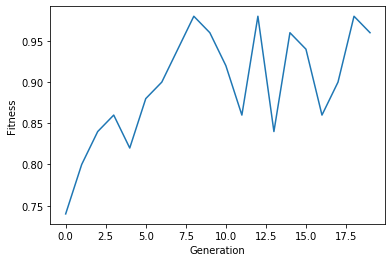

In [1105]:
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

In [1165]:
np.arange(0,21,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

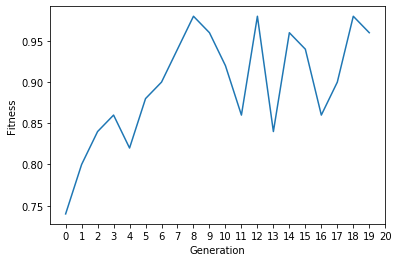

In [1166]:
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.xticks(np.arange(0,21,1))
plt.show()

In [1107]:
Main

,SDx,SDy,SDz,RMSx,RMSy,RMSz,Mx,My,Mz,CRx,...,CFx,CFy,CFz,IFx,IFy,IFz,SFx,SFy,SFz,label
0,15.195191,17.721714,6.869746,4.792824,5.647141,3.920623,-1.061472,2.825492,10.343662,4.182251,...,159.070191,123.365356,208.217299,-18.883962,7.094266,1.937882,-4.515263,1.998640,0.379036,0.0
1,16.680174,16.530059,6.259405,5.315077,5.212721,3.797515,2.656033,-1.101875,10.267563,3.771308,...,138.293314,145.761416,207.581253,7.546891,-18.191527,1.952245,2.001134,-4.730772,0.369856,0.0
2,15.117809,16.841270,5.992268,4.792834,5.318300,3.839022,-1.857380,-1.432163,10.575099,4.182243,...,166.570234,138.547509,201.356560,-10.791975,-13.996165,1.895471,-2.580428,-3.713474,0.363025,0.0
3,16.872777,18.406134,8.140884,5.314409,5.801110,4.188913,0.765311,-1.063433,10.481348,3.771782,...,140.322896,118.354571,205.983612,26.191697,-18.849133,1.912425,6.944117,-5.455078,0.399654,0.0
4,15.087175,17.194221,5.756178,4.758257,5.414534,3.847888,1.031267,-0.697841,10.735928,4.212633,...,174.413012,133.235362,189.904997,19.437048,-28.724002,1.867076,4.613990,-7.758978,0.358412,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.576323,7.124308,3.999878,3.327944,2.249341,3.797067,0.109834,0.589184,11.328642,5.304167,...,207.340534,212.675004,176.779503,160.714286,20.772304,1.710526,30.299626,3.817725,0.335174,1.0
96,11.178069,7.169225,4.139803,3.520635,2.255795,3.804309,0.498962,-0.047856,11.303145,5.593239,...,222.807882,218.880336,184.047589,39.465409,-262.295082,1.773382,7.055913,-47.136692,0.336571,1.0
97,10.911683,7.654013,4.169698,3.433944,2.412212,3.873876,0.213393,-0.435415,11.526344,5.391746,...,214.851646,246.877836,169.298438,86.764706,-32.972973,1.633542,16.092135,-5.540026,0.336089,1.0
98,10.119309,8.515335,4.227842,3.189856,2.696609,3.921623,0.612719,-0.964974,11.665991,6.050268,...,233.839551,227.937925,168.160316,31.498079,-16.504065,1.620713,5.206063,-2.794488,0.336159,1.0


In [1116]:
XZ = X[:,best_solution_indices]

In [1121]:
XZ_train, XZ_test, yz_train, yz_test = train_test_split(XZ, y, test_size=0.20, random_state=101)

## Final Model

In [1122]:
modelZ = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# input layer
modelZ.add(Dense(best_solution_num_elements,input_dim = best_solution_num_elements,  activation='tanh'))
#model.add(Dropout(0.2))

# hidden layer
modelZ.add(Dense(13, activation='relu'))
modelZ.add(Dropout(0.2))

# hidden layer
modelZ.add(Dense(13, activation='relu'))
modelZ.add(Dropout(0.2))

# output layer
modelZ.add(Dense(units=1,activation='tanh'))

# Compile model
modelZ.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [1123]:
modelZ.fit(XZ_train, yz_train, validation_data=(XZ_test, yz_test), epochs=200, verbose=2,batch_size = 50)

Train on 160 samples, validate on 40 samples
Epoch 1/200
160/160 - 3s - loss: 2.3287 - accuracy: 0.6687 - val_loss: 0.9972 - val_accuracy: 0.8000
Epoch 2/200
160/160 - 0s - loss: 2.2514 - accuracy: 0.6812 - val_loss: 0.9623 - val_accuracy: 0.9000
Epoch 3/200
160/160 - 0s - loss: 2.5445 - accuracy: 0.7125 - val_loss: 0.9505 - val_accuracy: 0.9000
Epoch 4/200
160/160 - 0s - loss: 1.7982 - accuracy: 0.7437 - val_loss: 0.9427 - val_accuracy: 0.9000
Epoch 5/200
160/160 - 0s - loss: 2.1781 - accuracy: 0.7312 - val_loss: 0.9286 - val_accuracy: 0.9000
Epoch 6/200
160/160 - 0s - loss: 1.9476 - accuracy: 0.7250 - val_loss: 0.9176 - val_accuracy: 0.9000
Epoch 7/200
160/160 - 0s - loss: 1.7539 - accuracy: 0.7625 - val_loss: 0.9139 - val_accuracy: 0.9000
Epoch 8/200
160/160 - 0s - loss: 1.7139 - accuracy: 0.7812 - val_loss: 0.9118 - val_accuracy: 0.9000
Epoch 9/200
160/160 - 0s - loss: 1.1473 - accuracy: 0.7688 - val_loss: 0.9097 - val_accuracy: 0.9000
Epoch 10/200
160/160 - 0s - loss: 1.4780 - acc

Epoch 81/200
160/160 - 0s - loss: 0.1504 - accuracy: 0.9375 - val_loss: 0.0454 - val_accuracy: 0.9750
Epoch 82/200
160/160 - 0s - loss: 0.1347 - accuracy: 0.9312 - val_loss: 0.0444 - val_accuracy: 0.9750
Epoch 83/200
160/160 - 0s - loss: 0.1668 - accuracy: 0.9062 - val_loss: 0.0434 - val_accuracy: 0.9750
Epoch 84/200
160/160 - 0s - loss: 0.1965 - accuracy: 0.9062 - val_loss: 0.0422 - val_accuracy: 0.9750
Epoch 85/200
160/160 - 0s - loss: 0.1847 - accuracy: 0.9250 - val_loss: 0.0450 - val_accuracy: 0.9750
Epoch 86/200
160/160 - 0s - loss: 0.3517 - accuracy: 0.8938 - val_loss: 0.0410 - val_accuracy: 0.9750
Epoch 87/200
160/160 - 0s - loss: 0.1812 - accuracy: 0.9187 - val_loss: 0.0404 - val_accuracy: 0.9750
Epoch 88/200
160/160 - 0s - loss: 0.2233 - accuracy: 0.9563 - val_loss: 0.0398 - val_accuracy: 0.9750
Epoch 89/200
160/160 - 0s - loss: 0.1402 - accuracy: 0.9250 - val_loss: 0.0439 - val_accuracy: 0.9750
Epoch 90/200
160/160 - 0s - loss: 0.1384 - accuracy: 0.9625 - val_loss: 0.0459 - v

Epoch 161/200
160/160 - 0s - loss: 0.0761 - accuracy: 0.9750 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 162/200
160/160 - 0s - loss: 0.0859 - accuracy: 0.9688 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 163/200
160/160 - 0s - loss: 0.0786 - accuracy: 0.9688 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 164/200
160/160 - 0s - loss: 0.0961 - accuracy: 0.9688 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 165/200
160/160 - 0s - loss: 0.0631 - accuracy: 0.9812 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 166/200
160/160 - 0s - loss: 0.0888 - accuracy: 0.9625 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 167/200
160/160 - 0s - loss: 0.0872 - accuracy: 0.9688 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 168/200
160/160 - 0s - loss: 0.0861 - accuracy: 0.9688 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 169/200
160/160 - 0s - loss: 0.0714 - accuracy: 0.9688 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 170/200
160/160 - 0s - loss: 0.0719 - accuracy: 0.9750 - val_loss: 

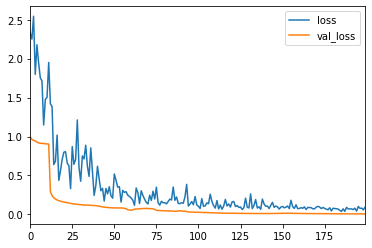

In [1126]:
losses = pd.DataFrame(modelZ.history.history)

losses[['loss','val_loss']].plot()

Text(0, 0.5, 'Loss')

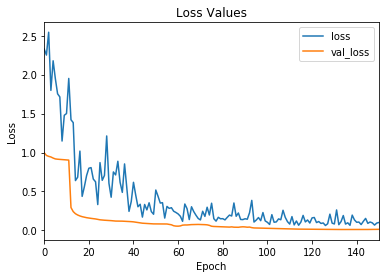

In [1170]:
losses[['loss','val_loss']].plot(title = 'Loss Values')
plt.xlabel('Epoch')
plt.xlim(0,150)
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

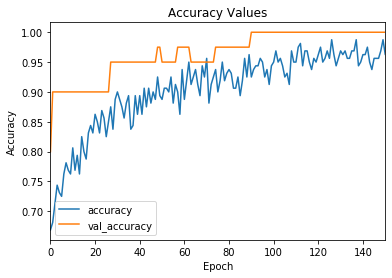

In [1171]:
losses[['accuracy','val_accuracy']].plot(title = 'Accuracy Values')
plt.xlabel('Epoch')
plt.xlim(0,150)
plt.ylabel('Accuracy')

In [1167]:
modelZ.evaluate(XZ_train, yz_train, verbose=0)

[0.008716835267841816, 1.0]

In [1125]:
modelZ.evaluate(XZ_test, yz_test, verbose=0)

[0.005905101448297501, 1.0]

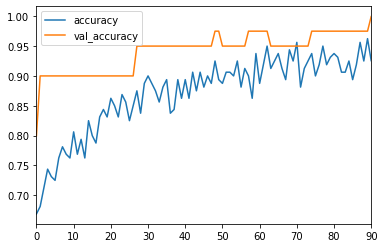

In [1132]:
losses[['accuracy','val_accuracy']].plot(xlim = (0,90))

In [1128]:
predictionsZ = modelZ.predict_classes(XZ_test)
print(classification_report(yz_test,predictionsZ))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



We did it! We got a 100% accuracy